# Loan Approvoal Analysis
<strong> By Muhammad Azeem, Jeneeshan Uthayakumar, Dhyan Thakkar, Alejandro Gonzalez Garcia, Justin Shaw </strong>

## INTRODUCTION 
<p><strong> Business Context:</strong> a consumer finance company specializing in urban customer loans seeks to optimize its decision-making process for loan approvals. The company is confronted with the challenge of assessing the creditworthiness of applicants who may have insufficient or non-existent credit histories, increasing the risk of default. The business context involves utilizing exploratory data analysis (EDA) to identify patterns in application and historical loan data that can predict payment difficulties. This analysis will inform strategies such as adjusting loan amounts, altering interest rates, or denying loans outright to mitigate risk. The company aims to balance the maximization of business opportunities—by not erroneously denying loans to capable repayees—with the minimization of financial losses from defaults. The EDA will focus on discovering the key variables that serve as strong indicators of default, thus enabling the company to refine its loan approval criteria and enhance its overall risk assessment capabilities.
</p>
<p> <strong> Business Problem:</strong> How can lending institutions navigate the complex landscape of loan approvals, particularly when faced with applicants who lack a substantial credit history, to mitigate financial risks and maximize business opportunities?
Lending institutions often grapple with deciding loan approvals, especially when confronted with applicants who have an insufficient or non-existent credit history. The dilemma is twofold: denying capable applicants results in a business opportunity loss while approving potentially risky clients could lead to significant financial losses due to defaults. Identifying patterns and attributes that can predict the likelihood of a default is thus crucial. The applicants in this data set are those with little to no credit history. Given this fact, we will have to examine various other variables relating to the applicant to determine whether they are approved or not. 
</p>
<p><strong>Analytical Context:</strong> the focus is on extracting meaningful insights from the provided dataset, which comprises three key files. The <code>'application_data.csv'</code> file is central to our current analysis, containing comprehensive details about clients at the point of loan application and highlighting those with payment difficulties. The <code>'previous_application.csv'</code> file offers a historical perspective, allowing for an assessment of patterns over time by indicating the outcomes of clients' past loan applications. This historical data is crucial for understanding the longitudinal aspects of client behavior and creditworthiness. The third file, 'columns_description.csv', is the data dictionary that will be indispensable for accurate data interpretation, ensuring clarity on what each variable represents and how it can be analyzed. Together, these files provide a robust foundation for a detailed exploratory data analysis, enabling the identification of default indicators and the development of predictive models to inform the loan approval process. This comprehensive data understanding is the backbone of the analytical work to be undertaken, aiming to bolster the company's risk assessment strategy.
</p>

<h2>Loading the data </h2>



The dataset comprises three key files: <code>’application_data.csv’</code>, <code> ’previous_application.csv’,</code>
and <code>’columns_description.csv’</code>. The first file, ’application_data.csv’, which is the
primary focus of our current analysis, contains detailed information about the clients at
the time of their loan application, particularly highlighting instances of payment difficul-
ties. The ’previous_application.csv’ file delves into the clients’ history of loan appli-
cations, indicating the outcomes of these applications, while the ’columns_description.csv’
provides a data dictionary explaining the variables used

We will begin by upload some important python packages

In [1]:
import numpy as np
import pandas as pd
# import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import pearsonr
import statsmodels.api as sm
# from pandas.core.common import SettingWithCopyWarning
# from pandas_profiling import ProfileReport
from pathlib import Path
from scipy.stats import probplot, chi2_contingency, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
from sklearn.utils import shuffle, resample
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
# from imblearn.over_sampling import SMOTE
# from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
# import scikitplot as skplt
# from yellowbrick.model_selection import FeatureImportances
import scipy.stats as stats
import joblib
import os
%matplotlib inline

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Examine the <code> 'application_data.csv'</code> dataset
<p> Our <code>'application_data.csv'</code> dataset contains 307,511 rows with 122 variables (columns) </p>

In [2]:
application_df = pd.read_csv('application_data.csv')
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

Examine the <code> 'previous_application.csv'</code> dataset
<p><code>'previous_application.csv'</code> dataset contains 1670214 rows with 37 variables
columns</p>

In [3]:
previous_application = pd.read_csv('previous_application.csv')
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

Lets start cleaning the data
<p> Setting a threshold for missing values is a critical first step. The threshold represents a maximum allowable percentage of missing data within any given column; beyond this point, the column may be considered too incomplete to provide reliable insights. For this analysis, we've set the threshold at 40%. </p>

In [4]:
null_df = application_df.isnull().mean()*100
null_df.sort_values(ascending=False).head(20)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
dtype: float64

In [5]:
#--identify and drop columns with lots of null values
null_threshold = 40 #percentage

cols = (application_df.isnull().mean()*100 > null_threshold)[application_df.isnull().mean()*100>null_threshold].index.tolist()

#columns to drop
cols

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [6]:
application_df.drop(columns=cols, inplace=True)

In [7]:
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 73 columns]

We now only have 72 columns to work with. The flag columns simply refer to whether or not a client provided certain information. The documents are meaningless to us as we do not know what each document means, and we choose to ignore whether the client provided any additional information such as their home phone, work phone, etc. since this seems insignificant.

In [8]:
#delete flag columns
flag_col = []

for i in application_df.columns:
    if 'FLAG' in i:
        flag_col.append(i)
flag_col

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

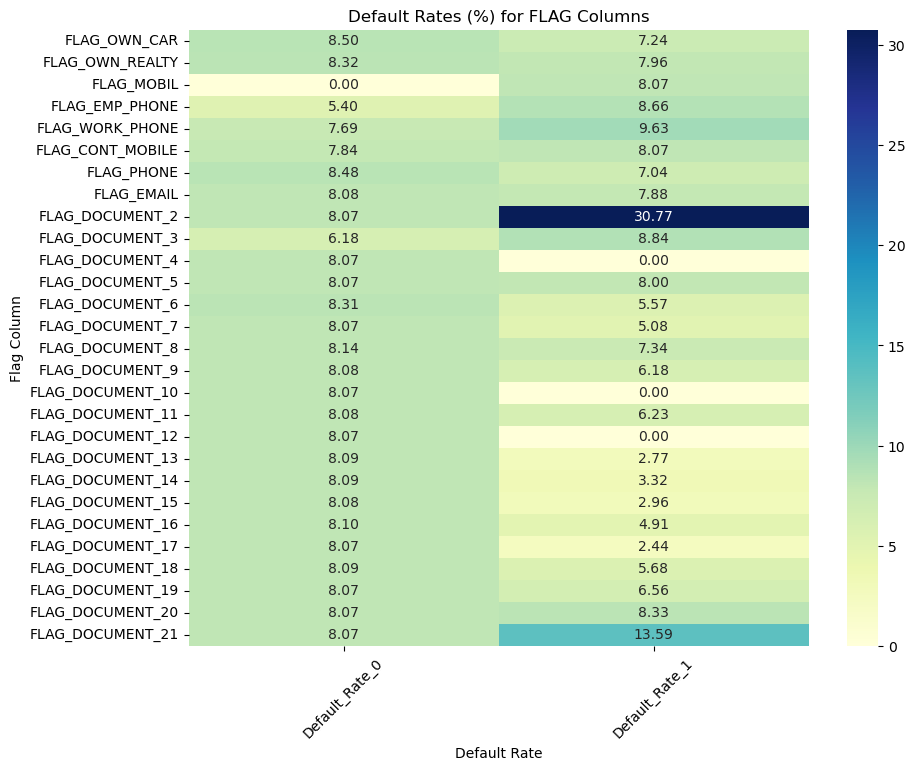

Default_Rate_0  Default_Rate_1
Column                                          
FLAG_OWN_CAR            8.500227        7.243730
FLAG_OWN_REALTY         8.324929        7.961577
FLAG_MOBIL              0.000000        8.072908
FLAG_EMP_PHONE          5.400282        8.659990
FLAG_WORK_PHONE         7.685122        9.630065
FLAG_CONT_MOBILE        7.839721        8.073318
FLAG_PHONE              8.478379        7.035670
FLAG_EMAIL              8.084628        7.877537
FLAG_DOCUMENT_2         8.071922       30.769231
FLAG_DOCUMENT_3         6.182503        8.844921
FLAG_DOCUMENT_4         8.073538        0.000000
FLAG_DOCUMENT_5         8.073948        8.003442
FLAG_DOCUMENT_6         8.314999        5.565404
FLAG_DOCUMENT_7         8.073455        5.084746
FLAG_DOCUMENT_8         8.138074        7.336957
FLAG_DOCUMENT_9         8.080297        6.176962
FLAG_DOCUMENT_10        8.073066        0.000000
FLAG_DOCUMENT_11        8.080102        6.234414
FLAG_DOCUMENT_12        8.072934        0.000000
FLAG_DOCUMENT_13        8.091650        2.767528
FLAG_DOCUMENT_14        8.086873        3.322259
FLAG_DOCUMENT_15        8.079078        2.956989
FLAG_DOCUMENT_16        8.104566        4.913200
FLAG_DOCUMENT_17        8.074385        2.439024
FLAG_DOCUMENT_18        8.092495        5.680000
FLAG_DOCUMENT_19        8.073784        6.557377
FLAG_DOCUMENT_20        8.072750        8.333333
FLAG_DOCUMENT_21        8.071033       13.592233

In [9]:
analysis_results = []
for col in flag_col:
    default_rate = application_df.groupby(col)['TARGET'].mean() * 100
    analysis_results.append({
        'Column': col,
        'Default_Rate_0': default_rate.get(0, None),
        'Default_Rate_1': default_rate.get(1, None)
    })

# Convert analysis results to a DataFrame
analysis_df = pd.DataFrame(analysis_results)
analysis_df.set_index('Column', inplace=True)

# Plotting the results
plt.figure(figsize=(10, 8))
sns.heatmap(analysis_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Default Rates (%) for FLAG Columns')
plt.ylabel('Flag Column')
plt.xlabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

# Display the DataFrame
analysis_df

The heatmap displaying default rates for the "FLAG" columns indicates that most flags show minimal variation in default rates between their categories, suggesting low predictive power for the target outcome of payment difficulties. Certain flags with higher default rates could be outliers and require further investigation into their statistical significance due to potential data imbalance. Overall, the similarity in default rates across most flags implies redundancy and a lack of added value to predictive modeling, which may justify their exclusion to streamline the analysis and improve model interpretability and performance.
<p> Based on this analysis we can drop the "FLAG" columns </p>

In [10]:
application_df.drop(columns=flag_col,inplace=True)
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

   ... DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  \
0  ...                      2.0                      2.0   
1  ...                      0.0                      1.0   
2  ...                      0.0                      0.0   
3  ...                      0.0                      2.0   
4  ...                      0.0                      0.0   

  DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      2.0                -1134.0                         0.0   
1                      0.0                 -828.0                         0.0   
2                      0.0                 -815.0                         0.0   
3                      0.0                 -617.0                         NaN   
4                      0.0                -1106.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        1.0  
1                        0.0  
2                        0.0  
3                        NaN  
4                        0.0  

[5 rows x 45 columns]

In [11]:
(application_df.isnull().mean()*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
REG_REGION_NOT_LIVE_REGION      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_W

Since the AMT_REQ columns all have to do with number of enquries to the credit bureau (and since they all have the same percentage of null values), we analyze them all in one go

In [12]:
amt_req_cols = []

for i in application_df.columns:
    if "AMT_REQ" in i:
        amt_req_cols.append(i)

amt_req_cols

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

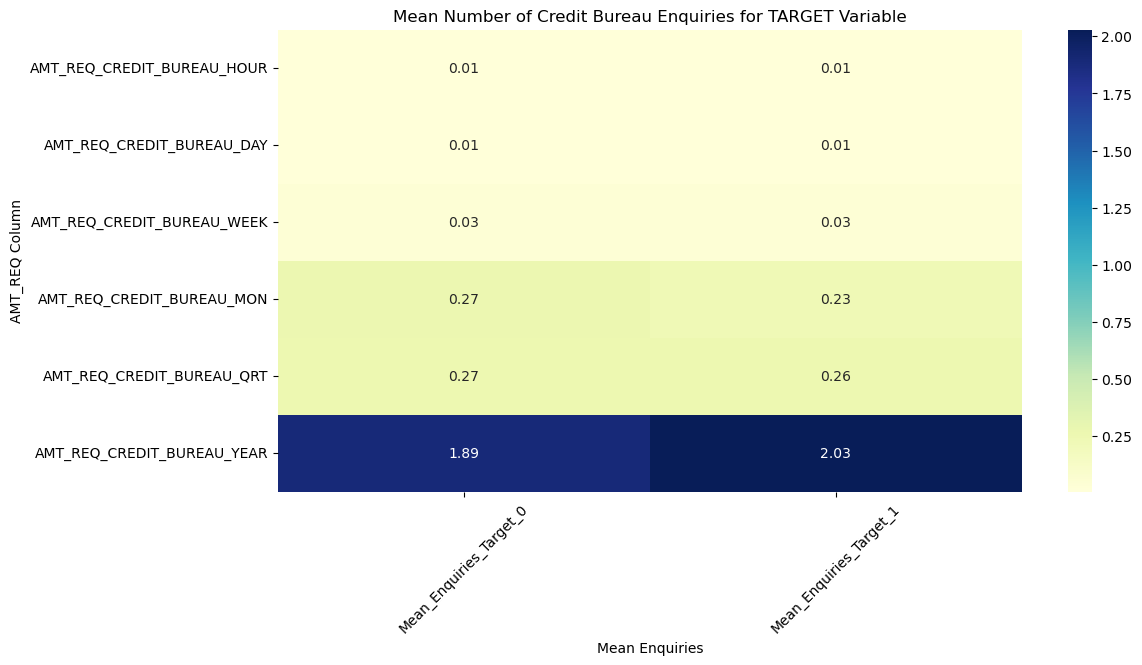

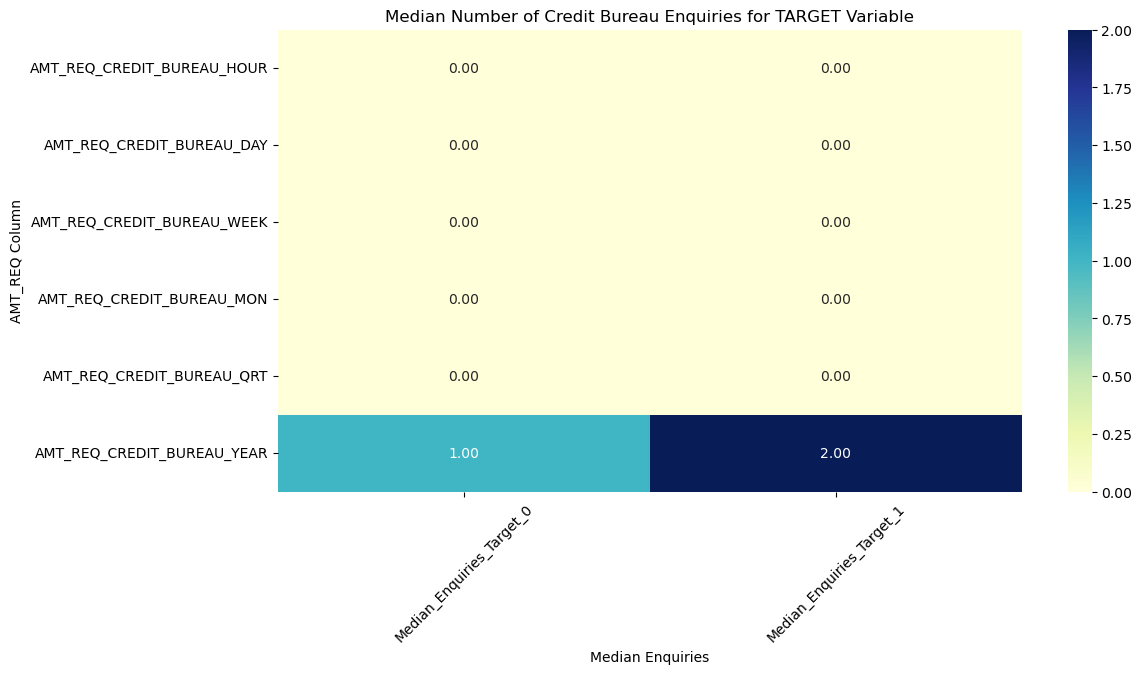

Mean_Enquiries_Target_0  Mean_Enquiries_Target_1  \
Column                                                                         
AMT_REQ_CREDIT_BUREAU_HOUR                 0.006380                 0.006672   
AMT_REQ_CREDIT_BUREAU_DAY                  0.006914                 0.008036   
AMT_REQ_CREDIT_BUREAU_WEEK                 0.034315                 0.034919   
AMT_REQ_CREDIT_BUREAU_MON                  0.270697                 0.227926   
AMT_REQ_CREDIT_BUREAU_QRT                  0.265939                 0.259923   
AMT_REQ_CREDIT_BUREAU_YEAR                 1.889199                 2.028783   

                            Median_Enquiries_Target_0  \
Column                                                  
AMT_REQ_CREDIT_BUREAU_HOUR                        0.0   
AMT_REQ_CREDIT_BUREAU_DAY                         0.0   
AMT_REQ_CREDIT_BUREAU_WEEK                        0.0   
AMT_REQ_CREDIT_BUREAU_MON                         0.0   
AMT_REQ_CREDIT_BUREAU_QRT                         0.0   
AMT_REQ_CREDIT_BUREAU_YEAR                        1.0   

                            Median_Enquiries_Target_1  
Column                                                 
AMT_REQ_CREDIT_BUREAU_HOUR                        0.0  
AMT_REQ_CREDIT_BUREAU_DAY                         0.0  
AMT_REQ_CREDIT_BUREAU_WEEK                        0.0  
AMT_REQ_CREDIT_BUREAU_MON                         0.0  
AMT_REQ_CREDIT_BUREAU_QRT                         0.0  
AMT_REQ_CREDIT_BUREAU_YEAR                        2.0

In [13]:
# Analyzing the AMT_REQ columns in relation to the TARGET variable
# We'll calculate the average number of enquiries for each column by the target value

amt_req_analysis_results = []
for col in amt_req_cols:
    # Ignoring NaN values for this calculation, we can consider mean or median to compare.
    mean_enquiries_by_target = application_df.groupby('TARGET')[col].mean()
    median_enquiries_by_target = application_df.groupby('TARGET')[col].median()
    
    amt_req_analysis_results.append({
        'Column': col,
        'Mean_Enquiries_Target_0': mean_enquiries_by_target[0],
        'Mean_Enquiries_Target_1': mean_enquiries_by_target[1],
        'Median_Enquiries_Target_0': median_enquiries_by_target[0],
        'Median_Enquiries_Target_1': median_enquiries_by_target[1]
    })

# Convert analysis results to a DataFrame
amt_req_analysis_df = pd.DataFrame(amt_req_analysis_results)
amt_req_analysis_df.set_index('Column', inplace=True)

# Plotting the results for mean enquiries
plt.figure(figsize=(12, 6))
sns.heatmap(amt_req_analysis_df.drop(columns=['Median_Enquiries_Target_0', 'Median_Enquiries_Target_1']), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Mean Number of Credit Bureau Enquiries for TARGET Variable')
plt.ylabel('AMT_REQ Column')
plt.xlabel('Mean Enquiries')
plt.xticks(rotation=45)
plt.show()

# Plotting the results for median enquiries
plt.figure(figsize=(12, 6))
sns.heatmap(amt_req_analysis_df.drop(columns=['Mean_Enquiries_Target_0', 'Mean_Enquiries_Target_1']), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Median Number of Credit Bureau Enquiries for TARGET Variable')
plt.ylabel('AMT_REQ Column')
plt.xlabel('Median Enquiries')
plt.xticks(rotation=45)
plt.show()

# Display the DataFrame
amt_req_analysis_df


Based on the analysis only the <code> AMT_REQ_CREDIT_BUREAU_YEAR </code> have some significance thus we drop rest of the <code> AMT_REQ </code> columns

In [14]:
# Dropping all 'AMT_REQ' columns except the yearly ones from the dataframe

columns_to_drop = [col for col in amt_req_cols if col != 'AMT_REQ_CREDIT_BUREAU_YEAR']
application_df.drop(columns=columns_to_drop, inplace=True)

application_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0           100002       1         Cash loans           M             0   
1           100003       0         Cash loans           F             0   
2           100004       0    Revolving loans           M             0   
3           100006       0         Cash loans           F             0   
4           100007       0         Cash loans           M             0   
...            ...     ...                ...         ...           ...   
307506      456251       0         Cash loans           M             0   
307507      456252       0         Cash loans           F             0   
307508      456253       0         Cash loans           F             0   
307509      456254       1         Cash loans           F             0   
307510      456255       0         Cash loans           F             0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               202500.0    406597.5      24700.5         351000.0   
1               270000.0   1293502.5      35698.5        1129500.0   
2                67500.0    135000.0       6750.0         135000.0   
3               135000.0    312682.5      29686.5         297000.0   
4               121500.0    513000.0      21865.5         513000.0   
...                  ...         ...          ...              ...   
307506          157500.0    254700.0      27558.0         225000.0   
307507           72000.0    269550.0      12001.5         225000.0   
307508          153000.0    677664.0      29979.0         585000.0   
307509          171000.0    370107.0      20205.0         319500.0   
307510          157500.0    675000.0      49117.5         675000.0   

       NAME_TYPE_SUITE  ... LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0        Unaccompanied  ...                       0  Business Entity Type 3   
1               Family  ...                       0                  School   
2        Unaccompanied  ...                       0              Government   
3        Unaccompanied  ...                       0  Business Entity Type 3   
4        Unaccompanied  ...                       1                Religion   
...                ...  ...                     ...                     ...   
307506   Unaccompanied  ...                       0                Services   
307507   Unaccompanied  ...                       0                     XNA   
307508   Unaccompanied  ...                       1                  School   
307509   Unaccompanied  ...                       0  Business Entity Type 1   
307510   Unaccompanied  ...                       1  Business Entity Type 3   

       EXT_SOURCE_2 EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0          0.262949     0.139376                       2.0   
1          0.622246          NaN                       1.0   
2          0.555912     0.729567                       0.0   
3          0.650442          NaN                       2.0   
4          0.322738          NaN                       0.0   
...             ...          ...                       ...   
307506     0.681632          NaN                       0.0   
307507     0.115992          NaN                       0.0   
307508     0.535722     0.218859                       6.0   
307509     0.514163     0.661024                       0.0   
307510     0.708569     0.113922                       0.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                            2.0                       2.0   
1                            0.0                       1.0   
2                            0.0                       0.0   
3                            0.0                       2.0   
4                            0.0                       0.0   
...                          ...                       ...   
307506                       0.0                       0.0   
307507                       0.0                       0.0   
307508        

In [15]:
(application_df.isnull().mean()*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
NAME_INCOME_TYPE                0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIV

The columns <code> EXT_SOURCE_3 </code> and <code>EXT_SOURCE_2 </code> doesn't give us any crucial information either even the discreption is just "Normalized score from external data source" therefore we drop this column as well.

In [16]:
EXT_cols = ['EXT_SOURCE_3','EXT_SOURCE_2']
application_df.drop(columns=EXT_cols, inplace=True )

In [17]:
(application_df.isnull().mean()*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
REGION_RATING_CLIENT_W_CITY     0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
NAME_CONTRACT_TYPE              0.000000
REGION_RATING_CLIENT            0.000000
CODE_GENDER                     0.000000
TARGET          

Next we analyze the highest percentage of null values, which is found in <code> OCCUPATION_TYPE</code>

In [18]:
# Checking unique values in 'NAME_INCOME_TYPE' to understand the categories, especially for pensioners
income_types = application_df['NAME_INCOME_TYPE'].unique()

# Identifying rows where 'NAME_INCOME_TYPE' is 'Pensioner'
pensioners_index = application_df[application_df['NAME_INCOME_TYPE'] == 'Pensioner'].index

# For 'OCCUPATION_TYPE', setting 'Retired' for all pensioners with NaN values
application_df.loc[pensioners_index, 'OCCUPATION_TYPE'] = application_df.loc[pensioners_index, 'OCCUPATION_TYPE'].fillna('Retired')

# Check the operation was successful
application_df.loc[pensioners_index, ['NAME_INCOME_TYPE', 'OCCUPATION_TYPE']].head()


NAME_INCOME_TYPE OCCUPATION_TYPE
8         Pensioner         Retired
11        Pensioner         Retired
23        Pensioner         Retired
38        Pensioner         Retired
43        Pensioner         Retired

In [19]:
application_df.OCCUPATION_TYPE.value_counts()

Retired                  55357
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

With occupation type, we run into the issue that the null values far exceed even the most common occupation. It would be unwise for us to fill in null values with Laborers in this case. Thus, we must create a category for "unknown" occupation in this case, and fill in null values with this category.

In [20]:
application_df.OCCUPATION_TYPE.fillna('Unknown',inplace=True)

In [21]:
application_df.OCCUPATION_TYPE.value_counts()

Retired                  55357
Laborers                 55186
Unknown                  41034
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [22]:
(application_df.isnull().mean()*100).sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
REGION_RATING_CLIENT            0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
ORGANIZATION_TYPE               0.000000
SK_ID_CURR                      0.000000
TARGET                          0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_REGISTRATIO

* <code> OBS_30_CNT_SOCIAL_CIRCLE</code> : How many observations of the client's social surroundings with observable 30 DPD (Days Past Due) default.
* <code> DEF_30_CNT_SOCIAL_CIRCLE</code>: How many observations of the client's social surroundings with default 30 DPD.
* <code> OBS_60_CNT_SOCIAL_CIRCLE</code>: How many observations of the client's social surroundings with observable 60 DPD default.
* <code> DEF_60_CNT_SOCIAL_CIRCLE</code>: How many observations of the client's social surroundings with default 60 DPD.

<p> These variables seem to track the number of a client's social contacts that have had payment difficulties (defaults) either within 30 days or 60 days. "OBS" likely refers to observed defaults, and "DEF" to actual defaults within these time frames. </p>
<p> The interpretation of these social circle variables can be complex as we don't know much about the client may not provide straightforward insights for loan decision-making processes. </p>


We shall drop these coloumns as well

In [23]:
social_circle_cols = ['OBS_30_CNT_SOCIAL_CIRCLE',
                      'DEF_30_CNT_SOCIAL_CIRCLE',
                      'OBS_60_CNT_SOCIAL_CIRCLE',
                      'DEF_60_CNT_SOCIAL_CIRCLE']

application_df.drop(columns=social_circle_cols,inplace=True )

In [24]:
(application_df.isnull().mean()*100).sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
NAME_TYPE_SUITE                 0.420148
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
OCCUPATION_TYPE                 0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REGION_RATING_CLIENT            0.000000
SK_ID_CURR                      0.000000
DAYS_ID_PUBLISH                 0.000000
TARGET                          0.000000
DAYS_EMPLOYED                   0.000000
DAYS_BIRTH                      0.000000
REGION_POPULATION_RELATIVE      0.000000
NAME_HOUSING_TYP

In [25]:
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

   ... HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION  \
0  ...                      10                          0   
1  ...                      11                          0   
2  ...                       9                          0   
3  ...                      17                          0   
4  ...                      11                          0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  DAYS_LAST_PHONE_CHANGE AMT_REQ_CREDIT_BUREAU_YEAR  
0  Business Entity Type 3                 -1134.0                        1.0  
1                  School                  -828.0                        0.0  
2              Government                  -815.0                        0.0  
3  Business Entity Type 3                  -617.0                        NaN  
4                Religion                 -1106.0                        0.0  

[5 rows x 34 columns]

We start by analyzing the columns that include "DAYS". 

In [26]:
# Identifying columns with the word 'DAY' in their name
day_columns = [col for col in application_df.columns if 'DAYS' in col]

# Displaying the columns with 'DAY' in their names
day_columns


['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [27]:
application_df[day_columns]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            -9461           -637            -3648.0            -2120   
1           -16765          -1188            -1186.0             -291   
2           -19046           -225            -4260.0            -2531   
3           -19005          -3039            -9833.0            -2437   
4           -19932          -3038            -4311.0            -3458   
...            ...            ...                ...              ...   
307506       -9327           -236            -8456.0            -1982   
307507      -20775         365243            -4388.0            -4090   
307508      -14966          -7921            -6737.0            -5150   
307509      -11961          -4786            -2562.0             -931   
307510      -16856          -1262            -5128.0             -410   

        DAYS_LAST_PHONE_CHANGE  
0                      -1134.0  
1                       -828.0  
2                       -815.0  
3                       -617.0  
4                      -1106.0  
...                        ...  
307506                  -273.0  
307507                     0.0  
307508                 -1909.0  
307509                  -322.0  
307510                  -787.0  

[307511 rows x 5 columns]

Converting negative values to positive in the identified 'DAY' columns

In [28]:
for col in day_columns:
    # Check if the column is numeric and contains negative values
    if application_df[col].dtype in ['int64', 'float64'] and (application_df[col] < 0).any():
        application_df[col] = application_df[col].abs()

# Displaying the first few rows of the updated columns to verify the changes
application_df[day_columns].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637             3648.0             2120   
1       16765           1188             1186.0              291   
2       19046            225             4260.0             2531   
3       19005           3039             9833.0             2437   
4       19932           3038             4311.0             3458   

   DAYS_LAST_PHONE_CHANGE  
0                  1134.0  
1                   828.0  
2                   815.0  
3                   617.0  
4                  1106.0

In [29]:
amt_cols = []

for i in (application_df.isnull().mean()*100 > 0)[application_df.isnull().mean()*100 > 0].index.tolist():
    if "AMT" in i:
        amt_cols.append(i)
amt_cols

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_YEAR']

Average for AMT_ANNUITY is 27108.573909183444
Median is: 24903.0


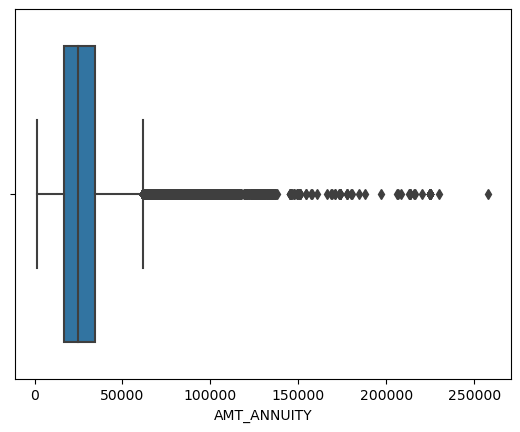


Average for AMT_GOODS_PRICE is 538396.2074288895
Median is: 450000.0


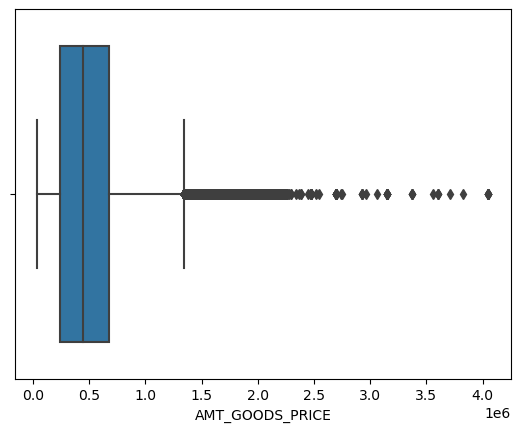


Average for AMT_REQ_CREDIT_BUREAU_YEAR is 1.899974435321363
Median is: 1.0


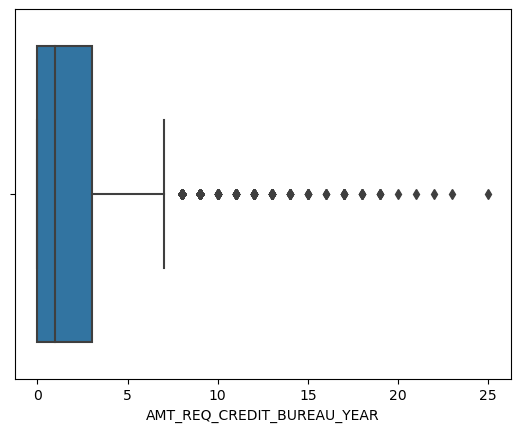

In [30]:
for i in amt_cols:
    print("Average for {} is {}".format(i,application_df[i].mean()))
    print("Median is: {}".format(application_df[i].median()))
    sns.boxplot(application_df[i])
    plt.show()
    print("")

In [31]:
(application_df.isnull().mean()*100)[amt_cols]

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

These two measures have a small percentage of outliers towards very high values. Thus, we take the median (middle value) of each data set to replace null values as the mean is slightly skewed by the significant outliers. 

In [32]:
#imputate AMT_ANNUITY and AMT_GOODS_PRICE
for i in (application_df.isnull().mean()*100 > 0)[application_df.isnull().mean()*100 > 0].index.tolist():
    if "AMT" in i:
        application_df[i].fillna(application_df[i].median(),inplace=True)
        print("null count in {} is {}".format(i,application_df[i].isnull().sum()))


null count in AMT_ANNUITY is 0
null count in AMT_GOODS_PRICE is 0
null count in AMT_REQ_CREDIT_BUREAU_YEAR is 0


Check remaining columns with null values as well as percentages

In [33]:
(application_df.isnull().mean()*100)[application_df.isnull().mean()*100>0].sort_values(ascending=False)

NAME_TYPE_SUITE           0.420148
CNT_FAM_MEMBERS           0.000650
DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64

Next we analyze NAME_TYPE_SUITE

In [34]:
application_df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In this case, because the percentage of null values is low and because the vast majority of applicants fall under Unaccompanied, we go ahead and impute Unaccompanied in for the null values.

In [35]:
application_df.NAME_TYPE_SUITE.fillna("Unaccompanied",inplace=True)

In [36]:
print("Null value count: {}".format(application_df.NAME_TYPE_SUITE.isnull().sum()))
application_df.NAME_TYPE_SUITE.value_counts()

Null value count: 0


Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Check remaining columns

In [37]:
(application_df.isnull().mean()*100)[application_df.isnull().mean()*100>0].sort_values(ascending=False)

CNT_FAM_MEMBERS           0.000650
DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64

We next analyze <code>CNT_FAM_MEMBERS</code>

In [38]:
application_df.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

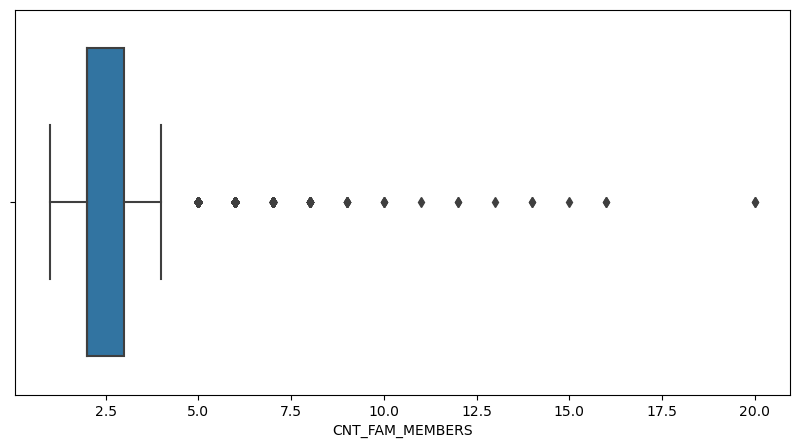

Mean is 2.152665450442101
Median is 2.152665450442101
Mode is 2.0


0.25     2.0
0.50     2.0
0.75     3.0
1.00    20.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(application_df.CNT_FAM_MEMBERS)
plt.show()

print("Mean is {}".format(application_df.CNT_FAM_MEMBERS.mean()))
print("Median is {}".format(application_df.CNT_FAM_MEMBERS.mean()))
print("Mode is {}".format(application_df.CNT_FAM_MEMBERS.mode()[0]))

application_df.CNT_FAM_MEMBERS.quantile(q=[0.25,0.5,0.75,1])

Clearly it is a good choice to replace null values with 2 family members.

In [40]:
application_df.CNT_FAM_MEMBERS.fillna(round(application_df.CNT_FAM_MEMBERS.mean()),inplace=True)
print("Null value count: {}".format(application_df.CNT_FAM_MEMBERS.isnull().sum()))

Null value count: 0


Lastly, we analyze <code>DAYS_LAST_PHONE_CHANGE</code>

In [41]:
application_df.DAYS_LAST_PHONE_CHANGE.value_counts()

0.0       37672
1.0        2812
2.0        2318
3.0        1763
4.0        1285
          ...  
4051.0        1
3593.0        1
3622.0        1
3570.0        1
3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [42]:
application_df.DAYS_LAST_PHONE_CHANGE.head(20)

0     1134.0
1      828.0
2      815.0
3      617.0
4     1106.0
5     2536.0
6     1562.0
7     1070.0
8        0.0
9     1673.0
10     844.0
11    2396.0
12    2370.0
13       4.0
14     188.0
15     925.0
16       3.0
17    2811.0
18     239.0
19    1850.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

We notice we have negative values, which we would like to turn positive to make analysis easier.

In [43]:
application_df.DAYS_LAST_PHONE_CHANGE = abs(application_df.DAYS_LAST_PHONE_CHANGE)

In [44]:
application_df.DAYS_LAST_PHONE_CHANGE.head()

0    1134.0
1     828.0
2     815.0
3     617.0
4    1106.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

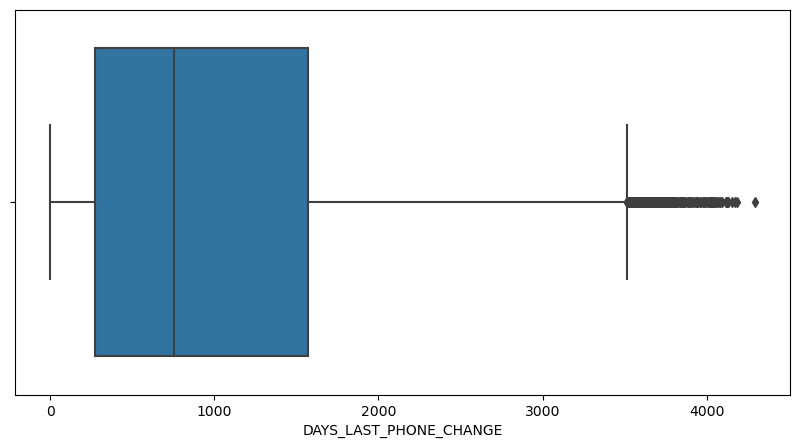

Mean is 962.8587883320868
Median is 757.0
Mode is 0.0


0.25     274.0
0.50     757.0
0.75    1570.0
1.00    4292.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(application_df.DAYS_LAST_PHONE_CHANGE)
plt.show()

print("Mean is {}".format(application_df.DAYS_LAST_PHONE_CHANGE.mean()))
print("Median is {}".format(application_df.DAYS_LAST_PHONE_CHANGE.median()))
print("Mode is {}".format(application_df.DAYS_LAST_PHONE_CHANGE.mode()[0]))

application_df.DAYS_LAST_PHONE_CHANGE.quantile(q=[0.25,0.5,0.75,1])

Since there are hardly any null values, we go ahead and impute by replacing null values with our median. We don't use the mean since there are some very high outliers yet the most common value is 0.

In [46]:
application_df.DAYS_LAST_PHONE_CHANGE.fillna(application_df.DAYS_LAST_PHONE_CHANGE.median(),inplace=True)
print("Null value count: {}".format(application_df.DAYS_LAST_PHONE_CHANGE.isnull().sum()))

Null value count: 0


In [47]:
application_df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_

We create a new column that gives the applicant's name in years.

In [48]:
application_df["AGE"] = application_df["DAYS_BIRTH"].apply(lambda x: np.round(x/365))
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

   ... REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0  ...                          0                          0   
1  ...                          0                          0   
2  ...                          0                          0   
3  ...                          0                          0   
4  ...                          0                          0   

  LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                           0                      0                       0   
1                           0                      0                       0   
2                           0                      0                       0   
3                           0                      0                       0   
4                           0                      0                       1   

   LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  DAYS_LAST_PHONE_CHANGE  \
0                        0  Business Entity Type 3                  1134.0   
1                        0                  School                   828.0   
2                        0              Government                   815.0   
3                        0  Business Entity Type 3                   617.0   
4                        1                Religion                  1106.0   

   AMT_REQ_CREDIT_BUREAU_YEAR   AGE  
0                         1.0  26.0  
1                         0.0  46.0  
2                         0.0  52.0  
3                         1.0  52.0  
4                         0.0  55.0  

[5 rows x 35 columns]

<code>DAYS_EMPLOYED</code> seems to have some large numbers that seem impossible.

In [49]:
application_df.DAYS_EMPLOYED.value_counts()

365243    55374
200         156
224         152
230         151
199         151
          ...  
13961         1
11827         1
10176         1
9459          1
8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

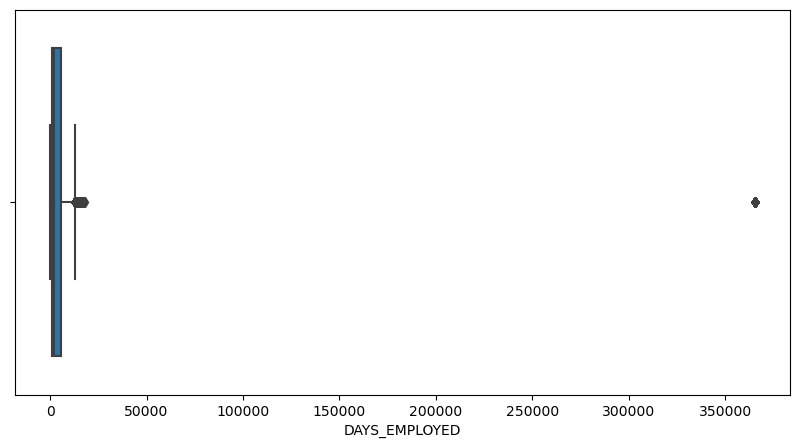

365243    18.007161
200        0.050730
224        0.049429
230        0.049104
199        0.049104
            ...    
13961      0.000325
11827      0.000325
10176      0.000325
9459       0.000325
8694       0.000325
Name: DAYS_EMPLOYED, Length: 12574, dtype: float64

In [50]:
plt.figure(figsize=(10,5))
sns.boxplot(application_df.DAYS_EMPLOYED)
plt.show()

application_df.DAYS_EMPLOYED.value_counts(normalize=True)*100

Note that DAYS_EMPLOYED is the amount of days from when the applicant began their CURRENT employment. Also note that 18% of the data corresponds to 365243 days employed, which indicates that this impossible result cannot be an outlier. This hints at the possibility that these applicants may be unemployed or pensioners (someone collecting pension).

In [51]:
application_df[application_df.DAYS_EMPLOYED == 365243].NAME_INCOME_TYPE.value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

We see that we were correct in our prediction. We now create a column for years of employmend instead of days.

In [52]:
application_df["YEARS_EMPLOYED"] = application_df["DAYS_EMPLOYED"].apply(lambda x: np.round(x/365))

We go ahead and create columns for age ranges as well as ranges in work experience.

In [53]:
application_df["AGE_RANGE"] = pd.cut(
    x=application_df["AGE"],
    bins=[0,20,30,40,50,60,70,100],
    labels=['0-20','20-30','30-40','40-50','50-60','60-70','70-100'])

In [54]:
application_df["WORK_EXPERIENCE_YEARS"] = pd.cut(
    x=application_df["YEARS_EMPLOYED"],
    bins=[0,5,10,15,20,25,30,100],
    labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-100'])

We also create a columns to represent the remaining DAYS columns in years.

In [55]:
application_df["YEARS_REGISTRATION"] = application_df["DAYS_REGISTRATION"].apply(lambda x: np.floor(x/365))
application_df["YEARS_ID_PUBLISH"] = application_df["DAYS_ID_PUBLISH"].apply(lambda x: np.floor(x/365))
application_df["YEARS_LAST_PHONE_CHANGE"] = application_df["DAYS_LAST_PHONE_CHANGE"].apply(lambda x: np.floor(x/365))

In [56]:
application_df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
L

<p> Here, from the future I will drop some more variables as they don't give us any crucial information in the data analysis. Futhermore, I will drop the columns with 'DAYS' as we have created 'YEARS' columns. </p>

In [57]:
cols_irr = ['REGION_POPULATION_RELATIVE',
            'DAYS_BIRTH',
            'DAYS_EMPLOYED',
            'DAYS_REGISTRATION',
            'DAYS_ID_PUBLISH',
            'REGION_RATING_CLIENT',
            'REGION_RATING_CLIENT_W_CITY',
            'REG_REGION_NOT_LIVE_REGION',
            'REG_REGION_NOT_WORK_REGION',
            'LIVE_REGION_NOT_WORK_REGION',
            'REG_CITY_NOT_LIVE_CITY',
            'REG_CITY_NOT_WORK_CITY',
            'LIVE_CITY_NOT_WORK_CITY',
            'DAYS_LAST_PHONE_CHANGE'
           ]
application_df.drop(columns=cols_irr ,inplace = True)

In [58]:
application_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
OCCUPATION_TYPE                   0
CNT_FAM_MEMBERS                   0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
ORGANIZATION_TYPE                 0
AMT_REQ_CREDIT_BUREAU_YEAR        0
AGE                               0
YEARS_EMPLOYED                    0
AGE_RANGE                         0
WORK_EXPERIENCE_YEARS         65126
YEARS_REGISTRATION                0
YEARS_ID_PUBLISH                  0
YEARS_LAST_PHONE_CHANGE           0
dtype: int64

### Even though most of the data is cleaned now we still need to clean some outliers :

## Outlier Analysis

Let us create function that removes these outliers

In [59]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifying indexes of outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index

    # Replacing outliers with NaN
    df.loc[outliers, column] = None

    return df


In [60]:
application_df = remove_outliers(application_df, 'YEARS_EMPLOYED')
application_df = remove_outliers(application_df, 'AMT_INCOME_TOTAL')
application_df = remove_outliers(application_df, 'AGE')



In [61]:
application_df = remove_outliers(application_df, 'AMT_GOODS_PRICE')
application_df = remove_outliers(application_df, 'AMT_CREDIT')

In [62]:
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

   ... HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0  ...                      10  Business Entity Type 3   
1  ...                      11                  School   
2  ...                       9              Government   
3  ...                      17  Business Entity Type 3   
4  ...                      11                Religion   

  AMT_REQ_CREDIT_BUREAU_YEAR   AGE YEARS_EMPLOYED  AGE_RANGE  \
0                        1.0  26.0            2.0      20-30   
1                        0.0  46.0            3.0      40-50   
2                        0.0  52.0            1.0      50-60   
3                        1.0  52.0            8.0      50-60   
4                        0.0  55.0            8.0      50-60   

  WORK_EXPERIENCE_YEARS  YEARS_REGISTRATION YEARS_ID_PUBLISH  \
0                   0-5                 9.0              5.0   
1                   0-5                 3.0              0.0   
2                   0-5                11.0              6.0   
3                  5-10                26.0              6.0   
4                  5-10                11.0              9.0   

   YEARS_LAST_PHONE_CHANGE  
0                      3.0  
1                      2.0  
2                      2.0  
3                      1.0  
4                      3.0  

[5 rows x 27 columns]

<h2> Data Analysis </h2>
<p> Lets start by focusing one of most important varaible ,<code>'TARGET'</code> in our business problem</p>

In [63]:
target_distribution = application_df['TARGET'].value_counts(normalize=True) * 100

target_distribution


0    91.927118
1     8.072882
Name: TARGET, dtype: float64

<strong> The distribution of the 'TARGET' variable in the cleaned application data is imbalanced:</strong>
<ul>
<li>Approximately 91.93% of the entries have a <code>'TARGET'</code> value of 0, indicating clients without payment difficulties.
About 8.07% of the entries have a 'TARGET' value of 1, indicating clients who have had payment difficulties.

<li>This imbalance is quite common in risk modeling, where the event of interest (in this case, payment difficulties) is relatively rare compared to the non-event. However, this imbalance will need to be carefully considered during any predictive modeling, as it can affect the performance and evaluation of the model.
</ul>

<p> Lets look at the histogram of <code>'TARGET'</code> </p>

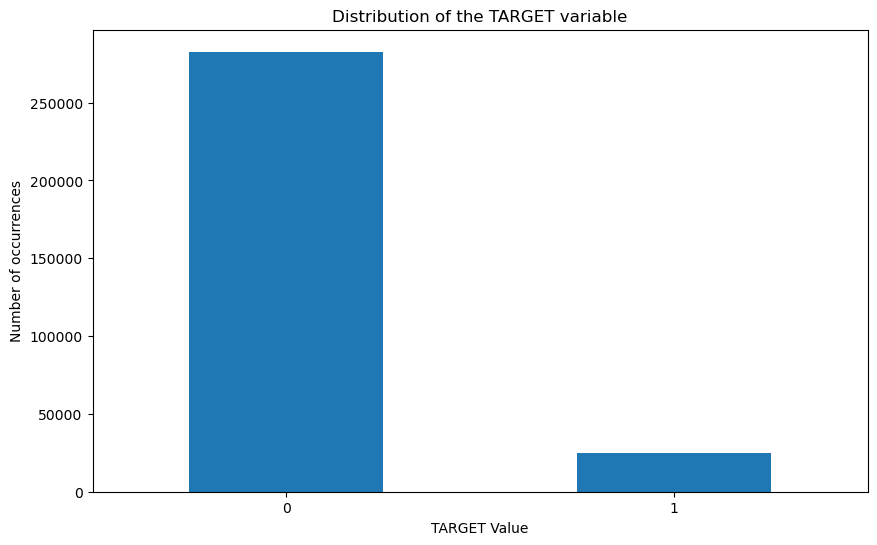

In [64]:
# Plotting the histogram for the 'TARGET' column with different colors for each bar
plt.figure(figsize=(10, 6))
application_df['TARGET'].value_counts().plot(kind='bar')
plt.title('Distribution of the TARGET variable')
plt.xlabel('TARGET Value')
plt.ylabel('Number of occurrences')
plt.xticks([0, 1], ['0', '1'], rotation=0)
plt.grid(False)
plt.show()


### Let's start by identifying categorical and numerical variables in both datasets.
For simplicity, we consider variables with a limited number of unique values as categorical.

In [65]:
# Separating numerical and non-numerical (categorical/other) variables in the dataframe
numerical_vars = application_df.select_dtypes(include=['number']).columns.tolist()
non_numerical_vars = application_df.select_dtypes(exclude=['number']).columns.tolist()

In [66]:
non_numerical_vars

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'AGE_RANGE',
 'WORK_EXPERIENCE_YEARS']

In [67]:
numerical_vars

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AGE',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE']

## Analyze Categorical Data in <code>'application_data'</code>
### Let's take a quick look into counts of each categorical variable

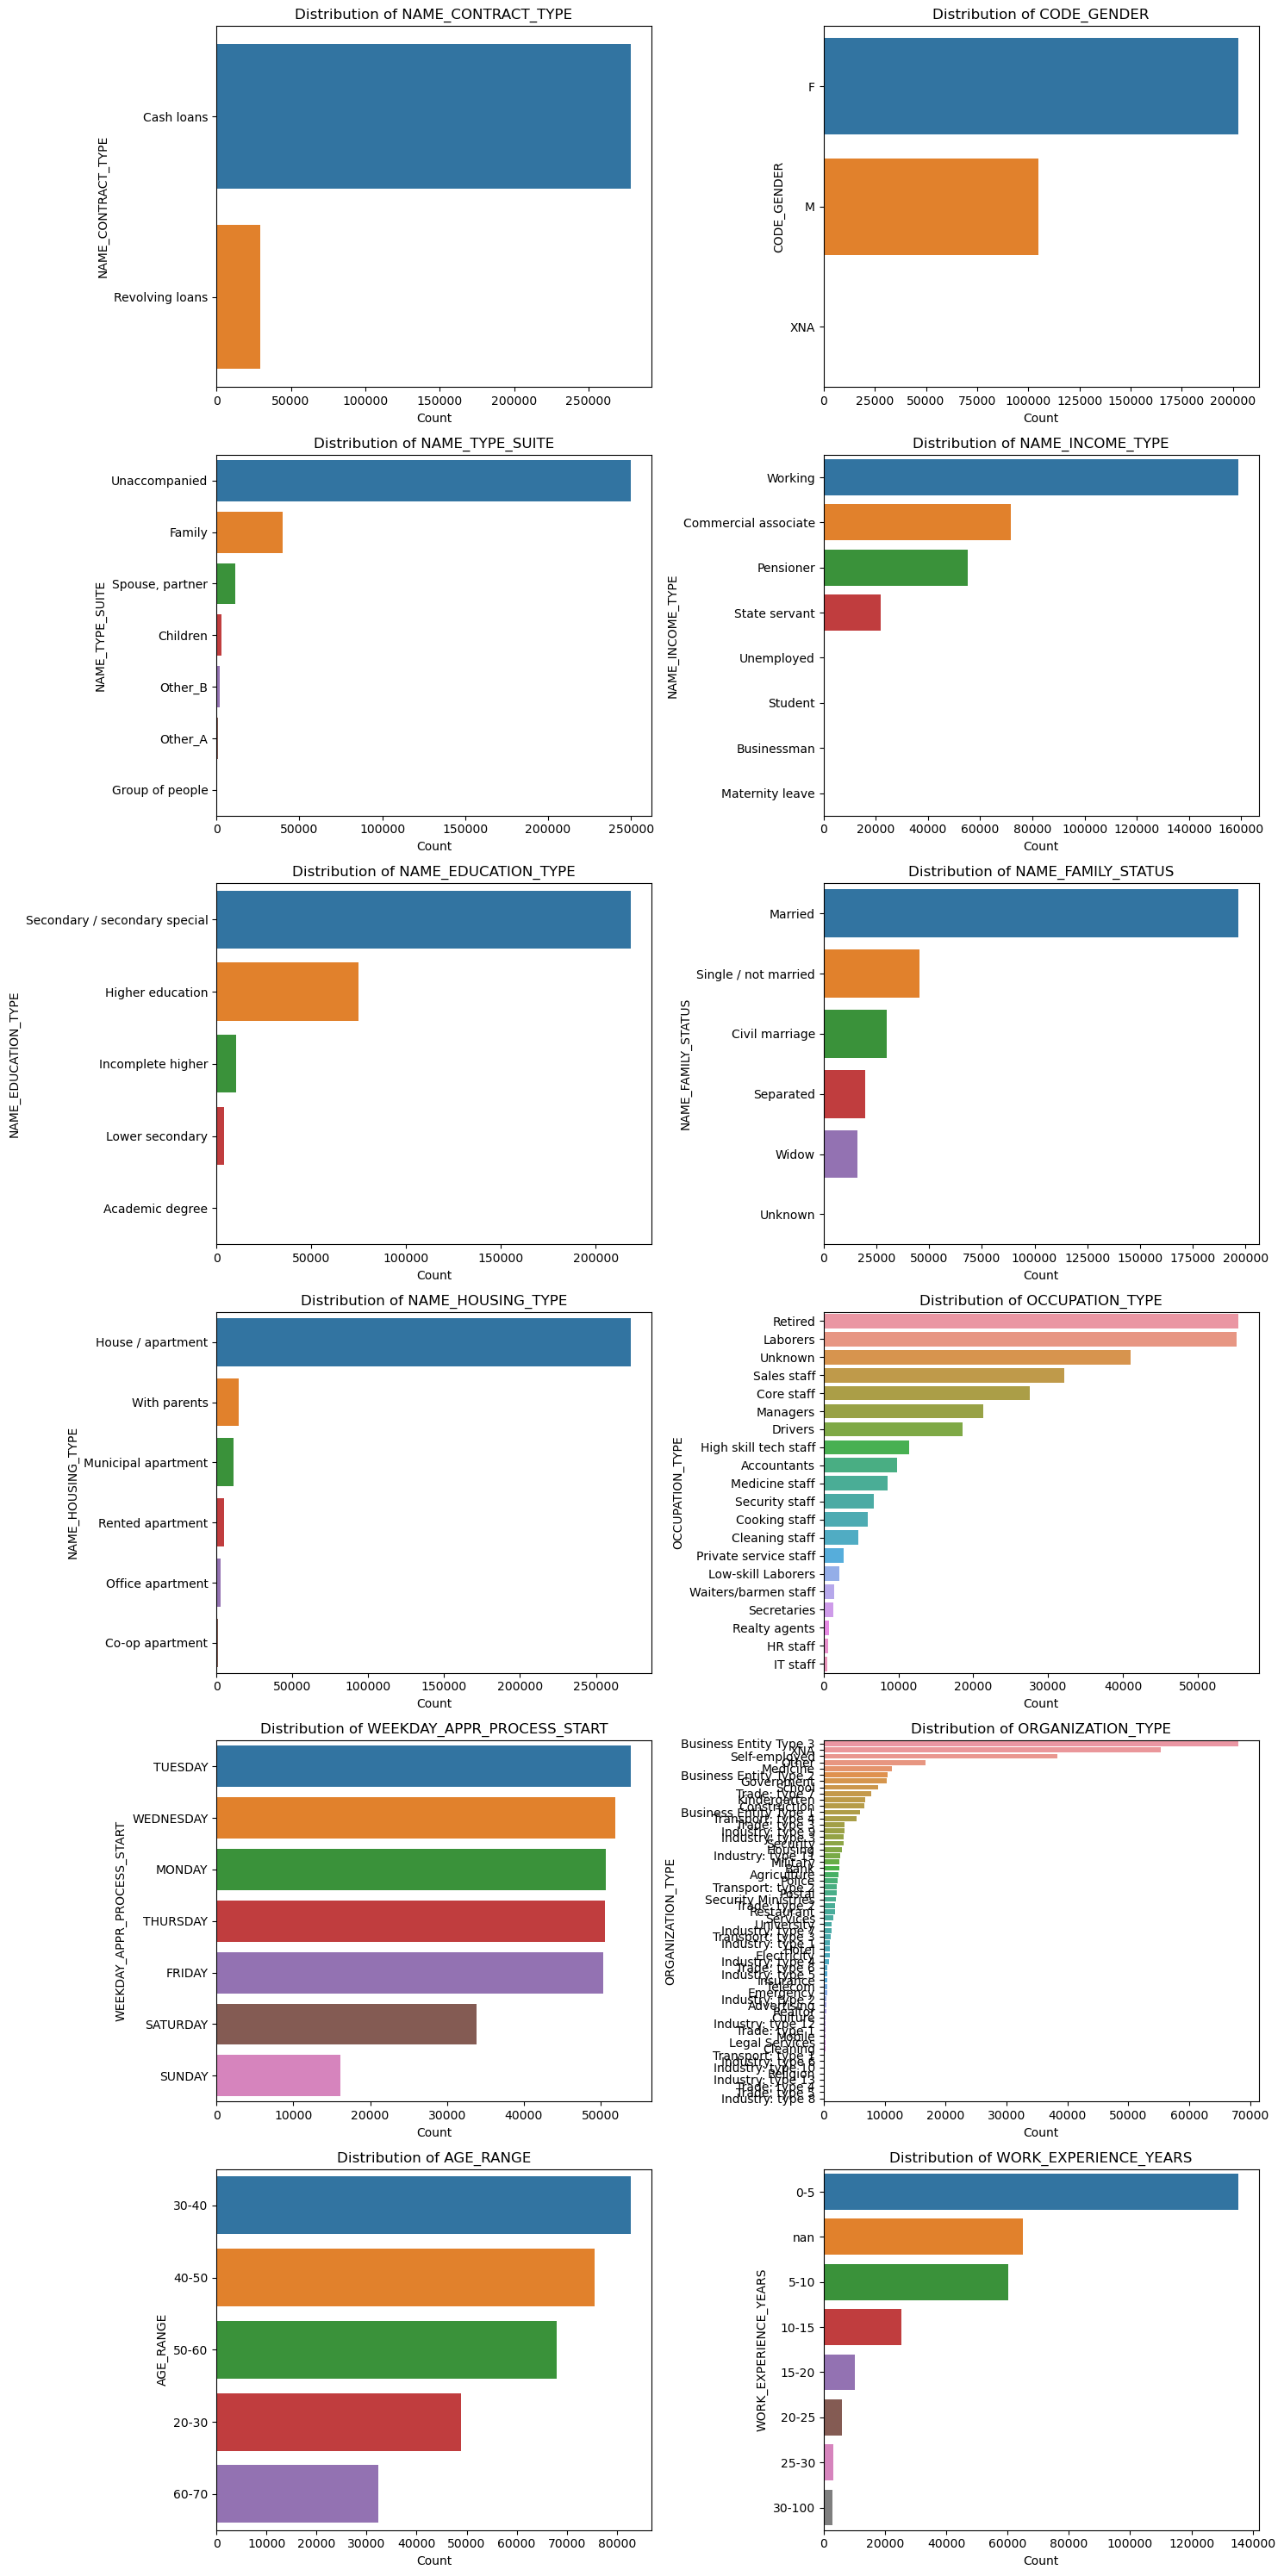

In [68]:
# Define the number of rows needed in the subplot grid
n_rows = len(non_numerical_vars) // 2 + len(non_numerical_vars) % 2

# Create a figure with subplots
plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(non_numerical_vars, 1):
    plt.subplot(n_rows, 2, i)
    # Convert to string to avoid any issues with non-categorical data
    application_df[col] = application_df[col].astype(str)
    # Count plot for each categorical variable
    ax = sns.countplot(y=col, data=application_df, order=application_df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

# Adjust layout to prevent overlap of plots
plt.tight_layout()
plt.show()


### Analyze Categorical variables in relation to <code> 'TARGET' </code> varaible

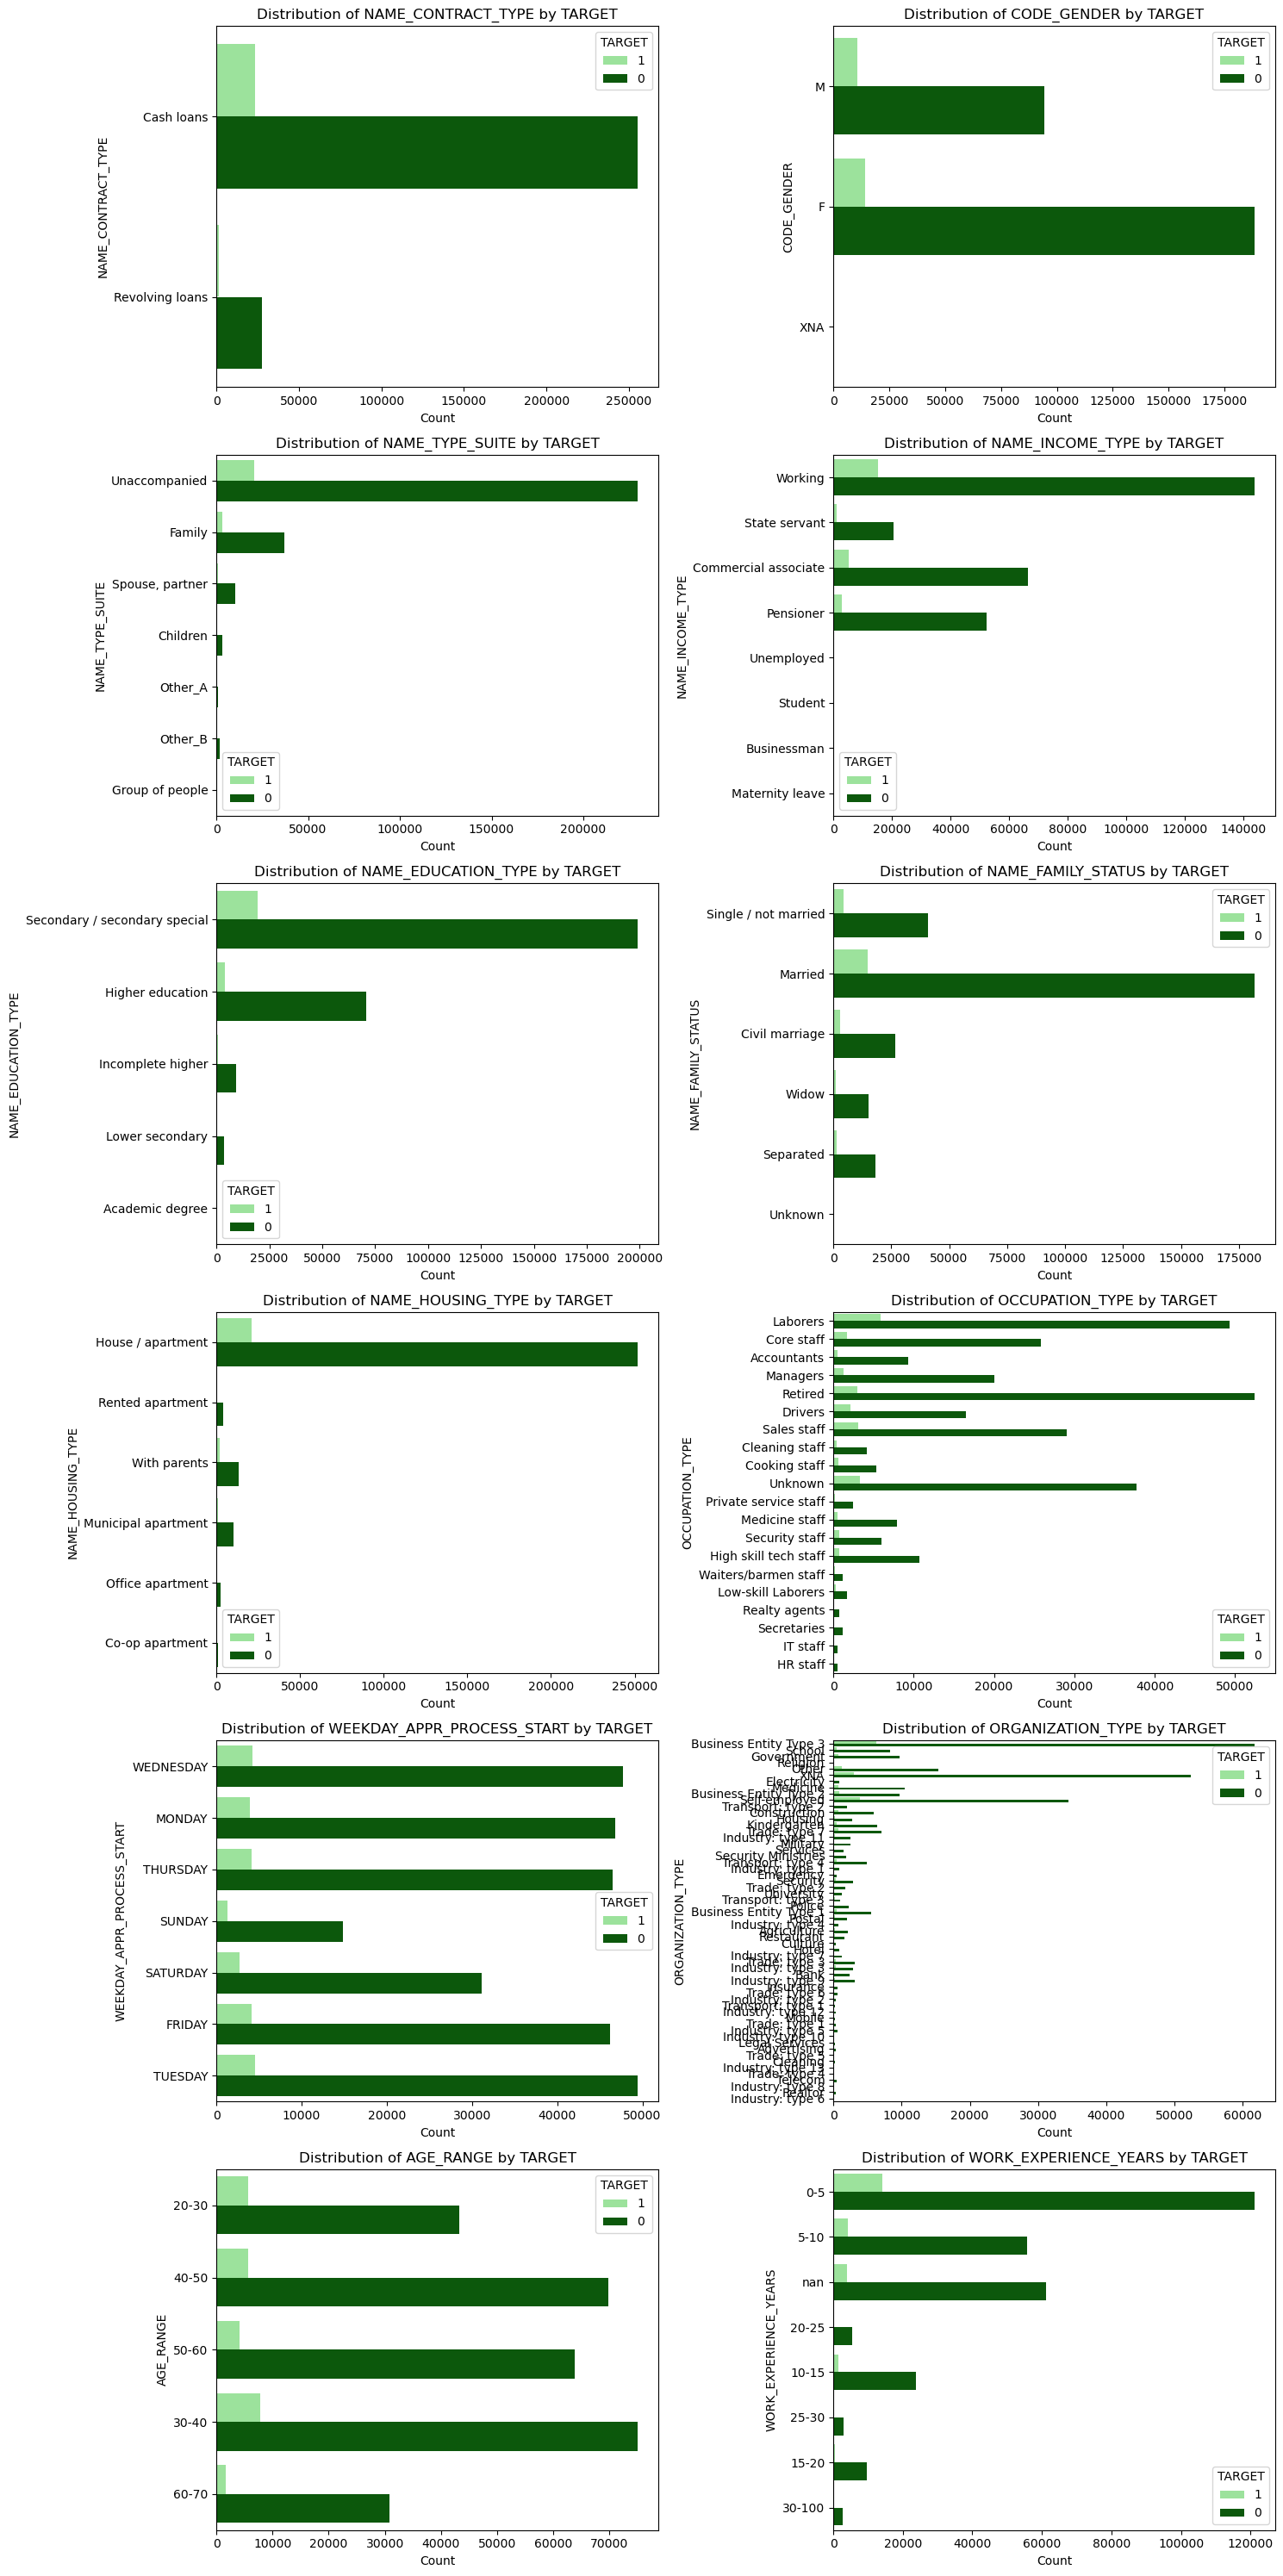

In [69]:
def plot_categorical_vs_target(df, categorical_vars, target_var='TARGET'):
    # Define the number of rows needed in the subplot grid
    n_rows = len(categorical_vars) // 2 + len(categorical_vars) % 2
    
    # Create a figure with subplots
    plt.figure(figsize=(15, 5 * n_rows))
    
    colors = ["lightgreen", "darkgreen"]

    for i, col in enumerate(categorical_vars, 1):
        plt.subplot(n_rows, 2, i)
        # Ensure the column is in string format to avoid AttributeError
        series = df[col].astype(str)
        # We also ensure the target_var is a string if it's being used as a hue
        hue_series = df[target_var].astype(str)
        # Count plot for each categorical variable with hue for the TARGET variable
        sns.countplot(y=series, hue=hue_series, palette=colors)
        plt.title(f'Distribution of {col} by {target_var}')
        plt.xlabel('Count')
        plt.ylabel(col)

    # Adjust layout to prevent overlap of plots
    plt.tight_layout()
    plt.show()

# Apply the plotting function to the application_data
plot_categorical_vs_target(application_df, non_numerical_vars)


### The ratio of target 1 to target 0 for each category

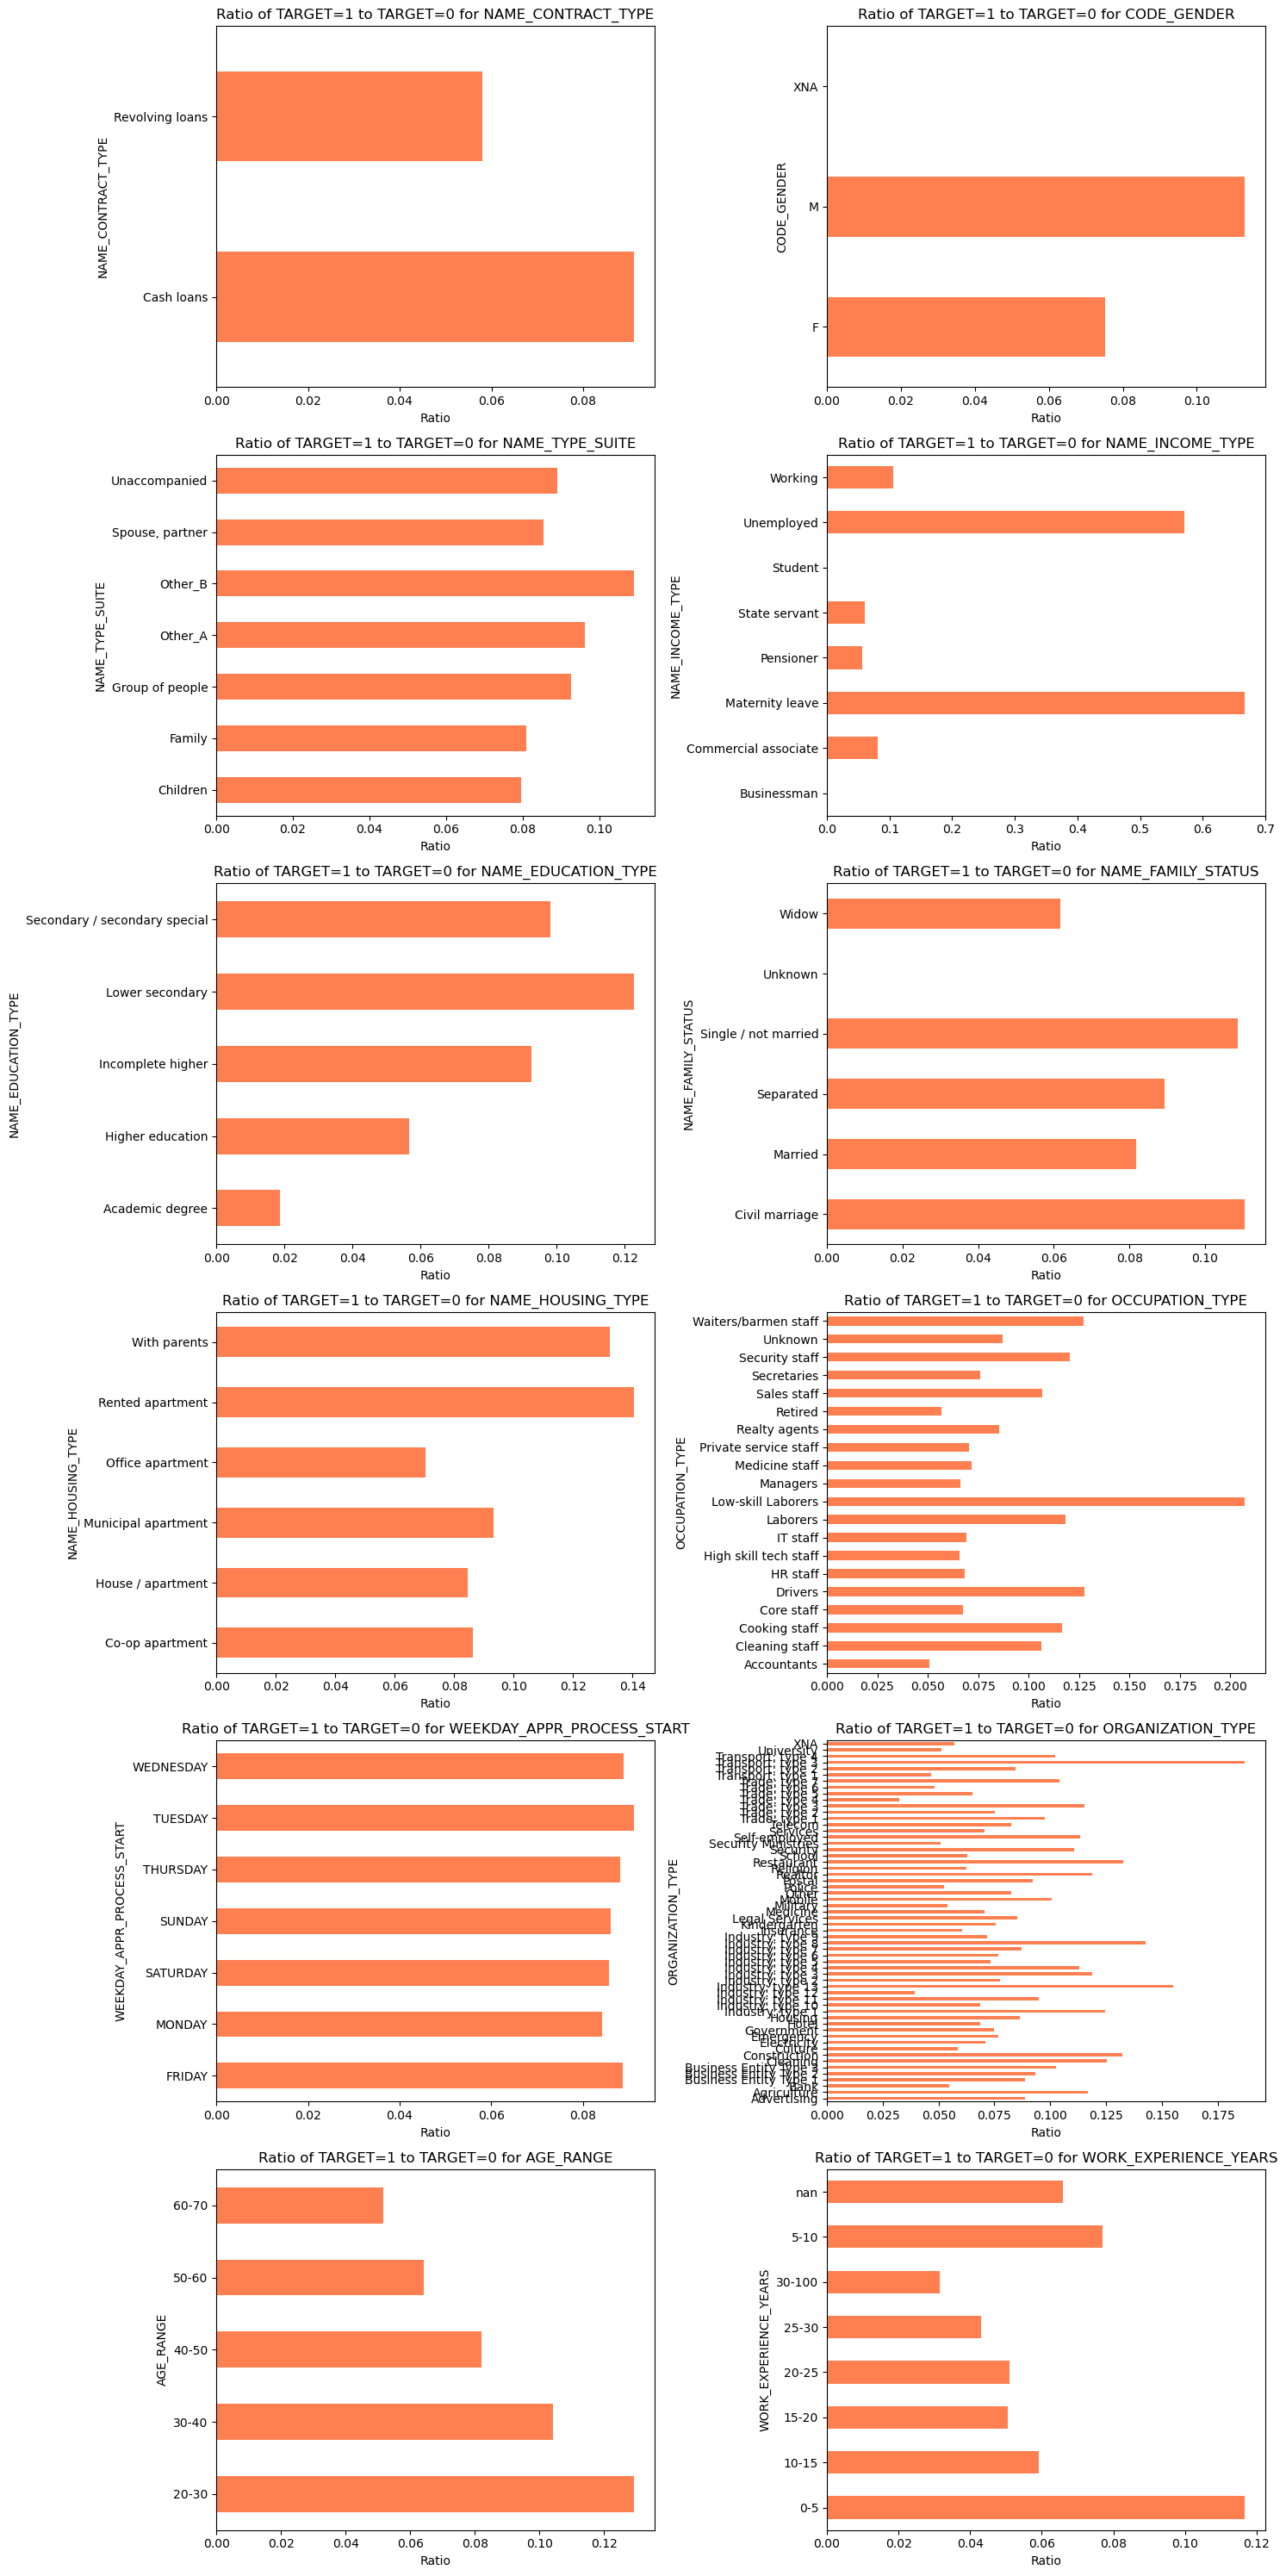

In [70]:
# Adjust the function to plot the ratio of target value 1 to target value 0 for each category of each categorical variable
def plot_target_ratio(df, categorical_vars, target_var='TARGET'):
    # Define the number of rows needed in the subplot grid
    n_rows = len(categorical_vars) // 2 + len(categorical_vars) % 2
    
    # Create a figure with subplots
    plt.figure(figsize=(15, 5 * n_rows))

    for i, col in enumerate(categorical_vars, 1):
        plt.subplot(n_rows, 2, i)
        # Calculate the ratio of target 1 to target 0 for each category
        ratio_df = df.groupby(col)[target_var].value_counts(normalize=True).unstack()
        # ratio_df = ratio_df.fillna(0)  # Fill NaN values with 0 for categories with no target 1 or 0
        # We calculate the ratio of 1s to 0s
        # ratio_df['ratio'] = ratio_df[1] / (ratio_df[0] + 0.00001)  # Add a small number to avoid division by zero
        ratio_df['ratio'] = ratio_df[1] / (ratio_df[0])  
        
        # Bar plot for the ratio
        ratio_df['ratio'].plot(kind='barh', color='coral')
        plt.title(f'Ratio of {target_var}=1 to {target_var}=0 for {col}')
        plt.xlabel('Ratio')
        plt.ylabel(col)

    # Adjust layout to prevent overlap of plots
    plt.tight_layout()
    plt.show()

# Apply the plotting function to the application_data
plot_target_ratio(application_df, non_numerical_vars)


Some important things we can note from the above analysis

* <strong>Gender:</strong> The ratio of males (M) with payment difficulties is higher than that of females (F). This may indicate that gender could be a factor in loan repayment risk, with males showing a higher likelihood of default.

* <strong>Income Type:</strong> Businessmen have a significantly lower ratio of payment difficulties, while clients on maternity leave have a higher ratio. This could imply that employment stability and income type are important factors in predicting loan repayment difficulties.

* <strong>Education Type:</strong> Clients with a lower level of education, such as Lower secondary or Secondary / secondary special, show higher ratios of payment difficulties. Higher education levels seem to be associated with lower default ratios.

* <strong>Family Status:</strong> Single/not married clients and those who are separated have higher ratios of payment difficulties. This could suggest that marital status and family stability may influence the ability to repay loans.

* <strong>Housing Type:</strong> Clients living in certain types of housing, like with parents or in rented apartments, have a higher ratio of payment difficulties. This might indicate that housing stability or owning a home could be linked to a lower risk of default.

* <strong>Occupation Type:</strong> Low-skill laborers, Drivers, and Security staff have the highest ratios of payment difficulties, suggesting that certain occupations might be more vulnerable to default.

* <strong>Organization Type:</strong> Clients working for certain types of organizations, like Business Entity Type 3, have higher ratios of payment difficulties. This could imply that the nature of the employer or industry sector may be a risk factor.

* <strong>Day of the Week:</strong> There seems to be a slight variation in the ratio of payment difficulties based on the weekday of the loan application. However, the differences are relatively small and might not be significant.



One thing for sure is that there isn't any importance in day of the week. Most days target 1 to target 0 ratio is same

In [71]:
application_df.drop(columns= 'WEEKDAY_APPR_PROCESS_START', inplace = True)

## Bivariate/Multivariate analysis : Continuous V/S Categorical variables

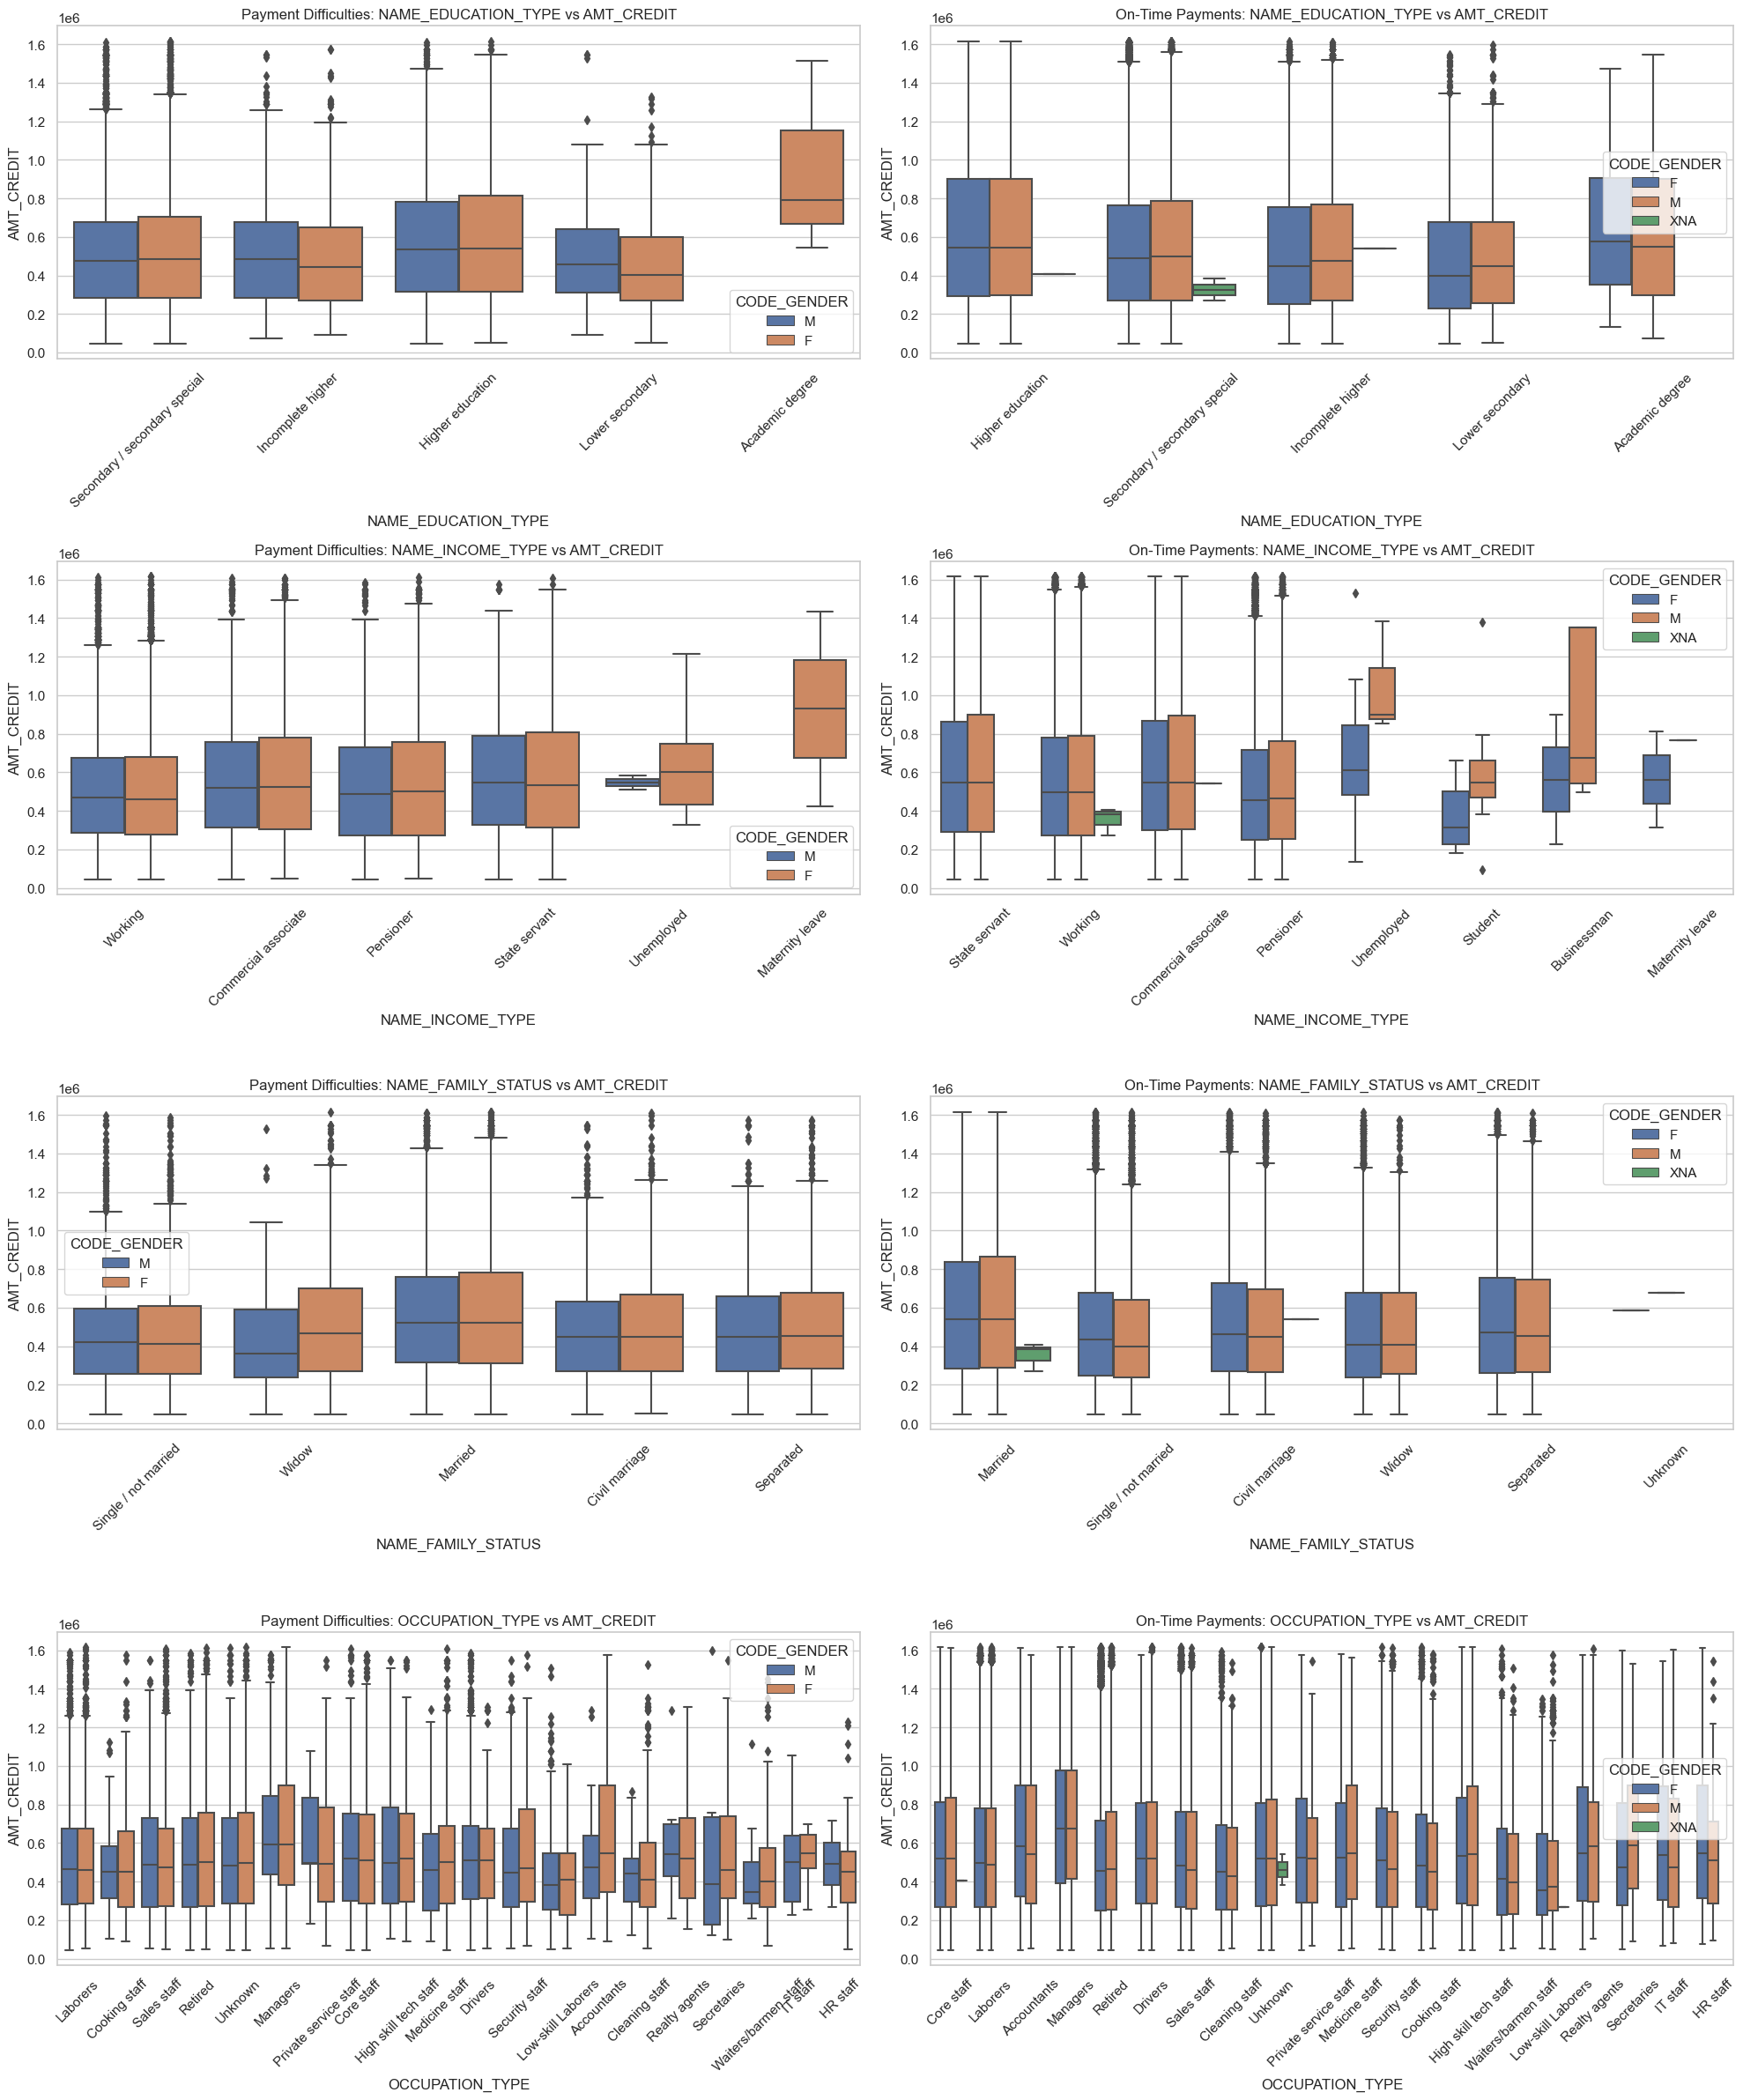

In [72]:
# Define the categorical variables for the analysis
categorical_vars = [
    'NAME_EDUCATION_TYPE', 
    'NAME_INCOME_TYPE',
    'NAME_FAMILY_STATUS',
    'OCCUPATION_TYPE'
]

# Plot settings
sns.set(style="whitegrid")

# Creating subplots for each categorical variable against AMT_CREDIT
n_cols = 2
n_rows = len(categorical_vars)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 6))

for i, cat_var in enumerate(categorical_vars):
    # Payment Difficulties
    sns.boxplot(ax=axes[i, 0], data=application_df[application_df['TARGET'] == 1], x=cat_var, y='AMT_CREDIT', hue='CODE_GENDER')
    axes[i, 0].set_title(f'Payment Difficulties: {cat_var} vs AMT_CREDIT')
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    # On-Time Payments
    sns.boxplot(ax=axes[i, 1], data=application_df[application_df['TARGET'] == 0], x=cat_var, y='AMT_CREDIT', hue='CODE_GENDER')
    axes[i, 1].set_title(f'On-Time Payments: {cat_var} vs AMT_CREDIT')
    axes[i, 1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<strong>Education Type and Credit Amount:</strong>

- Individuals with an 'Academic Degree' tend to have higher credit amounts overall.
- There is a noticeable difference in credit amount by gender within certain education categories, particularly for those with an academic degree.

<strong>Gender and Credit Amount:</strong>

- Male clients generally have a higher median credit amount across most categories compared to female clients.

<strong>Family Status and Credit Amount:</strong>

- Married clients tend to have higher credit amounts, which could be due to combined incomes or stability perceived by lenders.
- Single clients have a lower range of credit amounts, which might reflect lower financial support.


<strong>Occupation Type and Credit Amount:</strong>

- Managers and high-skill professionals have higher median credit amounts, likely reflecting higher income levels.
- Lower-skill occupations, like waiters/barment staff, have lower credit amounts, potentially due to lower incomes.

<strong> Payment Timeliness:</strong>

- When comparing payment difficulties with on-time payments, there's an observable difference in the spread and median of credit amounts, with on-time payments often having higher credit amounts.
- This could suggest that those who manage their credit well either have access to more credit or are more likely to be approved for higher amounts.


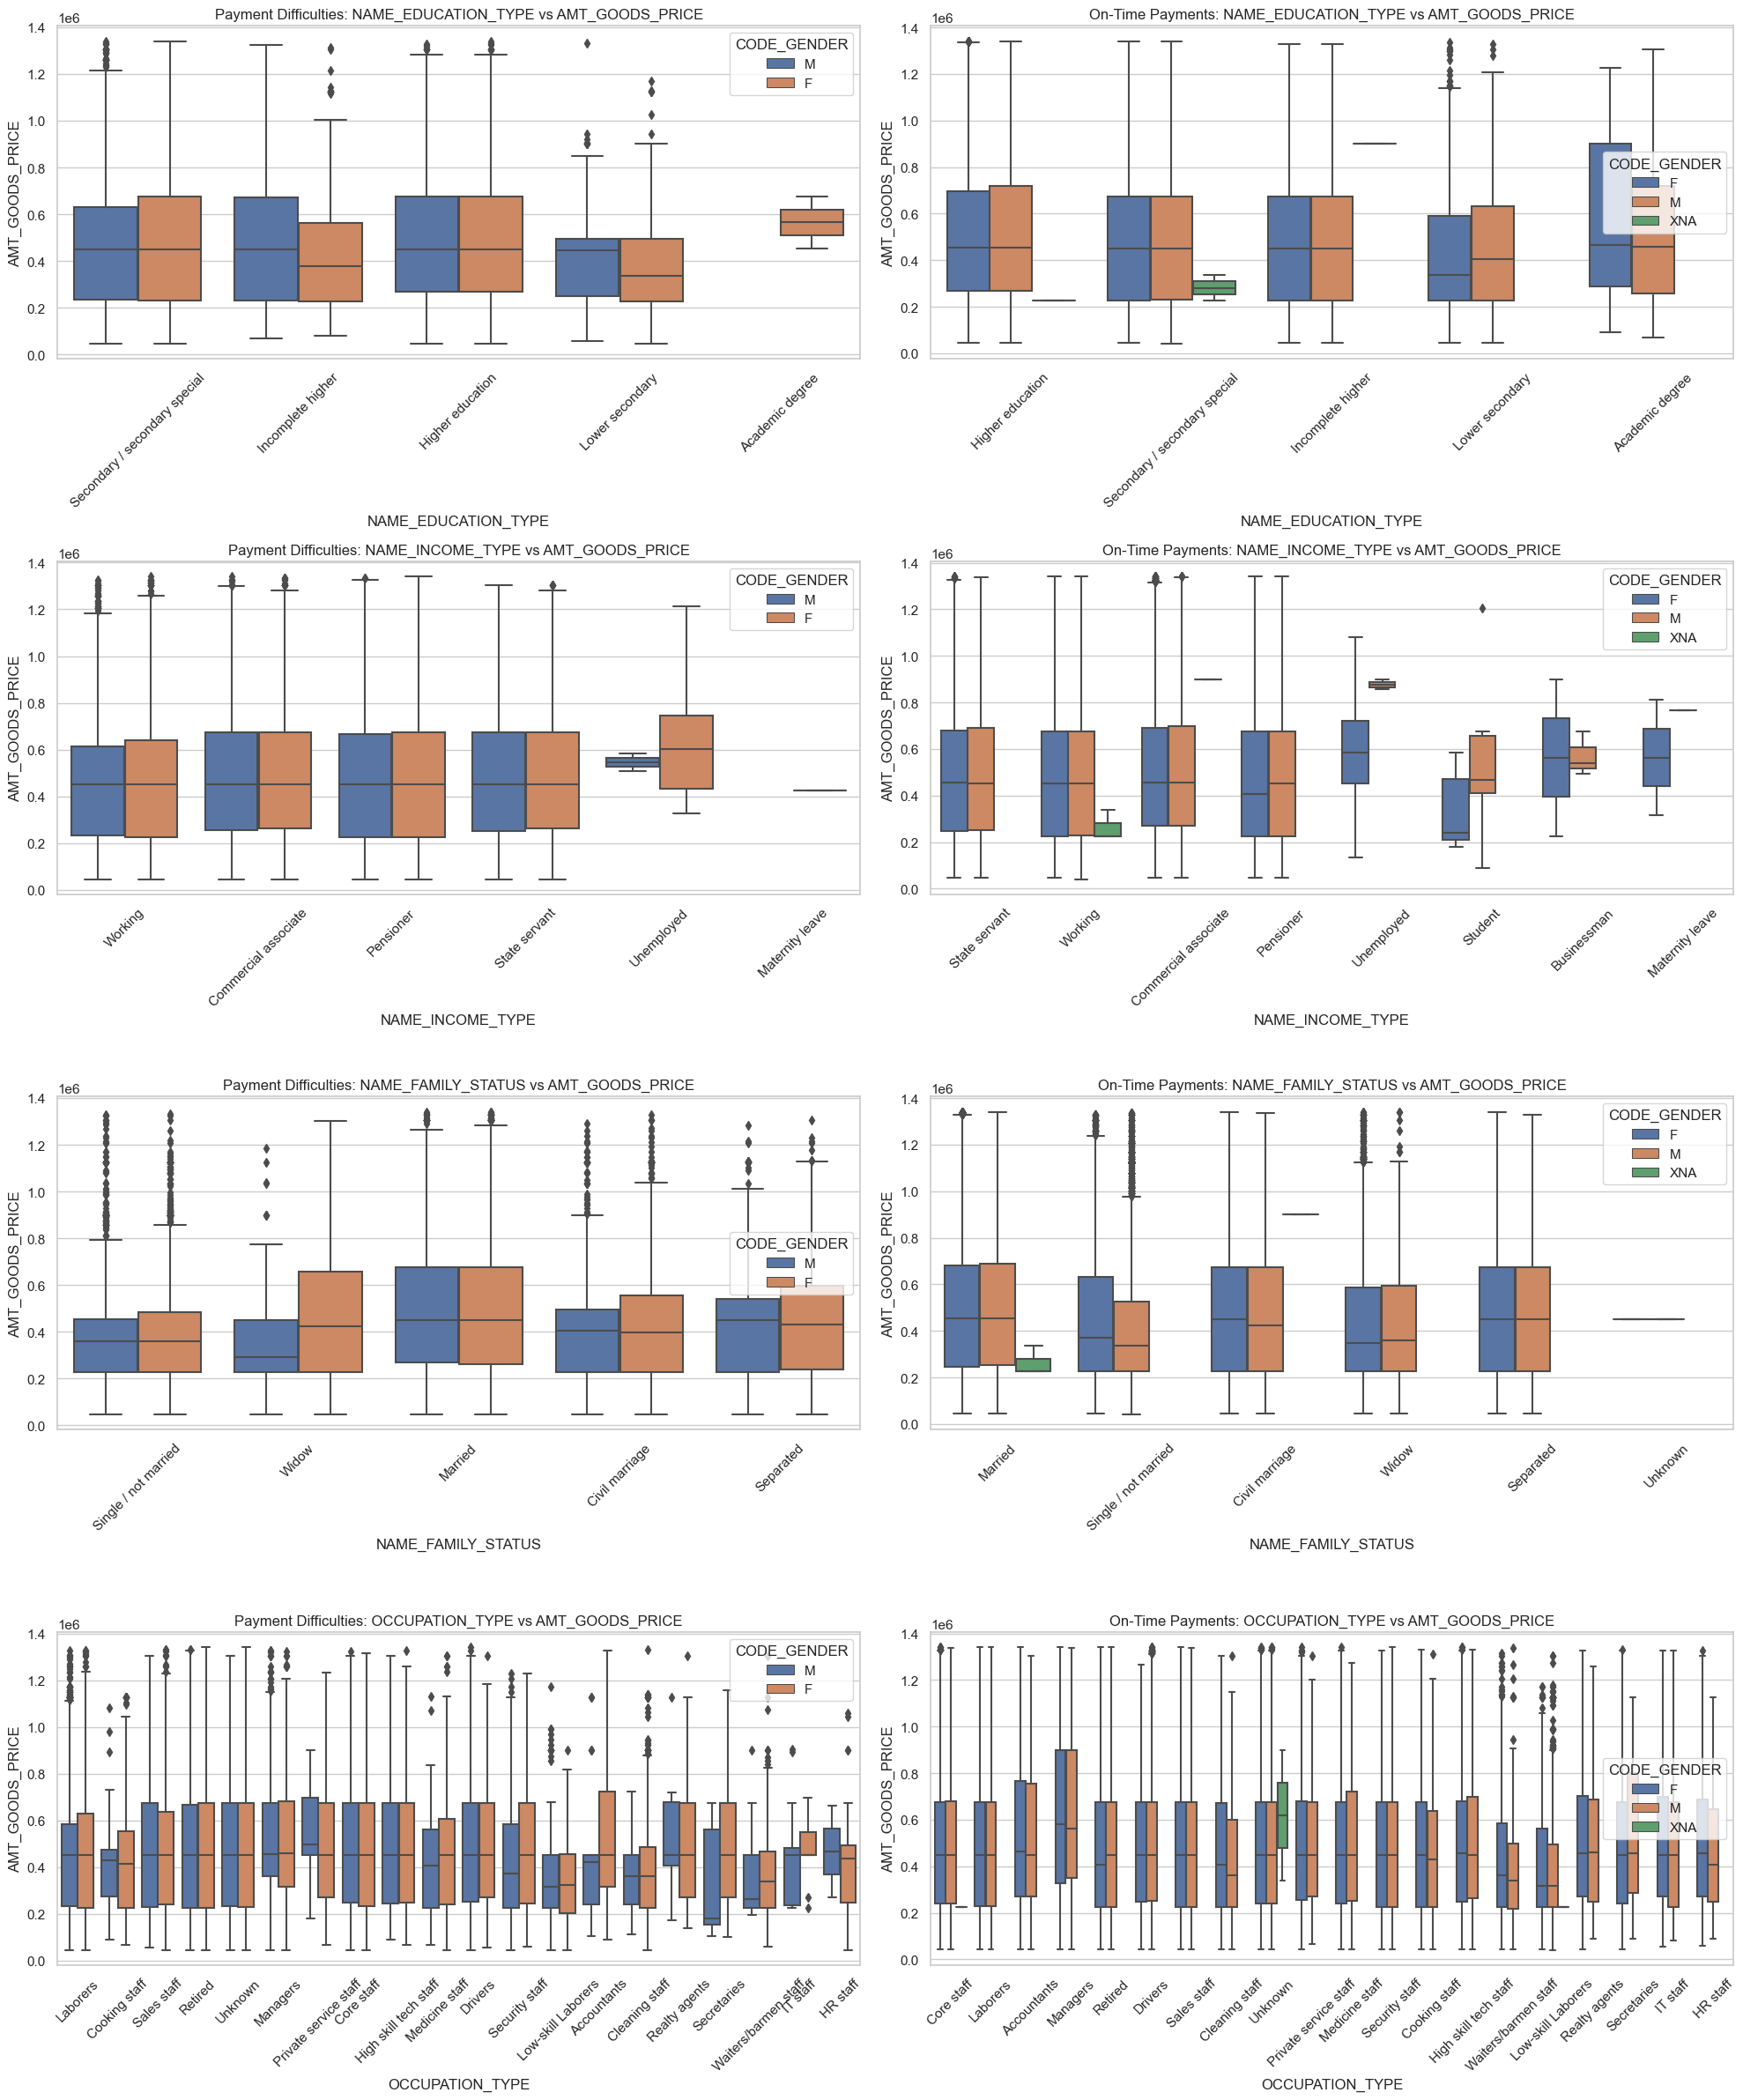

In [73]:

# Plot settings
sns.set(style="whitegrid")

# Creating subplots for each categorical variable against AMT_CREDIT
n_cols = 2
n_rows = len(categorical_vars)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 6))

for i, cat_var in enumerate(categorical_vars):
    # Payment Difficulties
    sns.boxplot(ax=axes[i, 0], data=application_df[application_df['TARGET'] == 1], x=cat_var, y='AMT_GOODS_PRICE', hue='CODE_GENDER')
    axes[i, 0].set_title(f'Payment Difficulties: {cat_var} vs AMT_GOODS_PRICE')
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    # On-Time Payments
    sns.boxplot(ax=axes[i, 1], data=application_df[application_df['TARGET'] == 0], x=cat_var, y='AMT_GOODS_PRICE', hue='CODE_GENDER')
    axes[i, 1].set_title(f'On-Time Payments: {cat_var} vs AMT_GOODS_PRICE')
    axes[i, 1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Education Level and Goods Price:**

- Individuals with **higher education levels** tend to have **higher median amounts** of goods prices, which could suggest that **higher education correlates** with the ability to purchase more expensive goods or be approved for higher amounts of credit.

**Income Type and Goods Price:**

- There are visible differences in the median goods prices among different income types. '**Working**' and '**Commercial associate**' categories show **higher median goods prices**, which might reflect their purchasing power or creditworthiness.

**Family Status and Goods Price:**

- Median goods prices vary with family status, with **married individuals** generally having **higher median goods prices** than single or separated individuals. This could be due to combined family incomes or the need for larger or more expensive purchases in married households.

**Occupation and Goods Price:**

- There's a variation in **median goods prices** across different occupation types. Professions typically associated with higher income levels, such as '**Managers**', have **higher median goods prices**, possibly reflecting higher economic status or credit approval rates.

**Gender Differences:**

- There are slight differences in the **median goods prices** between genders. In most categories, males have a **slightly higher median goods price** compared to females, which might indicate gender disparities in credit amounts or purchasing habits.

**Payment Difficulties vs. On-Time Payments:**

- The distribution of goods prices is fairly similar between those with **payment difficulties** and those with **on-time payments**, suggesting that the price of goods may not be a distinguishing factor in predicting payment difficulties.

**Consistency Across Categories:**

- Despite differences in median values, the **interquartile ranges (IQRs)** for goods prices are relatively consistent within each category across payment groups, indicating that the spread of goods prices within each category is similar regardless of payment performance.


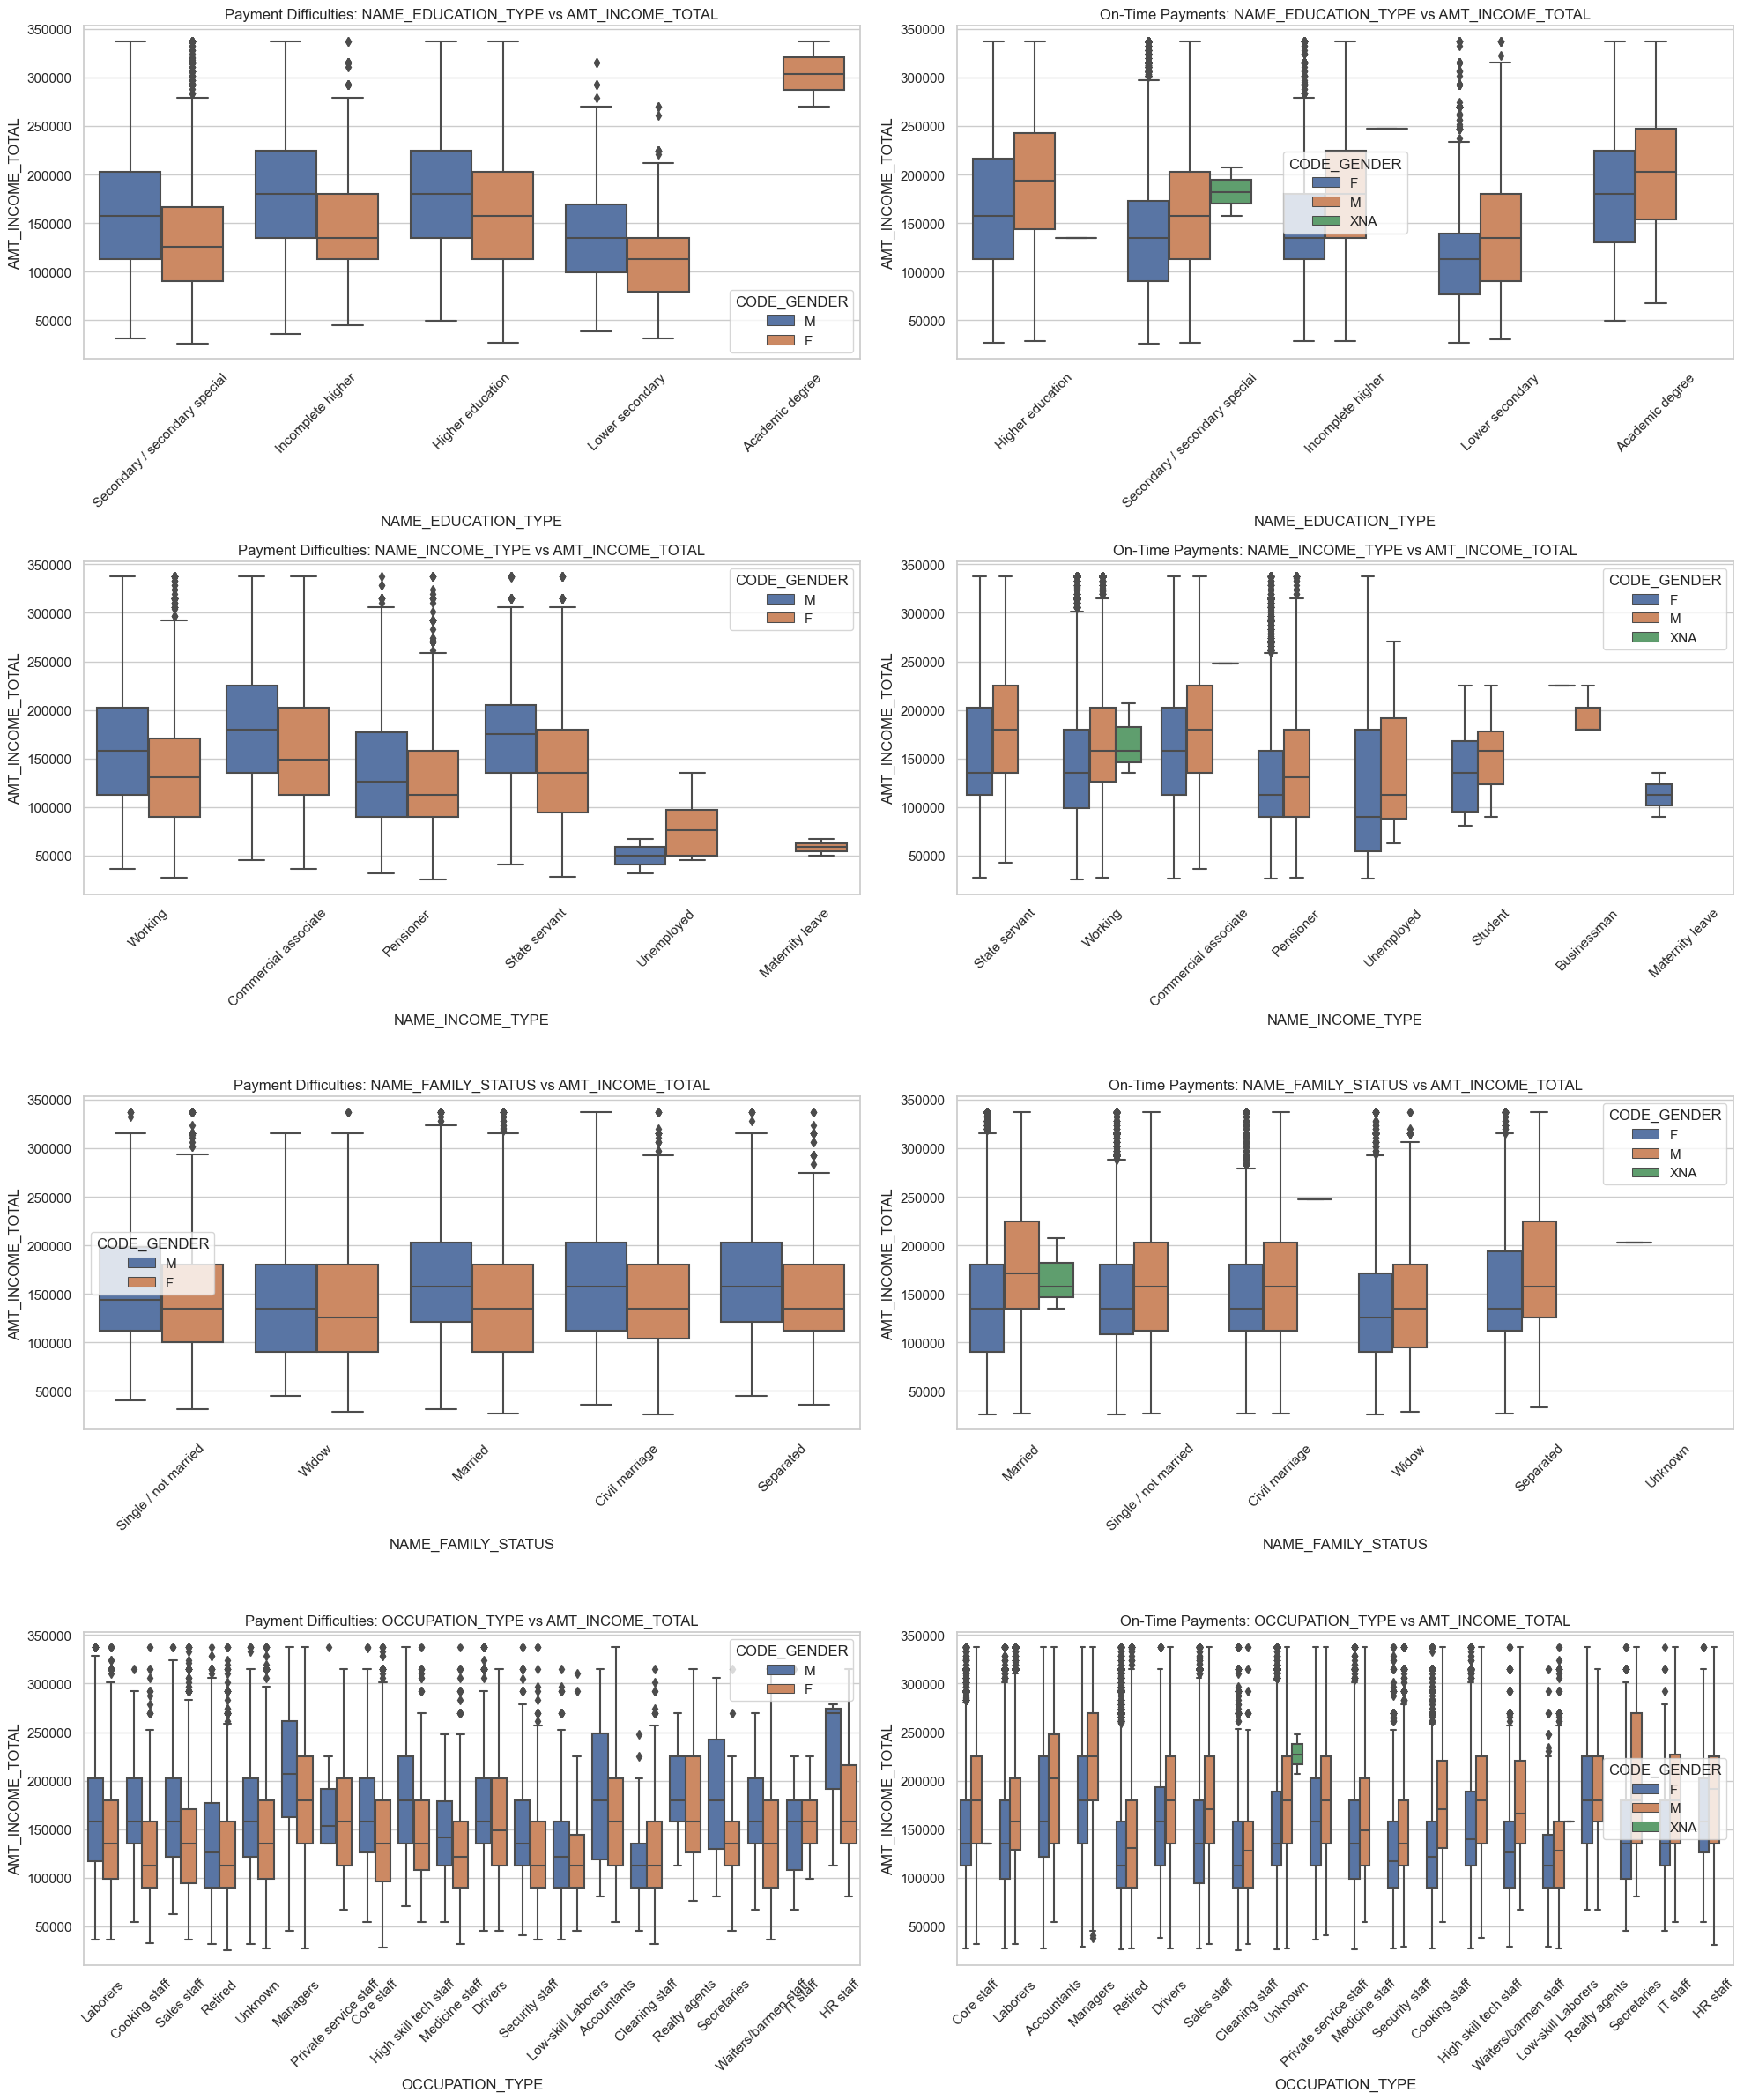

In [74]:

# Plot settings
sns.set(style="whitegrid")

# Creating subplots for each categorical variable against AMT_CREDIT
n_cols = 2
n_rows = len(categorical_vars)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 6))

for i, cat_var in enumerate(categorical_vars):
    # Payment Difficulties
    sns.boxplot(ax=axes[i, 0], data=application_df[application_df['TARGET'] == 1], x=cat_var, y='AMT_INCOME_TOTAL', hue='CODE_GENDER')
    axes[i, 0].set_title(f'Payment Difficulties: {cat_var} vs AMT_INCOME_TOTAL')
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    # On-Time Payments
    sns.boxplot(ax=axes[i, 1], data=application_df[application_df['TARGET'] == 0], x=cat_var, y='AMT_INCOME_TOTAL', hue='CODE_GENDER')
    axes[i, 1].set_title(f'On-Time Payments: {cat_var} vs AMT_INCOME_TOTAL')
    axes[i, 1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Education Level and Income:**

- Higher levels of education, such as '**Higher education**', generally correspond with **higher total incomes** across both groups with payment difficulties and on-time payments.
- Individuals with '**Academic degree**' education exhibit some of the **highest income levels**, though the sample size might be smaller given the fewer data points.

**Income Type and Income:**

- There are distinct income levels associated with different income types. '**Commercial associates**' and '**Working**' individuals show **higher incomes**, whereas '**Pensioners**' and '**Students**' have **lower total incomes**.

**Family Status and Income:**

- Married individuals tend to have **higher incomes**, which might be due to dual-income households. Single and separated individuals show **lower income levels** in comparison.

**Occupation and Income:**

- Certain occupations, such as '**Managers**' and '**Core staff**', are associated with **higher income levels**, likely reflecting the professional status and earning potential of these jobs.
- Other occupations, like '**Low-skill Laborers**' and '**Drivers**', typically show **lower total incomes**.

**Gender Differences in Income:**

- Male individuals often have **higher incomes** across different categories compared to females, which might suggest gender pay gaps.


**Payment Difficulties vs. On-Time Payments:**

- The **median incomes** for those with payment difficulties do not appear drastically different from those with on-time payments, indicating that income alone may not be a strong predictor of payment difficulties.

**Income Distribution:**

- The distribution of income is generally wide across different categories and genders, with a significant number of outliers indicating individuals with exceptionally high incomes.


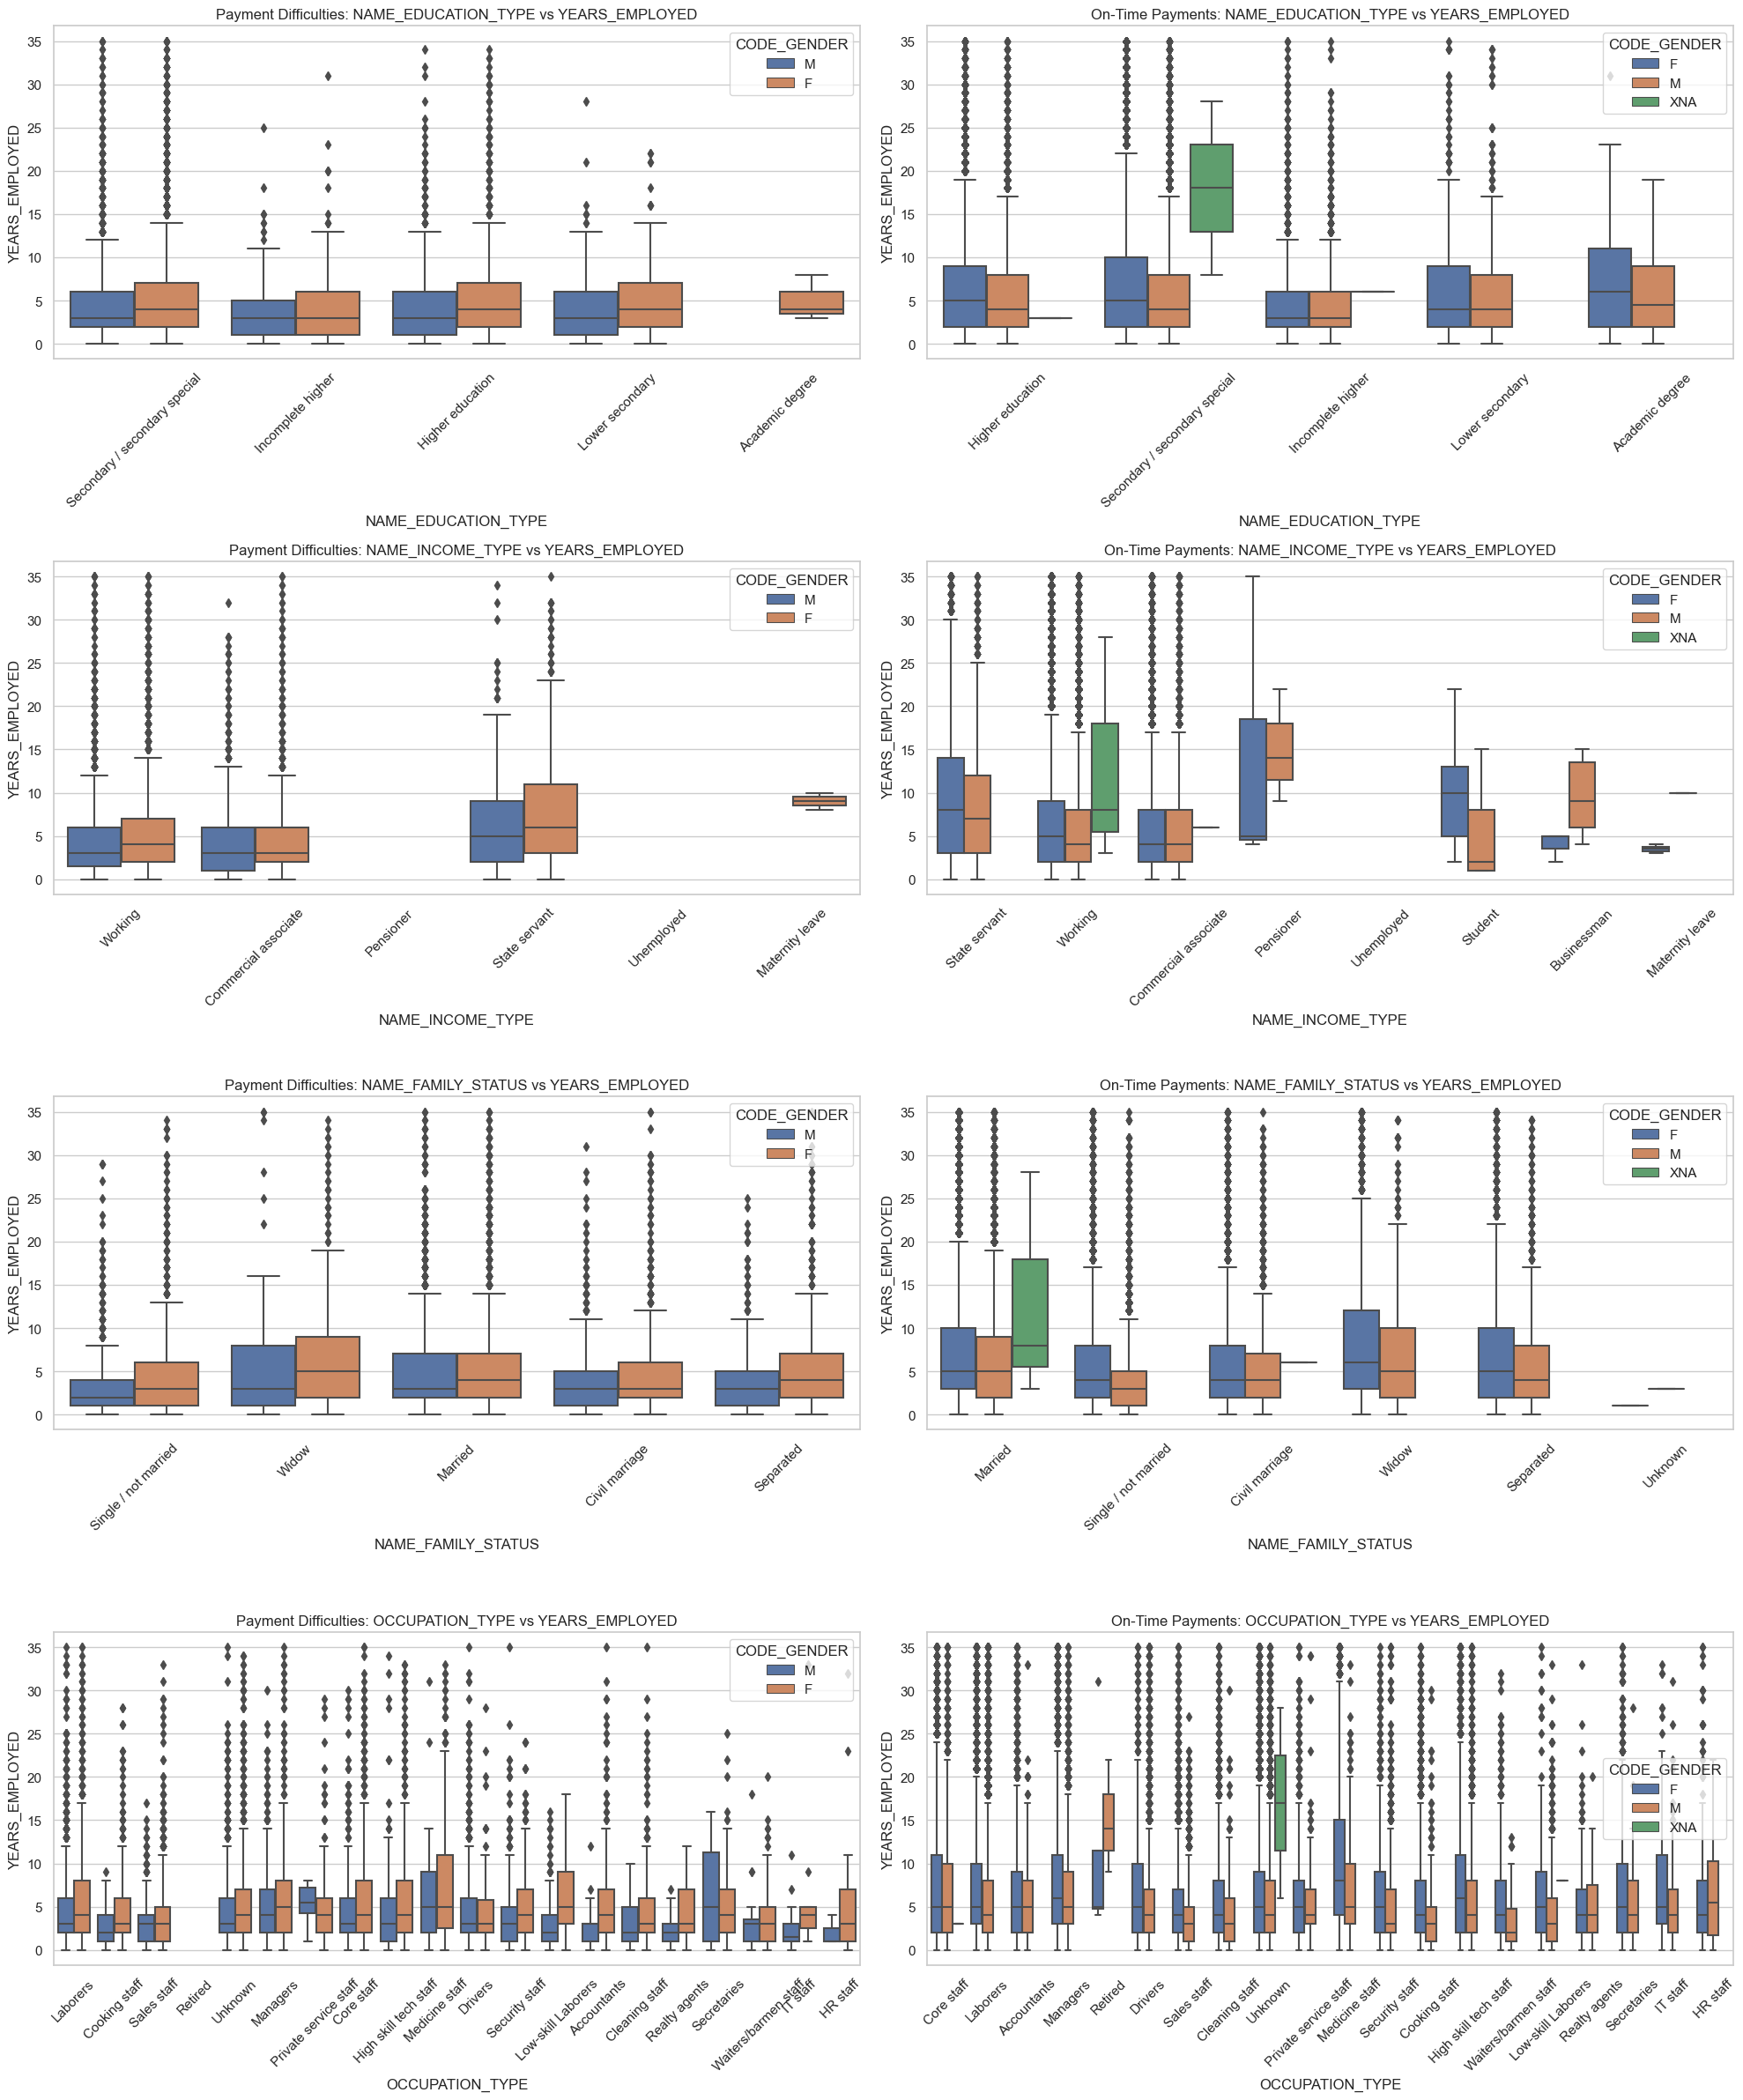

In [75]:

# Plot settings
sns.set(style="whitegrid")

# Creating subplots for each categorical variable against AMT_CREDIT
n_cols = 2
n_rows = len(categorical_vars)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 6))

for i, cat_var in enumerate(categorical_vars):
    # Payment Difficulties
    sns.boxplot(ax=axes[i, 0], data=application_df[application_df['TARGET'] == 1], x=cat_var, y='YEARS_EMPLOYED', hue='CODE_GENDER')
    axes[i, 0].set_title(f'Payment Difficulties: {cat_var} vs YEARS_EMPLOYED')
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    # On-Time Payments
    sns.boxplot(ax=axes[i, 1], data=application_df[application_df['TARGET'] == 0], x=cat_var, y='YEARS_EMPLOYED', hue='CODE_GENDER')
    axes[i, 1].set_title(f'On-Time Payments: {cat_var} vs YEARS_EMPLOYED')
    axes[i, 1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Education Level and Years Employed:**

- Individuals with **higher education** tend to have a broader range of **years employed**, particularly among those with **Academic degrees**. This might reflect varied career paths and professional opportunities available to individuals with higher educational qualifications.

**Income Type and Years Employed:**

- '**Working**' individuals have a wide range of **years employed**, suggesting diversity in the duration of their employment histories.
- **Pensioners**, as expected, show **higher years employed**, aligning with their life stage.

**Family Status and Years Employed:**

- Married individuals tend to show a wide range of **years employed**, possibly reflecting varied life stages and work experiences within this group.
- Single and separated statuses show a **narrower range of years employed**, potentially indicative of younger or less experienced demographics.

**Occupation and Years Employed:**

- Certain occupations, like '**Managers**' and '**High-skill tech staff**', display a wide distribution in **years employed**, which could be due to career progression opportunities within these fields.
- Manual and low-skill laborers tend to show **lower years employed**, which might suggest less job stability or shorter career spans in these roles.

**Gender Differences in Years Employed:**

- Male individuals across various categories often show **higher years employed** compared to females, which may be due to career interruptions women experience more frequently, such as maternity leave or part-time work for family care.


## Numerical Variables in <code>'application_data'</code>

Getting top 10 correlations 'With Payment difficulties'

In [76]:
# Filter the DataFrame for rows where TARGET is 1
target_1_df = application_df[application_df['TARGET'] == 1]

# Compute the correlation matrix for the subset where TARGET is 1
correlation_matrix_target_1 = target_1_df[numerical_vars].corr()

# Using the mask to get unique pairs from the upper triangle of the correlation matrix
mask_upper1 = np.triu(np.ones_like(correlation_matrix_target_1, dtype=bool), k=1)
unique_correlations_target_1 = correlation_matrix_target_1.where(mask_upper1)

# Stack the correlations into a Series, sort by absolute values in descending order, and take the top 10
# We use nlargest on the stacked Series to get the top 10 correlations without repeating pairs
top_10_correlations_target_1 = unique_correlations_target_1.stack().abs().nlargest(15)
top_10_correlations_target_1

AMT_CREDIT        AMT_GOODS_PRICE            0.978157
CNT_CHILDREN      CNT_FAM_MEMBERS            0.885484
AMT_CREDIT        AMT_ANNUITY                0.731556
AMT_ANNUITY       AMT_GOODS_PRICE            0.725745
AMT_INCOME_TOTAL  AMT_ANNUITY                0.410953
                  AMT_CREDIT                 0.320803
                  AMT_GOODS_PRICE            0.312108
AGE               YEARS_EMPLOYED             0.302081
                  YEARS_REGISTRATION         0.288672
CNT_CHILDREN      AGE                        0.258910
AGE               YEARS_ID_PUBLISH           0.252795
CNT_FAM_MEMBERS   AGE                        0.203014
YEARS_EMPLOYED    YEARS_LAST_PHONE_CHANGE    0.172659
CNT_CHILDREN      YEARS_REGISTRATION         0.149029
CNT_FAM_MEMBERS   YEARS_REGISTRATION         0.145576
dtype: float64

In [77]:
# Filter for rows where TARGET is 0
target_0_df = application_df[application_df['TARGET'] == 0]

# Compute the correlation matrix for this subset
correlation_matrix_target_0 = target_0_df[numerical_vars].corr()

# Create a mask for the upper triangle of the matrix
mask_upper0 = np.triu(np.ones_like(correlation_matrix_target_0, dtype=np.bool_), k=1)

# Apply the mask to the correlation matrix
correlations_target_0_upper = correlation_matrix_target_0.where(mask_upper0)

# Find the top 10 correlations
top_10_correlations_target_0 = correlations_target_0_upper.stack().nlargest(15)

top_10_correlations_target_0

AMT_CREDIT                  AMT_GOODS_PRICE            0.982024
CNT_CHILDREN                CNT_FAM_MEMBERS            0.878571
AMT_CREDIT                  AMT_ANNUITY                0.747135
AMT_ANNUITY                 AMT_GOODS_PRICE            0.738816
AMT_INCOME_TOTAL            AMT_ANNUITY                0.448411
                            AMT_CREDIT                 0.354415
                            AMT_GOODS_PRICE            0.340632
AGE                         YEARS_EMPLOYED             0.333845
                            YEARS_REGISTRATION         0.333009
                            YEARS_ID_PUBLISH           0.270395
YEARS_EMPLOYED              YEARS_REGISTRATION         0.159332
                            YEARS_LAST_PHONE_CHANGE    0.142734
AMT_REQ_CREDIT_BUREAU_YEAR  YEARS_LAST_PHONE_CHANGE    0.109550
YEARS_REGISTRATION          YEARS_ID_PUBLISH           0.099681
AMT_CREDIT                  YEARS_EMPLOYED             0.088669
dtype: float64

### Bivariate/Multivariate analysis

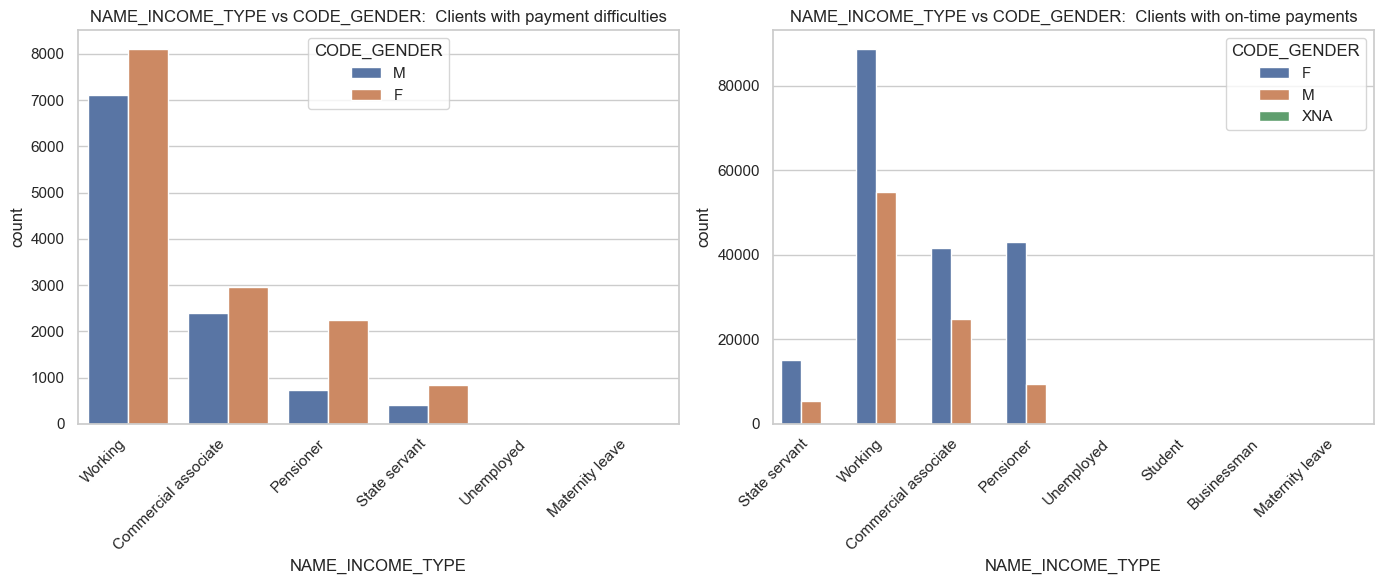

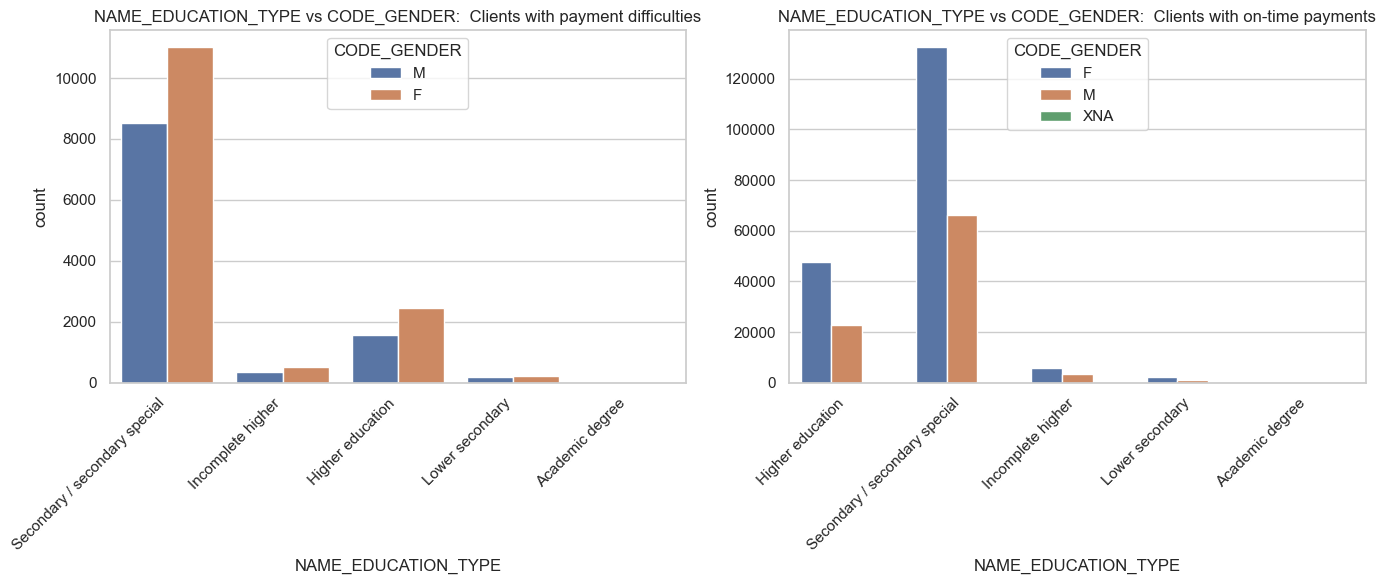

In [78]:
# Function to create bar plots for the given category and target variable
def create_bar_plot(df, category, target, hue=None, title_prefix=''):
    plt.figure(figsize=(14, 6))
    
    # Plotting clients with payment difficulties
    plt.subplot(1, 2, 1)
    sns.countplot(x=category, hue=hue, data=df[df[target] == 1])
    plt.title(f'{title_prefix} Clients with payment difficulties')
    plt.xticks(rotation=45, ha='right')

    # Plotting clients with on-time payments
    plt.subplot(1, 2, 2)
    sns.countplot(x=category, hue=hue, data=df[df[target] == 0])
    plt.title(f'{title_prefix} Clients with on-time payments')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

# Recreating the plots for each variable comparison
# Note: For the purpose of this code, it is assumed that the dataframe 'application_df' is already loaded and contains the necessary data.

# Plot for NAME_INCOME_TYPE vs CODE_GENDER
create_bar_plot(application_df, 'NAME_INCOME_TYPE', 'TARGET', hue='CODE_GENDER', title_prefix='NAME_INCOME_TYPE vs CODE_GENDER: ')

# Plot for NAME_EDUCATION_TYPE vs CODE_GENDER
create_bar_plot(application_df, 'NAME_EDUCATION_TYPE', 'TARGET', hue='CODE_GENDER', title_prefix='NAME_EDUCATION_TYPE vs CODE_GENDER: ')


# create_bar_plot(application_df, 'NAME_FAMILY_STATUS', 'TARGET', title_prefix='NAME_FAMILY_STATUS: ')
# create_bar_plot(application_df, 'YEARS_EMPLOYED', 'TARGET', hue='CODE_GENDER', title_prefix='YEARS_EMPLOYED vs CODE_GENDER: ')

# Plot for OCCUPATION_TYPE vs NAME_CONTRACT_TYPE
# create_bar_plot(application_df, 'OCCUPATION_TYPE', 'TARGET', hue='NAME_CONTRACT_TYPE', title_prefix='OCCUPATION_TYPE vs NAME_CONTRACT_TYPE: ')




**NAME_INCOME_TYPE vs CODE_GENDER:**

- <strong>Males</strong> who are working have the highest count of payment difficulties, while <strong>females</strong> in the same category have the highest on-time payment count.
- There is a notable number of pensioners with on-time payments, especially among <strong>females</strong>, while the count of pensioners with payment difficulties is relatively lower.

**NAME_EDUCATION_TYPE vs CODE_GENDER:**

- Clients with <strong>secondary education</strong>, regardless of gender, make up the largest group with payment difficulties and also the largest group with on-time payments.
- <strong>Higher education</strong> seems to be associated with a higher propensity for on-time payments, particularly among <strong>females</strong>.

**NAME_FAMILY_STATUS:**

- Married clients have the highest count of both payment difficulties and on-time payments, which may reflect the proportion of married clients in the dataset.
- Single clients and those in civil marriages also show significant counts, but with a greater propensity for on-time payments compared to payment difficulties.

**OCCUPATION_TYPE vs NAME_CONTRACT_TYPE:**

- Laborers with cash loans have a high count of payment difficulties, but also a very high count of on-time payments, which may indicate that this occupation type has a high representation in the dataset.
- Clients with revolving loans generally have fewer payment difficulties across all occupation types, suggesting that clients with revolving loans might be more consistent with payments or are a smaller group compared to those with cash loans.


## Lets take a deeper look into numerical variables
<p> Plot the density of clients with payment difficulties and On-Time Payments </p>

In [79]:
numerical_vars

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AGE',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE']

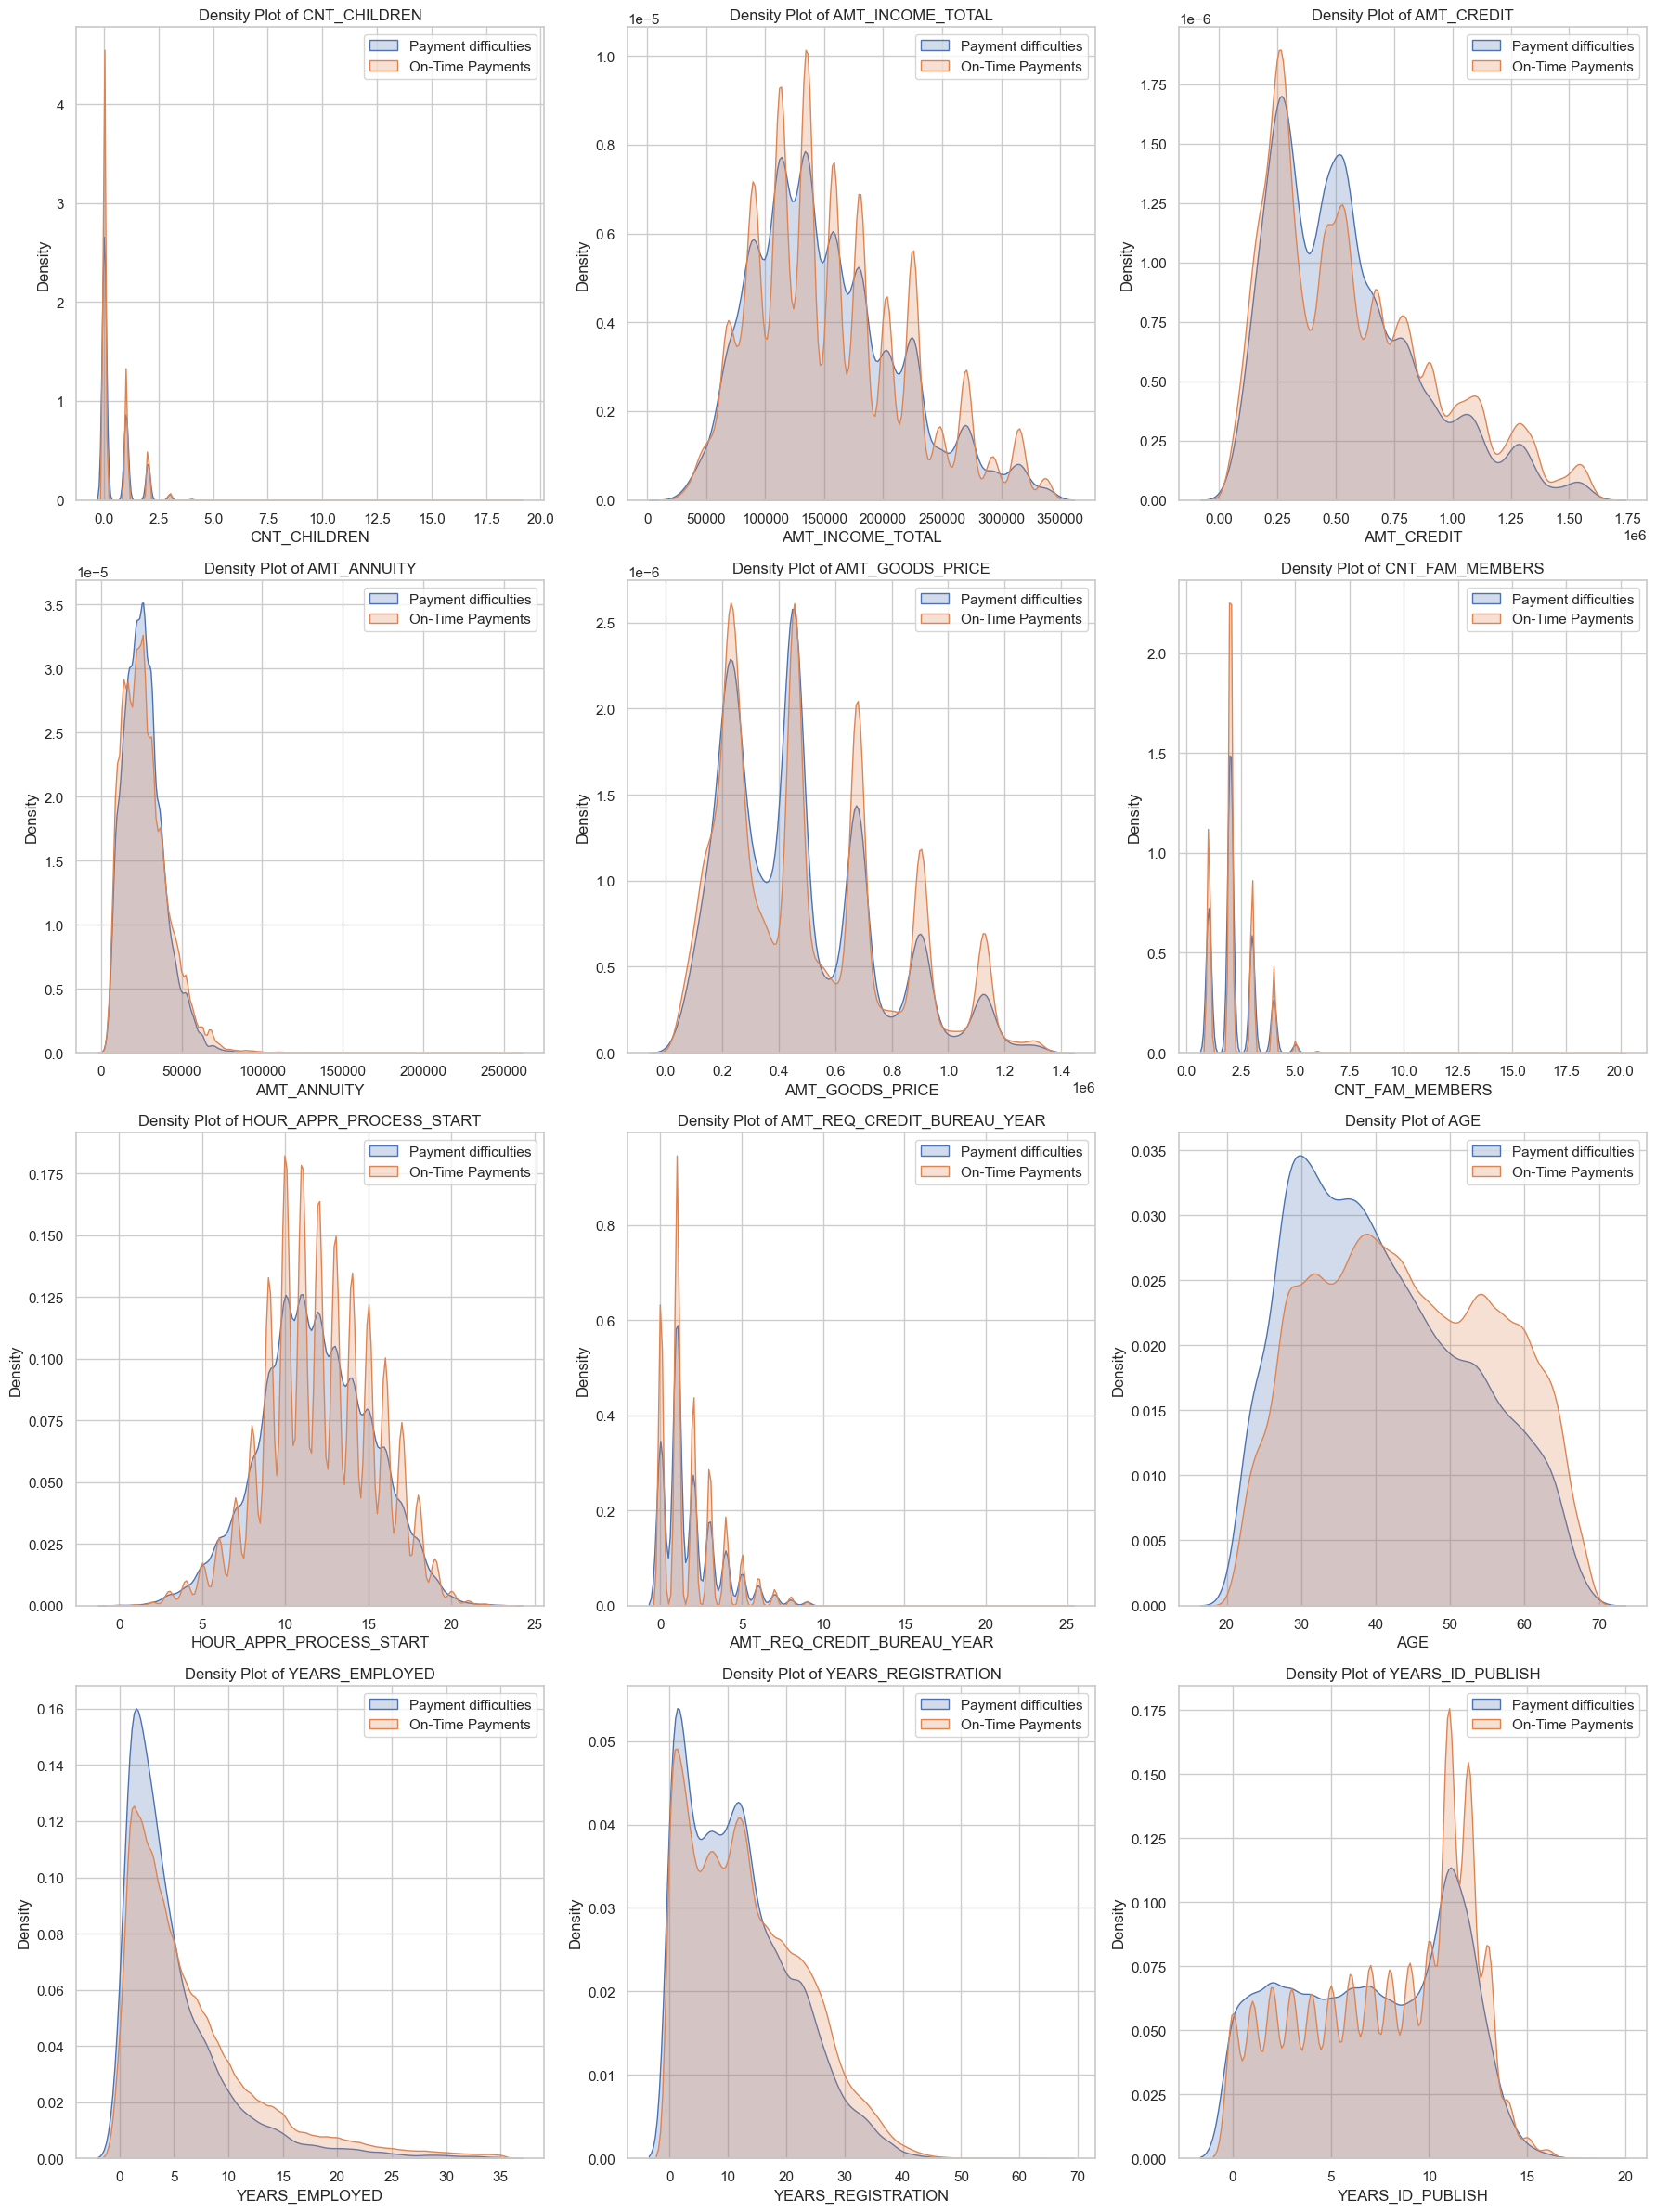

In [80]:
numerical_vars_to_plot = ['CNT_CHILDREN',
                         'AMT_INCOME_TOTAL',
                         'AMT_CREDIT',
                         'AMT_ANNUITY',
                         'AMT_GOODS_PRICE',
                         'CNT_FAM_MEMBERS',
                         'HOUR_APPR_PROCESS_START',
                         'AMT_REQ_CREDIT_BUREAU_YEAR',
                         'AGE',
                         'YEARS_EMPLOYED',
                         'YEARS_REGISTRATION',
                         'YEARS_ID_PUBLISH']
# Determine the number of rows/columns for the subplot grid
num_vars = len(numerical_vars_to_plot)
num_rows = int(np.ceil(num_vars / 3))  # Assuming 3 plots per row

# Create a figure to hold the grid of plots
plt.figure(figsize=(18, num_rows * 6))

# Loop through the numerical variables and create a subplot for each
for i, var in enumerate(numerical_vars_to_plot, 1):
    plt.subplot(num_rows, 3, i)
    sns.kdeplot(application_df.loc[application_df['TARGET'] == 1, var], label='Payment difficulties', shade=True)
    sns.kdeplot(application_df.loc[application_df['TARGET'] == 0, var], label='On-Time Payments', shade=True)
    plt.title(f'Density Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Analysis of numerical variables:

* <strong> CNT_CHILDREN:</strong> There is a notable peak for clients with payment difficulties at 0 children, but the distributions for both groups are fairly similar.

* <strong> AMT_INCOME_TOTAL:</strong> Both groups have a similar distribution, but there is a slight indication that clients with higher incomes tend to have on-time payments.

* <strong> AMT_CREDIT</strong> & <strong> AMT_GOODS_PRICE :</strong> The distributions are quite similar for both groups. However, there is a small indication that clients with larger credit amounts and goods prices tend to have on-time payments.

* <strong> DAYS_BIRTH:</strong> Younger clients (lower DAYS_BIRTH) seem to have more payment difficulties compared to older clients.

* <strong> DAYS_EMPLOYED:</strong> There's a peak for clients with payment difficulties at lower values of DAYS_EMPLOYED, suggesting that clients with less employment time may have more payment difficulties.

* <strong> DAYS_REGISTRATION </strong> and <strong> DAYS_ID_PUBLISH:</strong> Both variables show similar distributions for both groups, indicating that the time since registration or ID publishing may not be strongly indicative of payment difficulties.

* <strong> CNT_FAM_MEMBERS:</strong> Similar to CNT_CHILDREN, a higher number of family members does not appear to show a strong differentiation between the two groups.

* <strong> REGION_RATING_CLIENT</strong> and <strong> REGION_RATING_CLIENT_W_CITY:</strong> Clients from regions or cities with a higher rating (which may imply a worse socio-economic situation) tend to have more payment difficulties.

* <strong> HOUR_APPR_PROCESS_START:</strong> There is no clear distinction between the distributions, suggesting the hour of the application start is not a strong indicator of payment difficulties.


* <strong> AMT_REQ_CREDIT_BUREAU_YEAR:</strong> Clients with a higher number of credit bureau enquiries in the past year tend to have more payment difficulties, as indicated by the taller peak for TARGET=1.

* <strong> DAYS_LAST_PHONE_CHANGE:</strong> Clients with more recent phone changes appear slightly more likely to have payment difficulties.

## Lets take a look at some key numerical variables

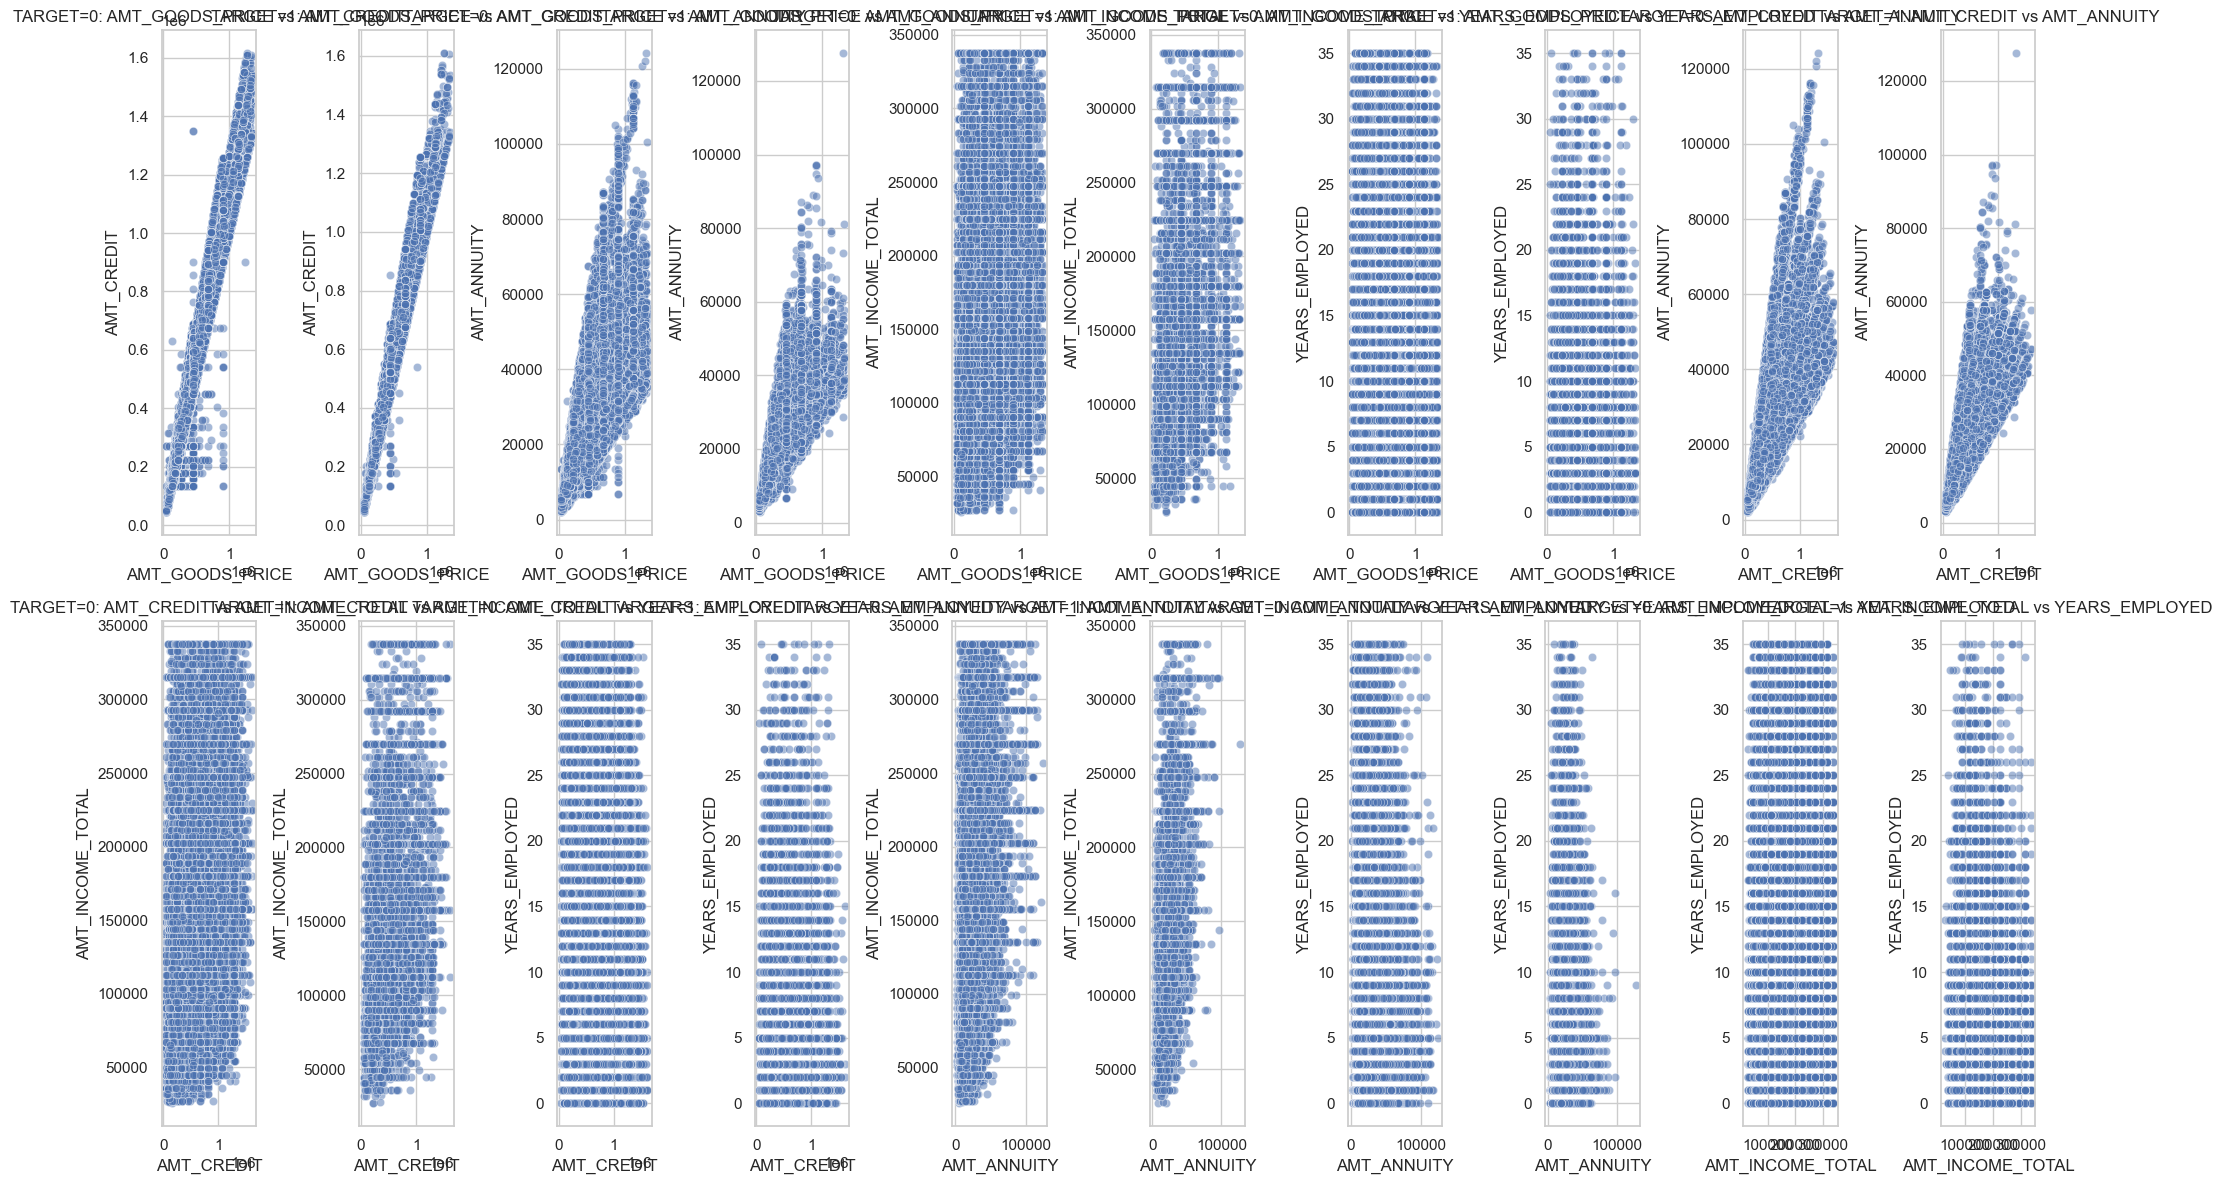

In [81]:
# Define the variables you want to plot
variables_to_plot = [
    'AMT_GOODS_PRICE',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_INCOME_TOTAL',
    'YEARS_EMPLOYED'
]

# Filter out rows with any NaN values in the variables of interest
clean_df = application_df.dropna(subset=variables_to_plot)

# Calculate the number of rows and columns for the subplots
num_variables = len(variables_to_plot)
num_rows = 2
num_cols = num_variables * (num_variables - 1) // 2

# Set up the matplotlib figure with improved figure size
fig, axes = plt.subplots(nrows=2, ncols=num_cols, figsize=(20, 12))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over each pair of variables and create a subplot for each TARGET value
plot_idx = 0
for i in range(len(variables_to_plot)):
    for j in range(i + 1, len(variables_to_plot)):
        # Plot for TARGET = 0
        sns.scatterplot(ax=axes[plot_idx], data=clean_df[clean_df['TARGET'] == 0],
                        x=variables_to_plot[i], y=variables_to_plot[j], alpha=0.5)
        axes[plot_idx].set_title(f'TARGET=0: {variables_to_plot[i]} vs {variables_to_plot[j]}')
        plot_idx += 1

        # Plot for TARGET = 1
        sns.scatterplot(ax=axes[plot_idx], data=clean_df[clean_df['TARGET'] == 1],
                        x=variables_to_plot[i], y=variables_to_plot[j], alpha=0.5)
        axes[plot_idx].set_title(f'TARGET=1: {variables_to_plot[i]} vs {variables_to_plot[j]}')
        plot_idx += 1

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()


- **AMT_GOODS_PRICE vs AMT_CREDIT:** There is a strong positive linear correlation between the goods price and the credit amount for both groups (those with payment difficulties and on-time payments). This is expected as the amount of credit is often directly tied to the price of the goods for which the credit is taken.

- **AMT_GOODS_PRICE vs AMT_ANNUITY:** There appears to be a positive correlation between the goods price and the annuity amount, indicating that as the price of the goods increases, the annuity payments also increase. This relationship seems consistent for both groups.

- **AMT_GOODS_PRICE vs AMT_INCOME_TOTAL:** The plot does not indicate a clear relationship between the goods price and the total income. This suggests that the price of goods financed through credit does not necessarily increase with the client's income.

- **AMT_CREDIT vs YEARS_EMPLOYED:** For clients with on-time payments, there's a cluster of clients with a high amount of credit and a lower range of employment days, possibly indicating that those with higher credit amounts are not necessarily those with a long employment history. For clients with payment difficulties, the scatter is more dispersed, but still no clear correlation is observed.

- **AMT_ANNUITY vs YEARS_EMPLOYED:** Similar to the AMT_CREDIT vs DAYS_EMPLOYED plot, there doesn't appear to be a clear correlation between annuity amounts and days employed for either group.

- **AMT_ANNUITY vs AMT_INCOME_TOTAL:** There's no clear correlation shown in the plots between annuity amounts and total income, indicating that the annuity payment does not increase proportionally with the client's income for both groups.

- **DAYS_EMPLOYED vs AMT_INCOME_TOTAL:** The plots do not reveal a clear relationship between the number of days employed and the total income. For clients with payment difficulties, there's a wide spread of income levels across the range of employment days. For clients with on-time payments, the distribution seems to be denser for lower days employed, indicating that a large number of these clients have been employed for a shorter period, yet they manage their credit well.

- **AMT_CREDIT vs DAYS_BIRTH:** There is no observable correlation between the age of the client (in days) and the amount of credit they receive for both groups.

- **AMT_ANNUITY vs AMT_GOODS_PRICE:** Again, there is a strong positive correlation between the annuity and the goods price, which is similar to the AMT_GOODS_PRICE vs AMT_CREDIT plot, as both the credit amount and the annuity payments are likely to be linked to the price of the goods.


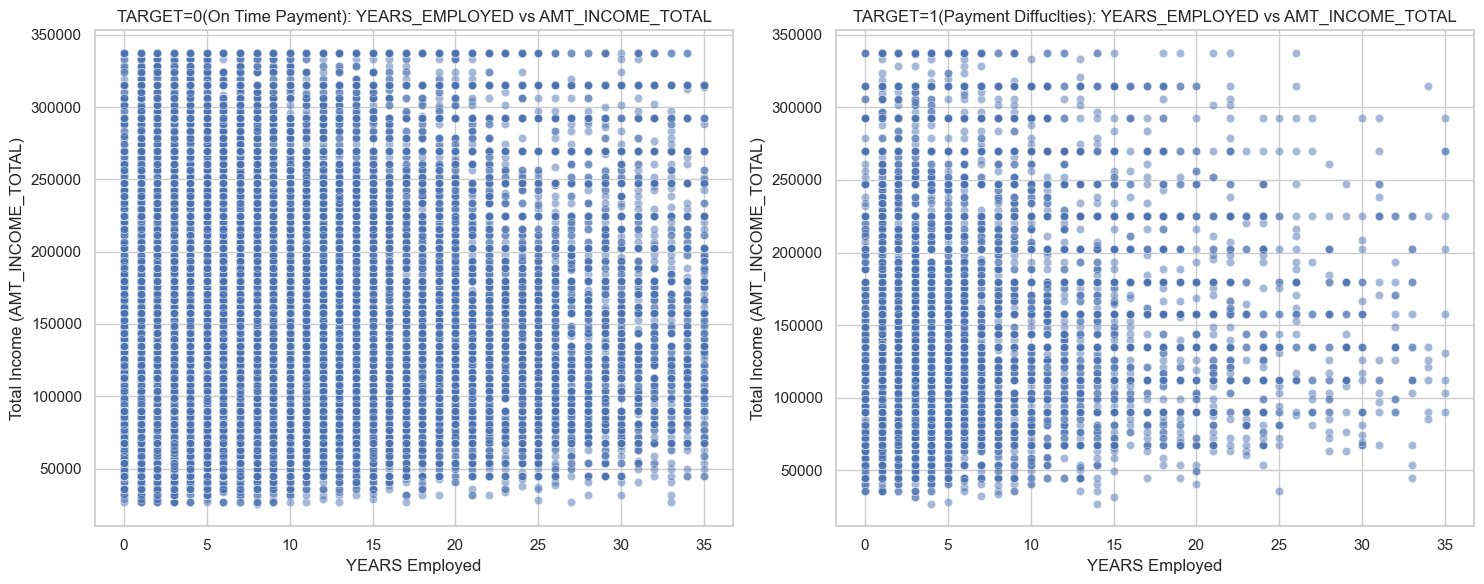

In [82]:
# Correcting the plot to show 'DAYS_EMPLOYED' vs 'AMT_INCOME_TOTAL', separated by target value

# Set up the matplotlib figure with a suitable size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot for TARGET = 0
sns.scatterplot(ax=axes[0], data=application_df[application_df['TARGET'] == 0],
                x='YEARS_EMPLOYED', y='AMT_INCOME_TOTAL', alpha=0.5)
axes[0].set_title('TARGET=0(On Time Payment): YEARS_EMPLOYED vs AMT_INCOME_TOTAL')
axes[0].set_xlabel('YEARS Employed')
axes[0].set_ylabel('Total Income (AMT_INCOME_TOTAL)')

# Plot for TARGET = 1
sns.scatterplot(ax=axes[1], data=application_df[application_df['TARGET'] == 1],
                x='YEARS_EMPLOYED', y='AMT_INCOME_TOTAL', alpha=0.5)
axes[1].set_title('TARGET=1(Payment Diffuclties): YEARS_EMPLOYED vs AMT_INCOME_TOTAL')
axes[1].set_xlabel('YEARS Employed')
axes[1].set_ylabel('Total Income (AMT_INCOME_TOTAL)')

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()


## Data Analysis of <code>Previous_application</code> 

In [83]:
prvs_null_df = previous_application.isnull().mean()*100
prvs_null_df.sort_values(ascending=False).head(20)


RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
NAME_YIELD_GROUP              0.000000
NAME_PORTFOLIO                0.000000
NAME_SELLER_INDUSTRY          0.000000
SELLERPLACE_AREA              0.000000
dtype: float64

In [84]:
#--identify and drop columns with lots of null values

cols_prv = (previous_application.isnull().mean()*100 >40)[previous_application.isnull().mean()*100>40].index.tolist()

#columns to drop
cols_prv

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [85]:
previous_application.drop(columns=cols_prv,inplace=True)

In [86]:
(previous_application.isnull().mean()*100).sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

### Outlier Analysis in <code>'previous_application'</code> dataset 

In [87]:
previous_application = remove_outliers(previous_application, 'AMT_CREDIT')
previous_application = remove_outliers(previous_application, 'AMT_GOODS_PRICE')
previous_application = remove_outliers(previous_application, 'AMT_ANNUITY')
previous_application = remove_outliers(previous_application, 'AMT_APPLICATION')


In [88]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615              NaN   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans          NaN              NaN   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1         NaN              NaN                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  ...  NAME_CLIENT_TYPE  \
0                       15                           Y  ...          Repeater   
1                       11                           Y  ...          Repeater   
2                       11                           Y  ...          Repeater   
3                        7                           Y  ...          Repeater   
4                        9                           Y  ...          Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO  NAME_PRODUCT_TYPE  \
0              Mobile            POS                XNA   
1                 XNA           Cash             x-sell   
2                 XNA           Cash             x-sell   
3                 XNA           Cash             x-sell   
4                 XNA           Cash            walk-in   

              CHANNEL_TYPE SELLERPLACE_AREA NAME_SELLER_INDUSTRY CNT_PAYMENT  \
0             Country-wide               35         Connectivity        12.0   
1           Contact center               -1                  XNA        36.0   
2  Credit and cash offices               -1                  XNA        12.0   
3  Credit and cash offices               -1                  XNA        12.0   
4  Credit and cash offices               -1                  XNA        24.0   

  NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0           middle  POS mobile with interest  
1       low_action          Cash X-Sell: low  
2             high         Cash X-Sell: high  
3           middle       Cash X-Sell: middle  
4             high         Cash Street: high  

[5 rows x 26 columns]

### <code>'NAME_CONTRACT_STATUS'</code> analysis

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

1. **Approved:** The Company has approved the loan application.

2. **Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, they received worse pricing which they did not want.

3. **Refused:** The company had rejected the loan (because the client does not meet their requirements, etc.).

4. **Unused offer:** The loan has been cancelled by the client but on different stages of the process.


In [89]:
# Let's perform an analysis on the 'NAME_CONTRACT_STATUS' column to understand the distribution of different decisions.
contract_status_counts = previous_application['NAME_CONTRACT_STATUS'].value_counts()

# Calculate the percentage of each type of decision
contract_status_percentage = contract_status_counts / contract_status_counts.sum() * 100

# Prepare the data for visualization
contract_status_df = pd.DataFrame({
    'Status': contract_status_counts.index,
    'Counts': contract_status_counts.values,
    'Percentage': contract_status_percentage.values
})

contract_status_df

Status   Counts  Percentage
0      Approved  1036781   62.074740
1      Canceled   316319   18.938831
2       Refused   290678   17.403638
3  Unused offer    26436    1.582791

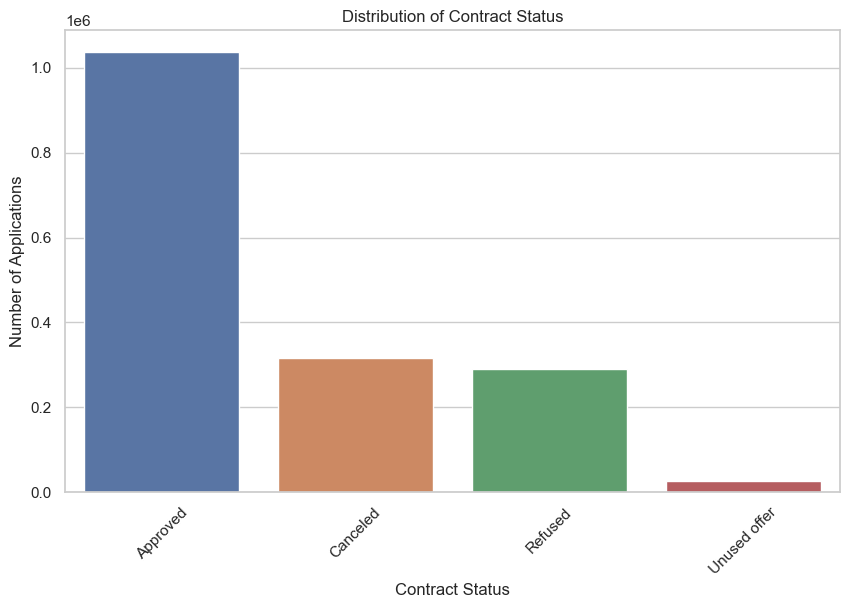

In [90]:
# Create a histogram for the 'NAME_CONTRACT_STATUS'
plt.figure(figsize=(10, 6))
sns.barplot(x='Status', y='Counts', data=contract_status_df)
plt.title('Distribution of Contract Status')
plt.xlabel('Contract Status')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.show()

<p>Most of the applications were approved, indicating that a majority of the clients met the company's requirements for a loan. The refusal rate and cancellation rate are lower, with the unused offers being the least frequent outcome.</p>

<p>This distribution provides insights into the credit decisioning process of the company, and potentially the risk appetite or the quality of the applicant pool. It can also reflect on the company's credit policy and the effectiveness of its marketing and product design if a significant number of offers go unused</p>

### The <code>NAME_CLIENT_TYPE</code> variable:

This indicates the type of client in terms of their relationship with the financial institution at the time of the previous application. The analysis reveals the following distribution:

In [91]:
# Analyze the 'NAME_CLIENT_TYPE' column to understand the distribution of different client types

# Count the occurrences of each type of client
client_type_counts = previous_application['NAME_CLIENT_TYPE'].value_counts()

# Calculate the percentage of each type of client
client_type_percentage = client_type_counts / client_type_counts.sum() * 100

# Prepare the data for visualization
client_type_df = pd.DataFrame({
    'Client Type': client_type_counts.index,
    'Counts': client_type_counts.values,
    'Percentage': client_type_percentage.values
})

client_type_df


Client Type   Counts  Percentage
0    Repeater  1231261   73.718757
1         New   301363   18.043376
2   Refreshed   135649    8.121654
3         XNA     1941    0.116213

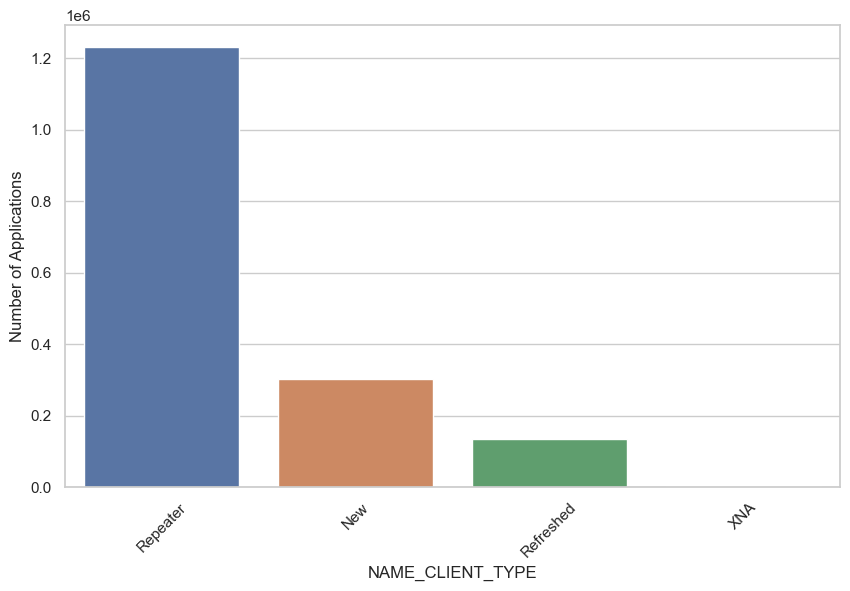

In [92]:
# Create a histogram for the 'NAME_CLIENT_TYPE'
plt.figure(figsize=(10, 6))
sns.barplot(x='Client Type', y='Counts', data=client_type_df)
# plt.title('Distribution of Contract Status')
plt.xlabel('NAME_CLIENT_TYPE')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.show()

The majority of the previous applications were made by "Repeaters", suggesting these are clients who have previously had some form of relationship or interaction with the financial institution. New clients account for a significant minority, while refreshed clients and XNA (unspecified) are far less common.

In [93]:
# Separating numerical and non-numerical (categorical/other) variables in the dataframe
prev_numerical_vars = previous_application.select_dtypes(include=['number']).columns.tolist()
prev_non_numerical_vars = previous_application.select_dtypes(exclude=['number']).columns.tolist()

In [94]:
prev_numerical_vars

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT']

In [95]:
prev_non_numerical_vars

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

## Merge both of the data sets based on <code>'SK_ID_CURR'</code> and added suffixes to columns that appear in both data sets

In [96]:
# Merging the datasets on "SK_ID_CURR" with suffixes to handle columns with the same name in both datasets
merged_df = pd.merge(application_df, previous_application, on="SK_ID_CURR", how="inner", suffixes=('_app', '_prev'))
merged_df.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_app CODE_GENDER  CNT_CHILDREN  \
0      100002       1             Cash loans           M             0   
1      100003       0             Cash loans           F             0   
2      100003       0             Cash loans           F             0   
3      100003       0             Cash loans           F             0   
4      100004       0        Revolving loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_app  AMT_ANNUITY_app  AMT_GOODS_PRICE_app  \
0          202500.0        406597.5          24700.5             351000.0   
1          270000.0       1293502.5          35698.5            1129500.0   
2          270000.0       1293502.5          35698.5            1129500.0   
3          270000.0       1293502.5          35698.5            1129500.0   
4           67500.0        135000.0           6750.0             135000.0   

  NAME_TYPE_SUITE  ... NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0   Unaccompanied  ...              New              Vehicles            POS   
1          Family  ...         Repeater                   XNA           Cash   
2          Family  ...        Refreshed             Furniture            POS   
3          Family  ...        Refreshed  Consumer Electronics            POS   
4   Unaccompanied  ...              New                Mobile            POS   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0               XNA                    Stone               500   
1            x-sell  Credit and cash offices                -1   
2               XNA                    Stone              1400   
3               XNA             Country-wide               200   
4               XNA         Regional / Local                30   

   NAME_SELLER_INDUSTRY CNT_PAYMENT  NAME_YIELD_GROUP  \
0       Auto technology        24.0        low_normal   
1                   XNA        12.0        low_normal   
2             Furniture         6.0            middle   
3  Consumer electronics        12.0            middle   
4          Connectivity         4.0            middle   

           PRODUCT_COMBINATION  
0      POS other with interest  
1             Cash X-Sell: low  
2   POS industry with interest  
3  POS household with interest  
4  POS mobile without interest  

[5 rows x 51 columns]

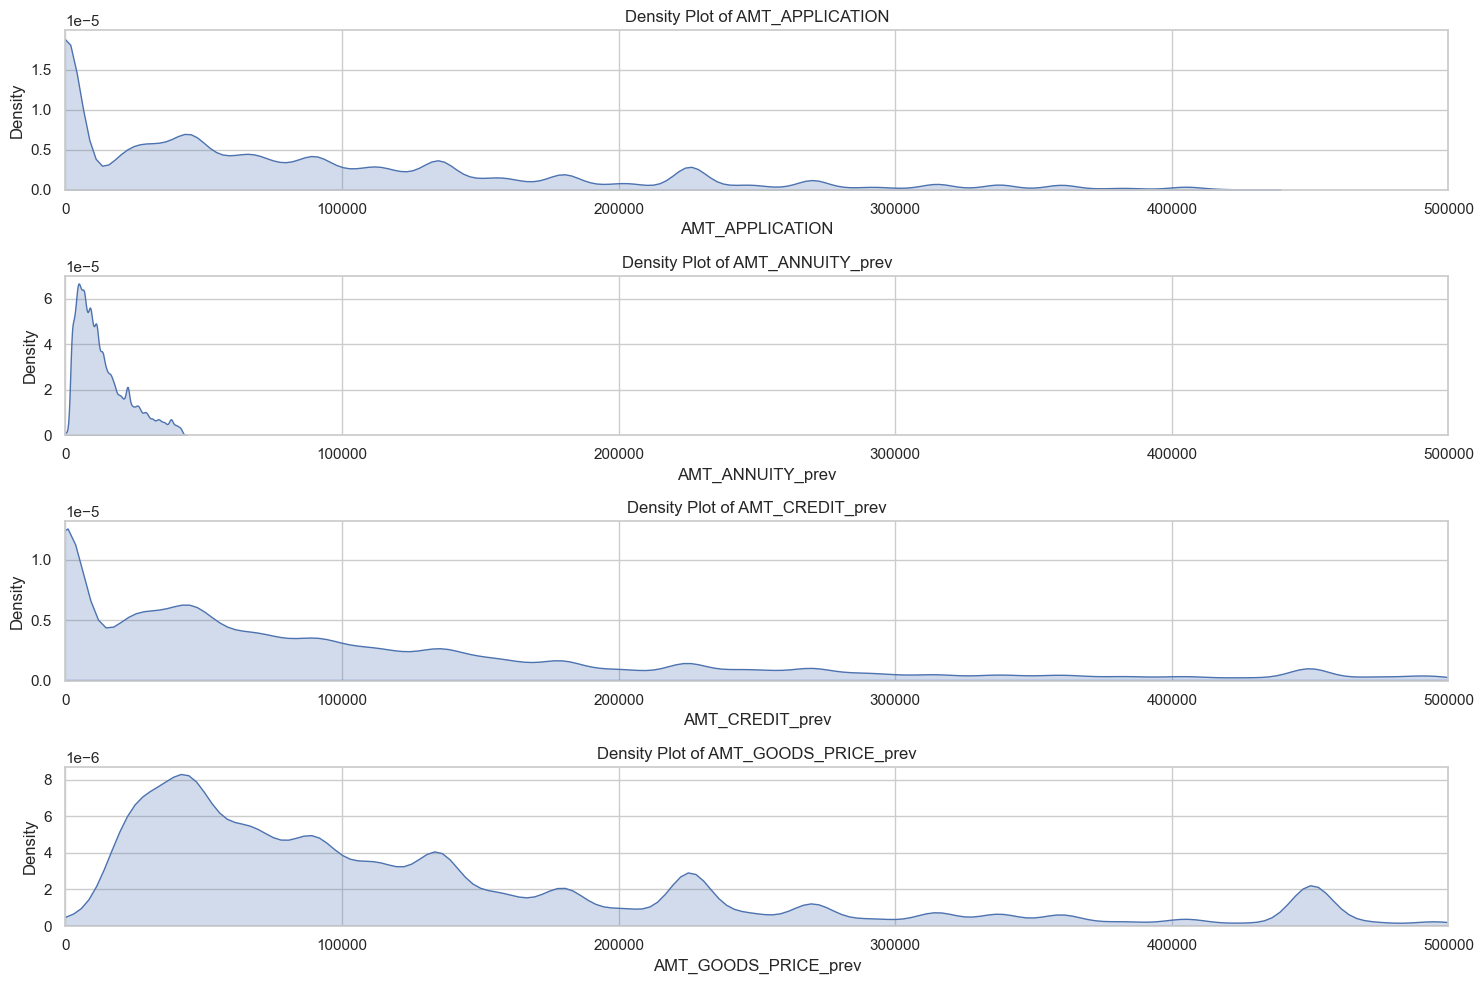

In [97]:
# Plotting the density of selected variables from the merged dataset
selected_vars = ['AMT_APPLICATION', 'AMT_ANNUITY_prev', 'AMT_CREDIT_prev', 'AMT_GOODS_PRICE_prev']

plt.figure(figsize=(15, 10))

for i, var in enumerate(selected_vars):
    plt.subplot(len(selected_vars), 1, i + 1)
    sns.kdeplot(merged_df[var], fill=True)
    plt.title(f'Density Plot of {var}')
    plt.xlabel(var)
    plt.xlim(-100, 500000)  # Setting x-axis limit to zoom in

    plt.ylabel('Density')

plt.tight_layout()
plt.show()


**AMT_APPLICATION:** The density is high at lower application amounts, suggesting that a majority of the clients in the dataset apply for smaller loan amounts. The distribution tails off as the amount increases, indicating that fewer applications are made for higher loan amounts.

**AMT_ANNUITY_prev:** Similar to the application amounts, the annuity amounts have a high density at the lower end. This suggests that most previous loans had lower annuity payments, which often correlates with smaller loan amounts or shorter loan terms.

**AMT_CREDIT_prev:** The distribution of the previous credit amounts shows a similar trend to the application and annuity amounts, with a peak at the lower end that decreases for higher credit amounts. This indicates that loans of smaller amounts are more commonly approved.

**AMT_GOODS_PRICE_prev:** The density of goods prices is also higher at the lower end, implying that the goods being financed (like homes, cars, or consumer appliances) are generally of lower value, which is consistent with the trends observed in the other variables.

Across all variables, the density decreases as the value increases, which is typical in financial datasets where a large number of clients apply for, and receive, smaller loan amounts, while high-value loans are less common.


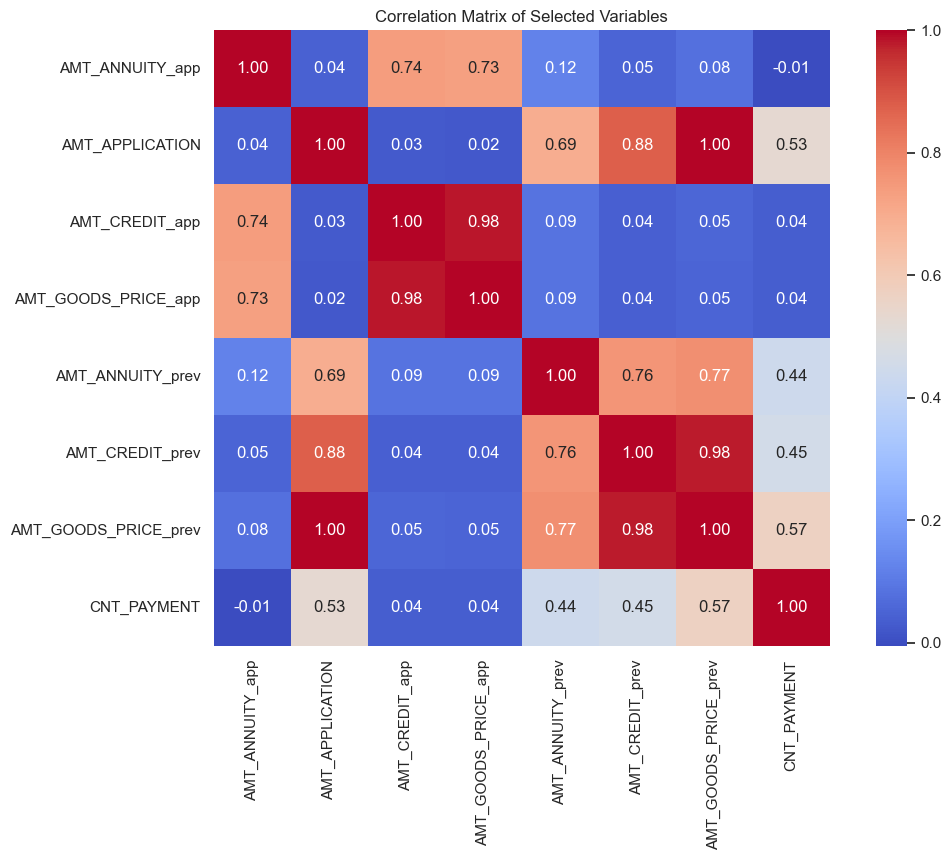

In [98]:
correlation_vars = [
    'AMT_ANNUITY_app', 'AMT_APPLICATION', 'AMT_CREDIT_app', 'AMT_GOODS_PRICE_app',
    'AMT_ANNUITY_prev', 'AMT_CREDIT_prev', 'AMT_GOODS_PRICE_prev', 'CNT_PAYMENT'
]

# Creating the correlation matrix
corr_matrix = merged_df[correlation_vars].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Selected Variables')
plt.show()

**AMT_ANNUITY_prev and AMT_APPLICATION:** There is a strong positive correlation (0.81), indicating that clients who previously had higher annuity payments tend to apply for larger amounts in new applications.

**AMT_CREDIT_prev and AMT_GOODS_PRICE_prev:** The correlation is extremely high (0.99), showing that the previously approved credit amounts are very closely related to the prices of the goods for which the credit was taken, which is consistent with lending practices where the loan amount is based on the value of the goods.

**AMT_APPLICATION and AMT_CREDIT_prev:** There is a moderate positive correlation (0.82), suggesting that clients who apply for higher amounts in new applications may have had higher credit amounts approved in their previous applications.

**AMT_APPLICATION and AMT_GOODS_PRICE_prev:** A moderate correlation (0.82) here indicates that applicants who are applying for higher amounts now had previously applied for financing more expensive goods.

**CNT_PAYMENT and AMT_ANNUITY_prev:** The correlation is moderate (0.40). This could suggest that clients with a higher number of payments in their previous credit agreements tend to have higher annuity payments.

From these observations, it seems there's a pattern of continuity in borrowing behavior; clients with higher previous loan amounts, costs of goods, and annuities are likely to apply for higher amounts in their new applications. Financial institutions might interpret this as a sign of customer confidence in their ability to handle larger debts or a reflection of their financial needs and creditworthiness increasing over time.


## Bivariate/Multivariate analysis with <code>'NAME_CLIENT_TYPE'</code>

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_bar_plot_single(df, category, hue=None, title_prefix=''):
    plt.figure(figsize=(14, 6))
    
    sns.countplot(x=df[category], hue=hue,data=df)
    plt.title(f'{title_prefix} Bar Plot')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

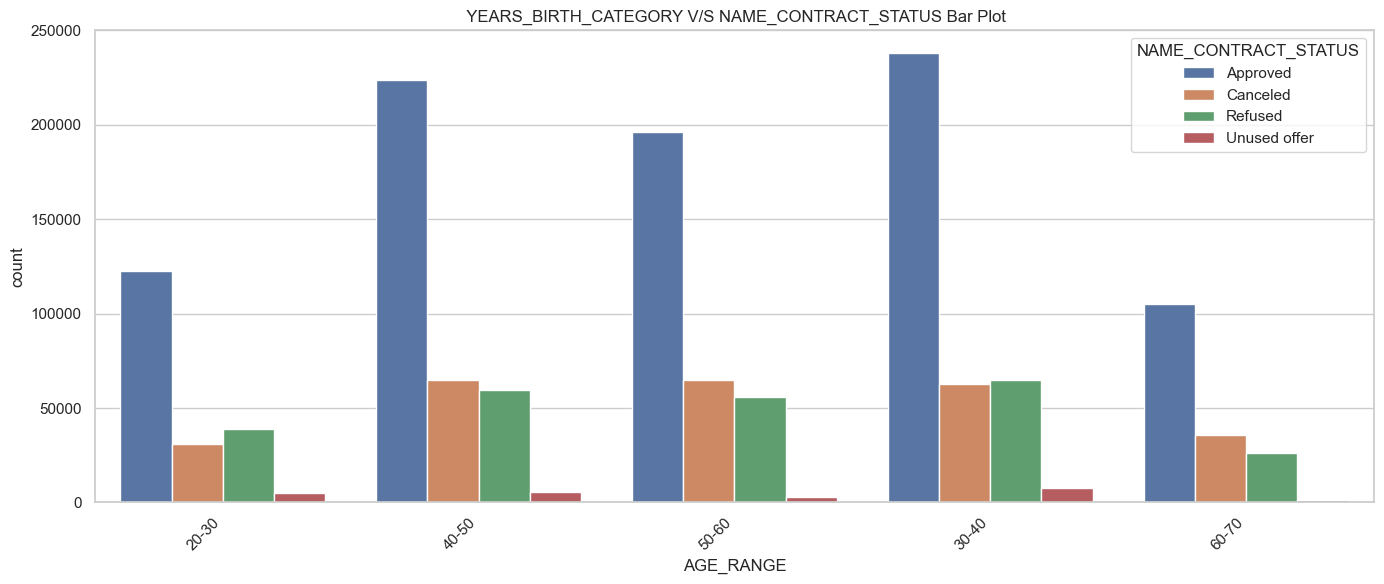

In [100]:
create_bar_plot_single(merged_df, 'AGE_RANGE', hue='NAME_CONTRACT_STATUS', title_prefix=' YEARS_BIRTH_CATEGORY V/S NAME_CONTRACT_STATUS')

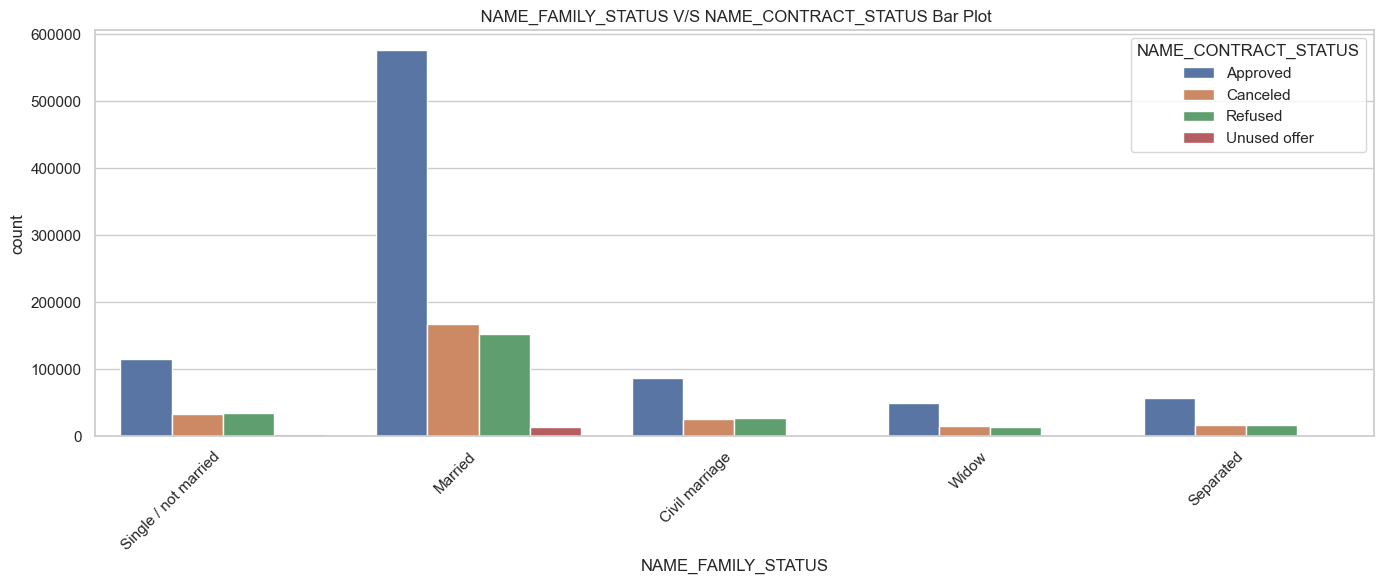

In [101]:
create_bar_plot_single(merged_df, 'NAME_FAMILY_STATUS', hue='NAME_CONTRACT_STATUS', title_prefix=' NAME_FAMILY_STATUS V/S NAME_CONTRACT_STATUS')

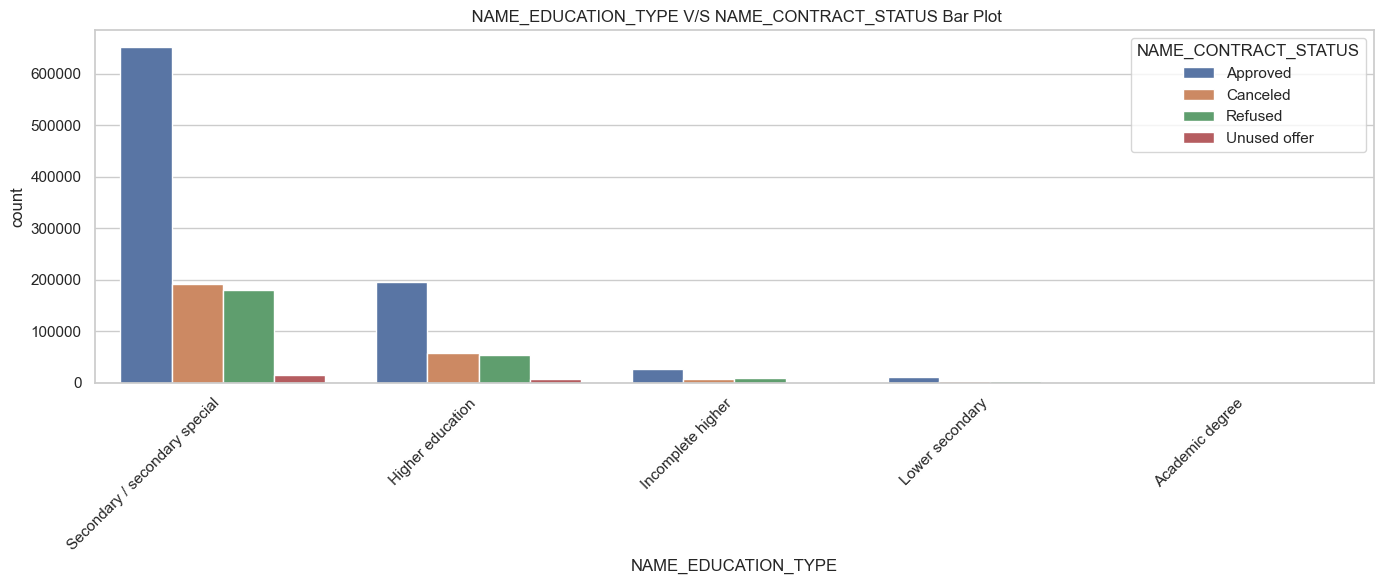

In [102]:
create_bar_plot_single(merged_df, 'NAME_EDUCATION_TYPE', hue='NAME_CONTRACT_STATUS', title_prefix=' NAME_EDUCATION_TYPE V/S NAME_CONTRACT_STATUS')

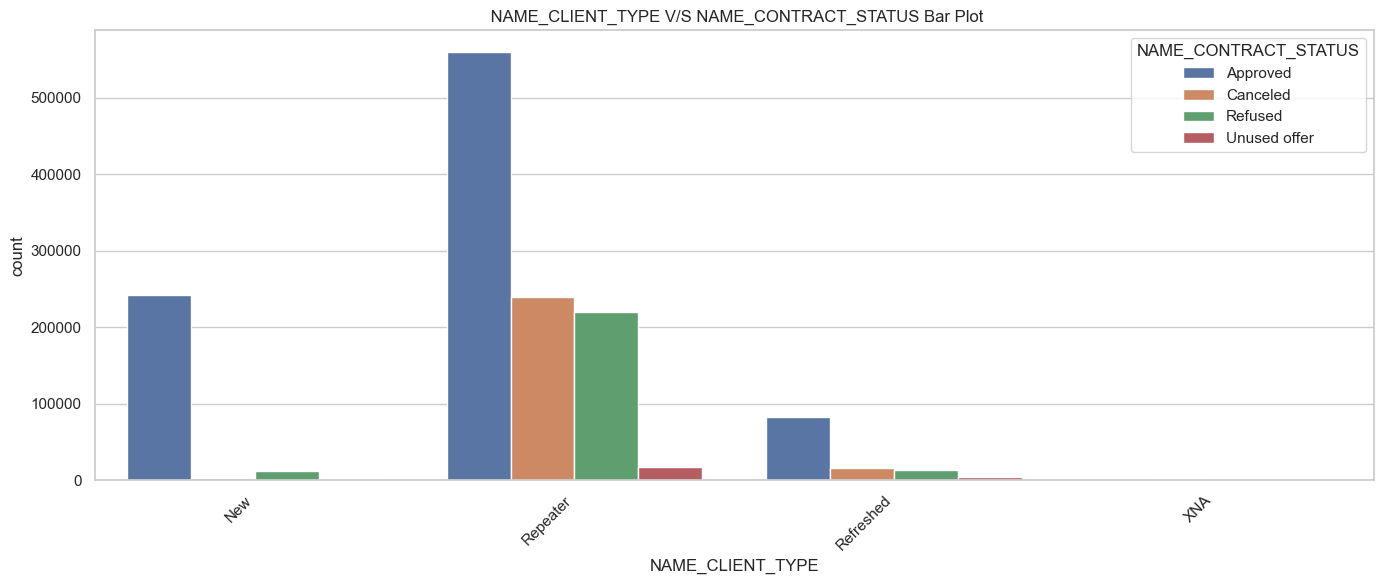

In [103]:
create_bar_plot_single(merged_df, 'NAME_CLIENT_TYPE', hue='NAME_CONTRACT_STATUS', title_prefix=' NAME_CLIENT_TYPE V/S NAME_CONTRACT_STATUS')

## Bivariate/Multivariate analysis : Continuous V/S Categorical variables

NAME_CONTRACT_STATUS' & 'NAME_CLIENT_TYPE'   V/S 'AMT_CREDIT_prev'& 'AMT_ANNUITY_prev' & 'AMT_GOODS_PRICE_prev' V/S 'CODE_GENDER'

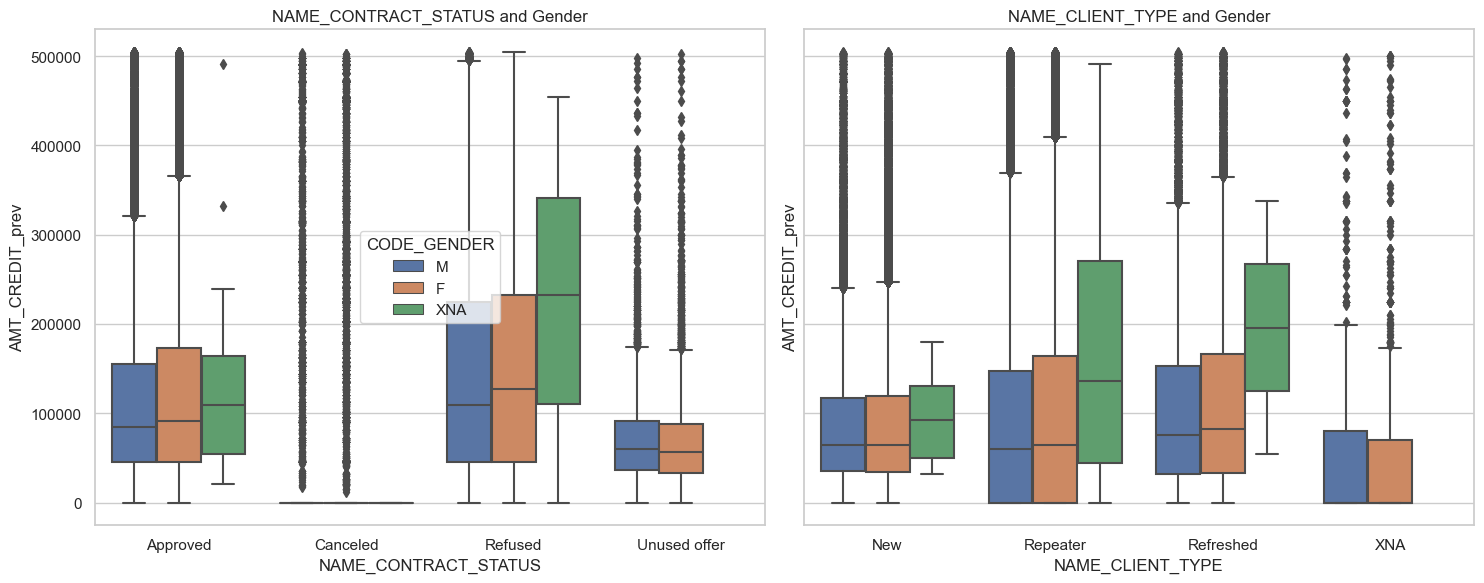

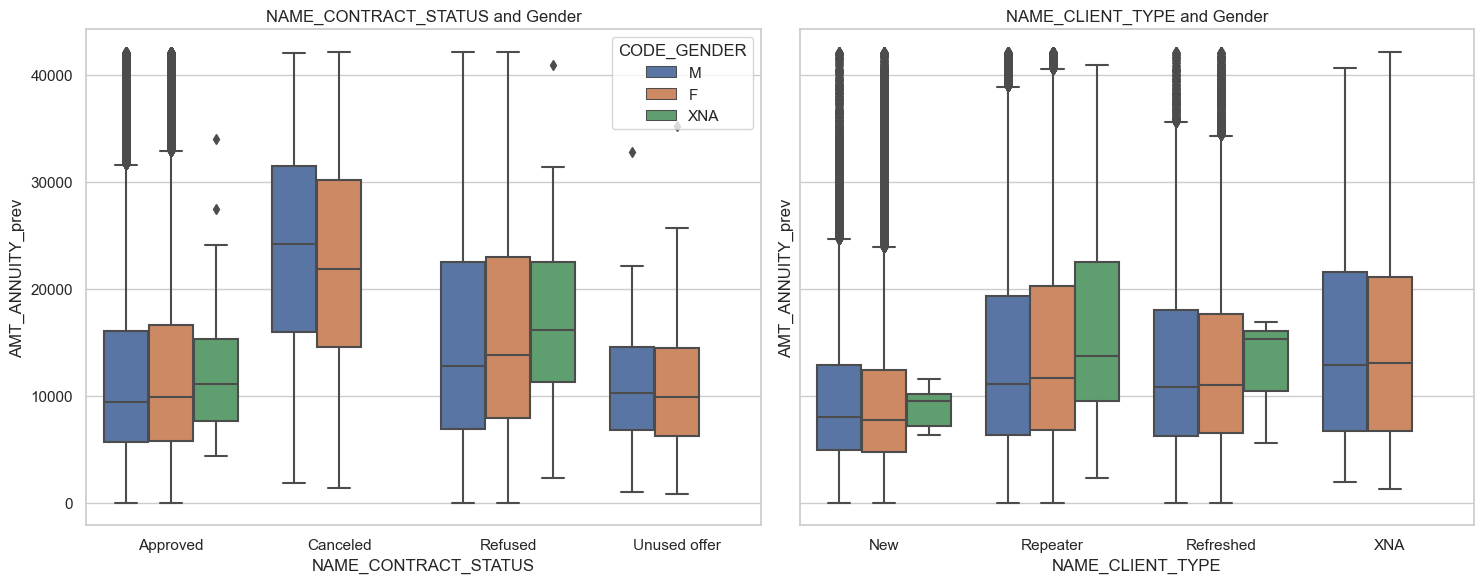

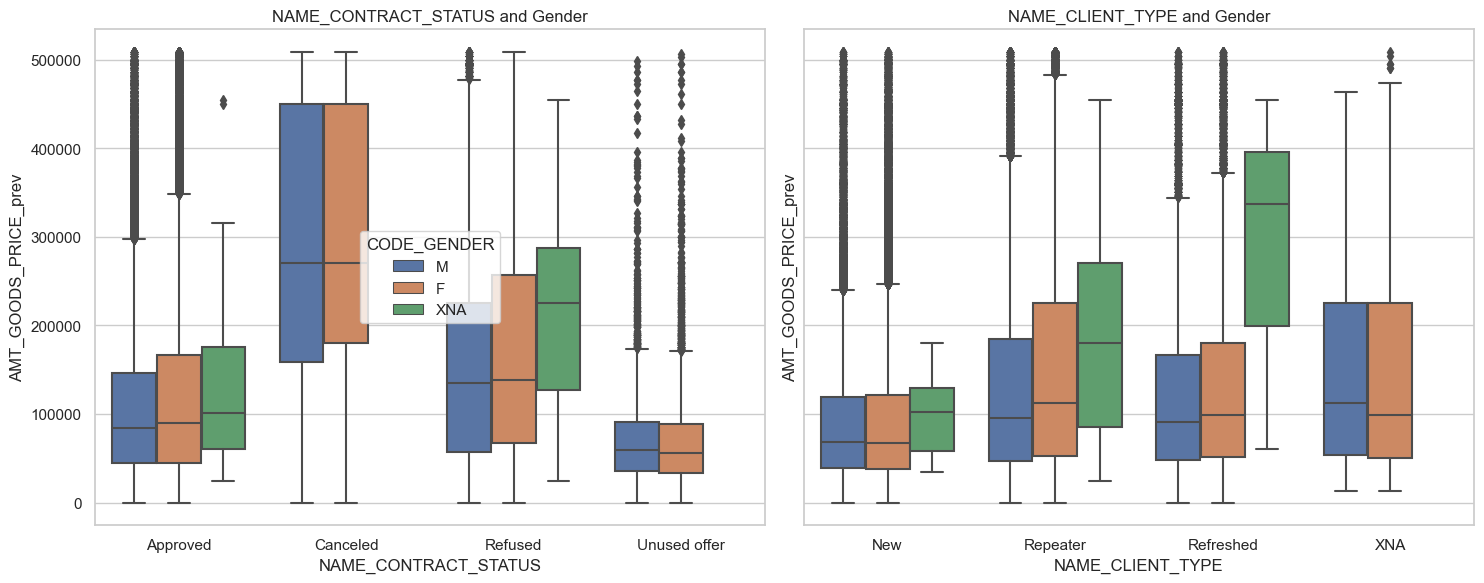

In [104]:
# Define the categorical variables for the analysis
merged_categorical_vars = [
    'NAME_CONTRACT_STATUS', 
    'NAME_CLIENT_TYPE'
]

# Plot settings
sns.set(style="whitegrid")

# Create subplots for each categorical variable
fig, axes = plt.subplots(1, len(merged_categorical_vars), figsize=(15, 6), sharey=True)

# Create a boxplot for each categorical variable
for i, var in enumerate(merged_categorical_vars):
    sns.boxplot(x=var, y='AMT_CREDIT_prev', hue='CODE_GENDER', data=merged_df, ax=axes[i])
    axes[i].set_title(f'{var} and Gender')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('AMT_CREDIT_prev')
    if i > 0:  # Remove the legend for all but the first subplot
        axes[i].get_legend().remove()

# Show the legend only on the first subplot
# axes[0].legend(title='Gender')

# Adjust the layout to make sure everything fits without overlapping
plt.tight_layout()
plt.show()

# Plot settings
sns.set(style="whitegrid")

# Create subplots for each categorical variable
fig, axes = plt.subplots(1, len(merged_categorical_vars), figsize=(15, 6), sharey=True)

# Create a boxplot for each categorical variable
for i, var in enumerate(merged_categorical_vars):
    sns.boxplot(x=var, y='AMT_ANNUITY_prev', hue='CODE_GENDER', data=merged_df, ax=axes[i])
    axes[i].set_title(f'{var} and Gender')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('AMT_ANNUITY_prev')
    if i > 0:  # Remove the legend for all but the first subplot
        axes[i].get_legend().remove()

# Show the legend only on the first subplot
# axes[0].legend(title='Gender')

# Adjust the layout to make sure everything fits without overlapping
plt.tight_layout()
plt.show()

# Plot settings
sns.set(style="whitegrid")

# Create subplots for each categorical variable
fig, axes = plt.subplots(1, len(merged_categorical_vars), figsize=(15, 6), sharey=True)

# Create a boxplot for each categorical variable
for i, var in enumerate(merged_categorical_vars):
    sns.boxplot(x=var, y='AMT_GOODS_PRICE_prev', hue='CODE_GENDER', data=merged_df, ax=axes[i])
    axes[i].set_title(f'{var} and Gender')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('AMT_GOODS_PRICE_prev')
    if i > 0:  # Remove the legend for all but the first subplot
        axes[i].get_legend().remove()

# Show the legend only on the first subplot
# axes[0].legend(title='Gender')

# Adjust the layout to make sure everything fits without overlapping
plt.tight_layout()
plt.show()

**AMT_GOODS_PRICE_prev:**

- The median goods price across all contract statuses and client types is generally higher for males than females, with the exception of the 'XNA' category.
- The 'Approved' contracts have the highest median goods price, which suggests that higher-valued goods are more likely to get approved.
- The 'Unused offer' and 'Refused' categories have a lower median goods price, indicating that lower-valued goods may not proceed to contract finalization or may be refused more often.

**AMT_CREDIT_prev:**

- Similar to 'AMT_GOODS_PRICE_prev', the median credit amount is higher for 'Approved' contracts, with males typically receiving higher amounts.
- The distribution of credit amounts for 'Canceled' contracts is notably lower, which could indicate that these contracts are canceled before reaching higher credit amounts.
- There is a significant number of outliers in the 'Approved' category, suggesting some approved credits are much higher than the median.

**AMT_ANNUITY_prev:**

- The annuity amounts for 'Approved' contracts are generally higher than for other statuses, aligning with the trend observed for goods price and credit amount.
- The distribution of annuity amounts is more compressed for 'Refused' and 'Unused offer' statuses, which may reflect a more consistent approach to the annuity amounts set for these categories, or it could be an artifact of the smaller number of contracts that reach this stage.
- As with credit amounts, there is a wide range of annuity amounts for 'Approved' contracts, which may reflect the variation in repayment terms and conditions.

**Gender Differences:**

- Across all three financial variables, the distribution for males tends to show higher medians and wider interquartile ranges than for females, indicating that males are generally associated with higher amounts in terms of goods, credit, and annuity.

**Contract Status and Client Type:**

- The distribution of amounts varies significantly with contract status and client type, with 'Approved' contracts and 'New' client types showing higher amounts in general.



NAME_CONTRACT_STATUS' & 'NAME_CLIENT_TYPE'   V/S 'AMT_CREDIT_prev'& 'AMT_ANNUITY_prev' & 'AMT_GOODS_PRICE_prev' V/S 'NAME_CONTRACT_STATUS'

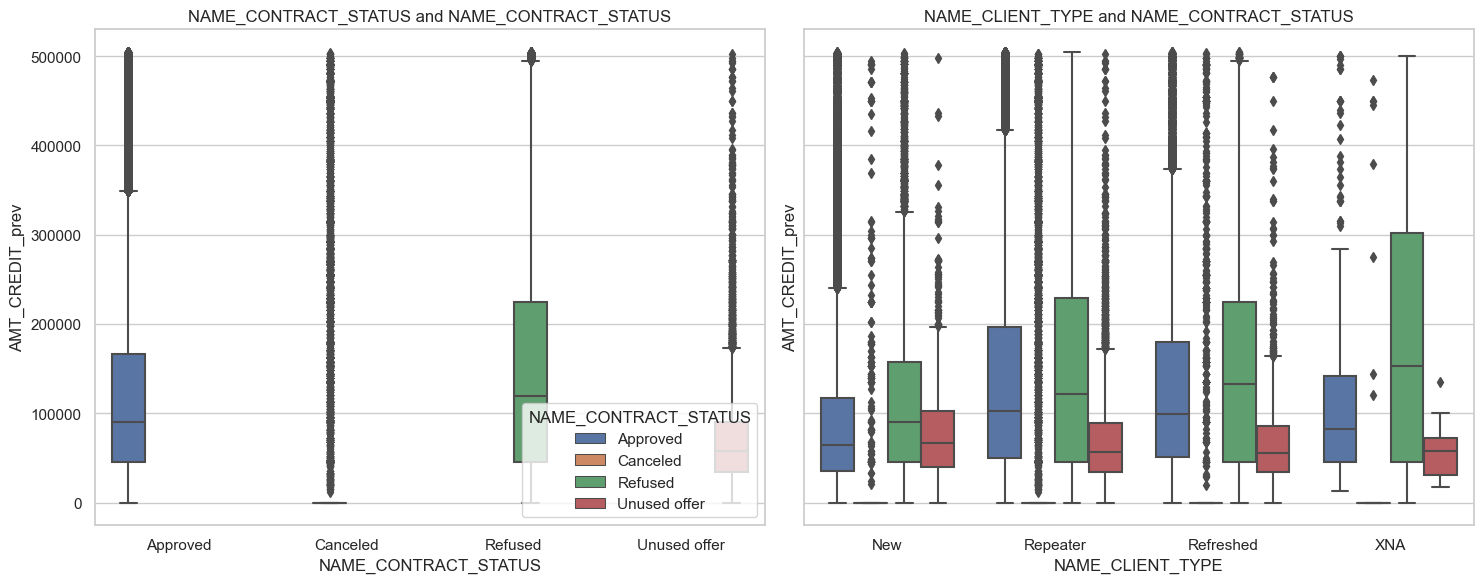

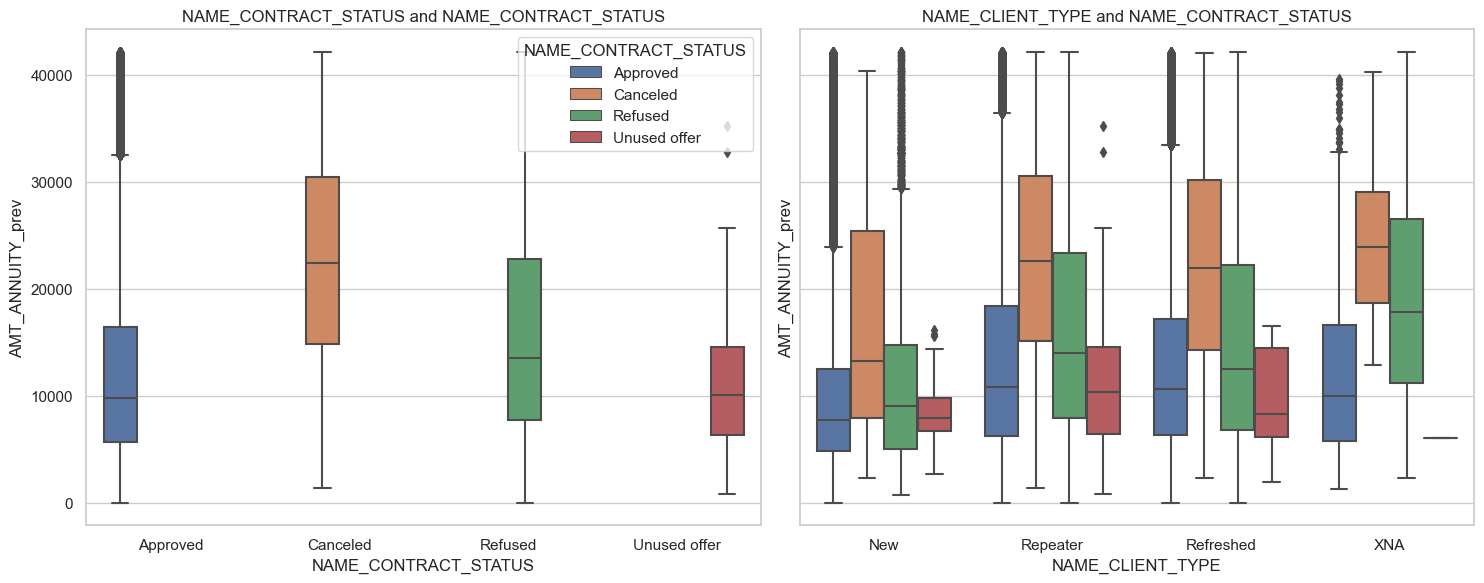

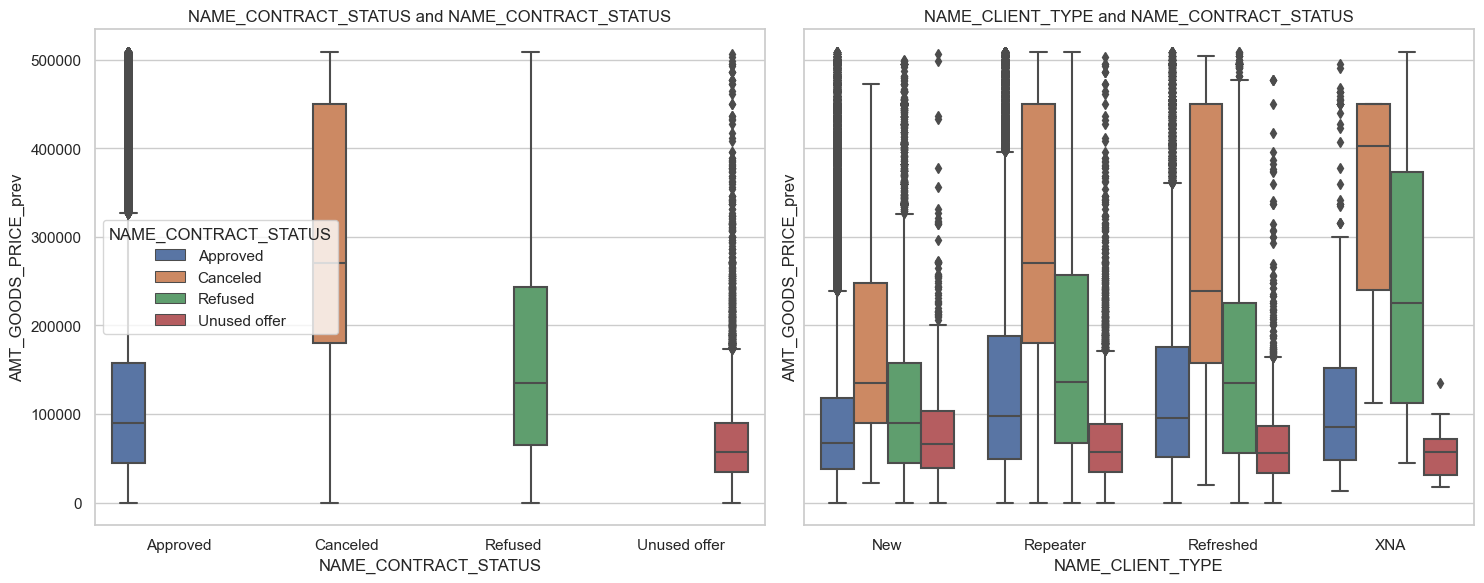

In [105]:
# Plot settings
sns.set(style="whitegrid")

# Create subplots for each categorical variable
fig, axes = plt.subplots(1, len(merged_categorical_vars), figsize=(15, 6), sharey=True)

# Create a boxplot for each categorical variable
for i, var in enumerate(merged_categorical_vars):
    sns.boxplot(x=var, y='AMT_CREDIT_prev', hue='NAME_CONTRACT_STATUS', data=merged_df, ax=axes[i])
    axes[i].set_title(f'{var} and NAME_CONTRACT_STATUS')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('AMT_CREDIT_prev')
    if i > 0:  # Remove the legend for all but the first subplot
        axes[i].get_legend().remove()

# Show the legend only on the first subplot
# axes[0].legend(title='Gender')

# Adjust the layout to make sure everything fits without overlapping
plt.tight_layout()
plt.show()

# Plot settings
sns.set(style="whitegrid")

# Create subplots for each categorical variable
fig, axes = plt.subplots(1, len(merged_categorical_vars), figsize=(15, 6), sharey=True)

# Create a boxplot for each categorical variable
for i, var in enumerate(merged_categorical_vars):
    sns.boxplot(x=var, y='AMT_ANNUITY_prev', hue='NAME_CONTRACT_STATUS', data=merged_df, ax=axes[i])
    axes[i].set_title(f'{var} and NAME_CONTRACT_STATUS')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('AMT_ANNUITY_prev')
    if i > 0:  # Remove the legend for all but the first subplot
        axes[i].get_legend().remove()

# Show the legend only on the first subplot
# axes[0].legend(title='Gender')

# Adjust the layout to make sure everything fits without overlapping
plt.tight_layout()
plt.show()

# Plot settings
sns.set(style="whitegrid")

# Create subplots for each categorical variable
fig, axes = plt.subplots(1, len(merged_categorical_vars), figsize=(15, 6), sharey=True)

# Create a boxplot for each categorical variable
for i, var in enumerate(merged_categorical_vars):
    sns.boxplot(x=var, y='AMT_GOODS_PRICE_prev', hue='NAME_CONTRACT_STATUS', data=merged_df, ax=axes[i])
    axes[i].set_title(f'{var} and NAME_CONTRACT_STATUS')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('AMT_GOODS_PRICE_prev')
    if i > 0:  # Remove the legend for all but the first subplot
        axes[i].get_legend().remove()

# Show the legend only on the first subplot
# axes[0].legend(title='Gender')

# Adjust the layout to make sure everything fits without overlapping
plt.tight_layout()
plt.show()

**AMT_CREDIT_prev by Contract Status and Client Type:**

- For both contract status and client type, there's a significant range in the amount of credit previously granted, with a substantial number of outliers indicating exceptionally high credit amounts.
- 'Approved' contracts generally have higher median credit amounts than other statuses, suggesting that higher loans are more likely to be approved.
- New clients and Repeaters exhibit a wide range of credit amounts, with Repeaters showing a slightly higher median, suggesting they might be trusted with larger loans.

**AMT_ANNUITY_prev by Contract Status and Client Type:**

- The annuity amounts are highest for 'Approved' contracts, indicating that approved loans tend to have higher repayment amounts.
- New clients have a broader range of annuity amounts compared to Repeaters and those in the 'Refreshed' and 'XNA' categories.

**AMT_GOODS_PRICE_prev by Contract Status and Client Type:**

- As with credit amounts, the goods prices are highest for 'Approved' contracts.
- New clients tend to have a higher median goods price, possibly indicating that they apply for more expensive goods or are granted higher loan amounts for their purchases.

**Gender Differences:**

- Across all financial variables and categories, male clients tend to have higher median amounts than female clients, which could reflect differences in income, purchasing behavior, or loan terms offered to different genders.

**General Observations:**
- 'Canceled' and 'Unused offer' statuses have a noticeably lower median and fewer high-value outliers than 'Approved' and 'Refused' contracts.


## Building a Random Forest Classifier
---
**I think a Random Forest Classifier is perfect for this kind of data, in the end we'll really just have two classes, 0 will be clients that will be able to make a payment on time, and 1 will be clients that will not be able to make payments on time.**

---


**Clearly, we don't have enough data here for Target 1 clients to perform an accurate prediction, we need to do something in order to figure out how make a better prediction. I think what I want to do is the following: <br>**

- **I will essentially add in synthetic data into the class 1 dataset to increase its size. First I will make a resampled subset of class 1 with replacement, then I will introduce variations i.e. noise into the subset based on the trends in the features in class 1 by interpolating, and then combine this interpolated subset with the original class 1. Then I'll down sample class 0 again just a bit to make the data more balanced, and this should improve the classifiers accuracy.**

---

In [106]:
# Grouping by target
ad_target = clean_df.groupby('TARGET')
ad_target.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0       100002       1         Cash loans           M             0   
1       100003       0         Cash loans           F             0   
2       100004       0    Revolving loans           M             0   
3       100006       0         Cash loans           F             0   
4       100007       0         Cash loans           M             0   
5       100008       0         Cash loans           M             0   
26      100031       1         Cash loans           F             0   
40      100047       1         Cash loans           M             0   
42      100049       1         Cash loans           F             0   
94      100112       1         Cash loans           M             0   

    AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           202500.0    406597.5      24700.5         351000.0   
1           270000.0   1293502.5      35698.5        1129500.0   
2            67500.0    135000.0       6750.0         135000.0   
3           135000.0    312682.5      29686.5         297000.0   
4           121500.0    513000.0      21865.5         513000.0   
5            99000.0    490495.5      27517.5         454500.0   
26          112500.0    979992.0      27076.5         702000.0   
40          202500.0   1193580.0      35028.0         855000.0   
42          135000.0    288873.0      16258.5         238500.0   
94          315000.0    953460.0      64107.0         900000.0   

    NAME_TYPE_SUITE  ... HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0     Unaccompanied  ...                      10  Business Entity Type 3   
1            Family  ...                      11                  School   
2     Unaccompanied  ...                       9              Government   
3     Unaccompanied  ...                      17  Business Entity Type 3   
4     Unaccompanied  ...                      11                Religion   
5   Spouse, partner  ...                      16                   Other   
26    Unaccompanied  ...                       9  Business Entity Type 3   
40    Unaccompanied  ...                       9  Business Entity Type 3   
42    Unaccompanied  ...                      11           Self-employed   
94           Family  ...                      13        Industry: type 4   

   AMT_REQ_CREDIT_BUREAU_YEAR   AGE YEARS_EMPLOYED  AGE_RANGE  \
0                         1.0  26.0            2.0      20-30   
1                         0.0  46.0            3.0      40-50   
2                         0.0  52.0            1.0      50-60   
3                         1.0  52.0            8.0      50-60   
4                         0.0  55.0            8.0      50-60   
5                         1.0  46.0            4.0      40-50   
26                        2.0  51.0            7.0      50-60   
40                        4.0  48.0            3.0      40-50   
42                        2.0  37.0           10.0      30-40   
94                        2.0  28.0            6.0      20-30   

    WORK_EXPERIENCE_YEARS YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0                     0-5                9.0               5.0   
1                     0-5                3.0               0.0   
2                     0-5               11.0               6.0   
3                    5-10               26.0               6.0   
4                    5-10               11.0               9.0   
5                     0-5               13.0               1.0   
26                   5-10               18.0               5.0   
40                    0-5                3.0               2.0   
42                   5-10                0.0              12.0   
94                   5-10               13.0               2.0   

    YEARS_LAST_PHONE_CHANGE  
0                       3.0  
1                       2.0  
2                       2.0  
3                       1.0  
4                       3.0  
5                       6.0  
26   

In [107]:
ad_target_0_with_outliers = ad_target.get_group(0)
ad_target_1_with_outliers = ad_target.get_group(1)

# Filtering out the top 20% of earners that had difficulties making payments 
q1 = ad_target_1_with_outliers['AMT_INCOME_TOTAL'].quantile(0.80)
ad_target_1_without_outliers = ad_target_1_with_outliers[ad_target_1_with_outliers['AMT_INCOME_TOTAL'] < q1]

# Filtering out the top 20% of earners that made payments on time
q0 = ad_target_0_with_outliers['AMT_INCOME_TOTAL'].quantile(0.80)
ad_target_0_without_outliers = ad_target_0_with_outliers[ad_target_0_with_outliers['AMT_INCOME_TOTAL'] < q0]

<p><strong> Here we're essentially just filtering out the top twenty percent of earners in both Target 1 and Target 0 clients. This is done to get remove outliers from the dataset that could bias the alogrithm. </strong>

In [108]:
# Setting dataframe without outliers
ad_without_outliers = pd.concat([ad_target_1_without_outliers, ad_target_0_without_outliers], ignore_index=True)
ad_without_outliers = ad_without_outliers.dropna()
ad_without_outliers = ad_without_outliers.drop(['SK_ID_CURR'], axis=1)
ad_without_outliers = ad_without_outliers.reset_index(drop=True)
ad_without_outliers.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0       1         Cash loans           F             0          112500.0   
1       1         Cash loans           F             0          135000.0   
2       1         Cash loans           F             1          157500.0   
3       1         Cash loans           F             0          157500.0   
4       1         Cash loans           F             0          111915.0   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0    979992.0      27076.5         702000.0   Unaccompanied   
1    288873.0      16258.5         238500.0   Unaccompanied   
2    723996.0      30802.5         585000.0   Unaccompanied   
3    245619.0      12667.5         166500.0   Unaccompanied   
4    225000.0      21037.5         225000.0   Unaccompanied   

       NAME_INCOME_TYPE  ... HOUR_APPR_PROCESS_START       ORGANIZATION_TYPE  \
0               Working  ...                       9  Business Entity Type 3   
1               Working  ...                      11           Self-employed   
2  Commercial associate  ...                      12           Trade: type 2   
3               Working  ...                       9  Business Entity Type 3   
4  Commercial associate  ...                      16           Trade: type 3   

  AMT_REQ_CREDIT_BUREAU_YEAR   AGE  YEARS_EMPLOYED  AGE_RANGE  \
0                        2.0  51.0             7.0      50-60   
1                        2.0  37.0            10.0      30-40   
2                        0.0  29.0             1.0      20-30   
3                        6.0  48.0            21.0      40-50   
4                        0.0  22.0             0.0      20-30   

  WORK_EXPERIENCE_YEARS  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0                  5-10                18.0               5.0   
1                  5-10                 0.0              12.0   
2                   0-5                 1.0               8.0   
3                 20-25                 2.0               2.0   
4                   nan                 7.0               1.0   

   YEARS_LAST_PHONE_CHANGE  
0                      0.0  
1                      4.0  
2                      0.0  
3                      0.0  
4                      0.0  

[5 rows x 25 columns]

In [109]:
# Checking for missing values
has_missing_values = ad_without_outliers.isnull().values.any()

if has_missing_values:
    print("There are missing values in the DataFrame.")
else:
    print("No missing values found in the DataFrame.")

No missing values found in the DataFrame.


In [112]:
# Separate majority and minority classes
class_0 = ad_without_outliers[ad_without_outliers['TARGET'] == 0]
class_1 = ad_without_outliers[ad_without_outliers['TARGET'] == 1]

# down sample majority class (target = 0)
class_0_downsampled = resample(class_0, replace=False, n_samples=len(class_1)+int(len(class_1)*0.8), random_state=42)

# Combine minority class with donw sampled majority class
ad_without_outliers_downsampled = pd.concat([class_0_downsampled, class_1])

# Shuffle the dataset randomly
ad_without_outliers_downsampled = shuffle(ad_without_outliers_downsampled, random_state=42)

<p><strong> Now that we have a dataset that doesn't contain any outliers, we can separate the Target 0 and Target 1 clients, and then downsample the Target 0 dataset in order to balance out the set. I downsampled to 1.8 x Len(Target 1), this was just chosen because we thought a dataset of that size would be good enough for trainng. </strong>

In [113]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Encode categorical variables
ad_without_outliers_downsampled = pd.get_dummies(ad_without_outliers_downsampled)
ad_without_outliers_downsampled.head()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
25761        0             1          103500.0    457312.5      30690.0   
150552       0             0          112500.0    282690.0      15462.0   
9001         1             0          144000.0    760122.0      24651.0   
167848       0             0          180000.0    675000.0      19867.5   
81651        0             0           90000.0    526491.0      22131.0   

        AMT_GOODS_PRICE  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  \
25761          373500.0              3.0                       14   
150552         202500.0              1.0                       16   
9001           544500.0              2.0                       12   
167848         675000.0              2.0                       15   
81651          454500.0              2.0                        9   

        AMT_REQ_CREDIT_BUREAU_YEAR   AGE  ...  AGE_RANGE_50-60  \
25761                          1.0  27.0  ...                0   
150552                         0.0  24.0  ...                0   
9001                           2.0  40.0  ...                0   
167848                         1.0  56.0  ...                1   
81651                          4.0  48.0  ...                0   

        AGE_RANGE_60-70  WORK_EXPERIENCE_YEARS_0-5  \
25761                 0                          1   
150552                0                          1   
9001                  0                          0   
167848                0                          0   
81651                 0                          0   

        WORK_EXPERIENCE_YEARS_10-15  WORK_EXPERIENCE_YEARS_15-20  \
25761                             0                            0   
150552                            0                            0   
9001                              1                            0   
167848                            0                            0   
81651                             0                            0   

        WORK_EXPERIENCE_YEARS_20-25  WORK_EXPERIENCE_YEARS_25-30  \
25761                             0                            0   
150552                            0                            0   
9001                              0                            0   
167848                            0                            0   
81651                             0                            0   

        WORK_EXPERIENCE_YEARS_30-100  WORK_EXPERIENCE_YEARS_5-10  \
25761                              0                           0   
150552                             0                           0   
9001                               0                           0   
167848                             0                           0   
81651                              0                           1   

        WORK_EXPERIENCE_YEARS_nan  
25761                           0  
150552                          0  
9001                            0  
167848                          1  
81651                           0  

[5 rows x 136 columns]

<p><strong> Here, we one hot encoded the categorical data, you can see that columns such as the work experience is now 1s and 0s indicating whether or not the client has worked for that many years. </strong>

In [114]:
# Split the data into features (X) and target variable (y)
X = ad_without_outliers_downsampled.drop(['TARGET'], axis=1)
y = ad_without_outliers_downsampled['TARGET']

# MinMax Scaling the data 
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
non_numerical_columns = X.select_dtypes(exclude=['float64', 'int64']).columns

print("Numerical Columns:", numerical_columns)
print("Non-Numerical Columns:", non_numerical_columns)

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Numerical Columns: Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'YEARS_LAST_PHONE_CHANGE'],
      dtype='object')
Non-Numerical Columns: Index(['NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans',
       'CODE_GENDER_F', 'CODE_GENDER_M', 'NAME_TYPE_SUITE_Children',
       'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_Group of people',
       'NAME_TYPE_SUITE_Other_A', 'NAME_TYPE_SUITE_Other_B',
       'NAME_TYPE_SUITE_Spouse, partner',
       ...
       'AGE_RANGE_50-60', 'AGE_RANGE_60-70', 'WORK_EXPERIENCE_YEARS_0-5',
       'WORK_EXPERIENCE_YEARS_10-15', 'WORK_EXPERIENCE_YEARS_15-20',
       'WORK_EXPERIENCE_YEARS_20-25', 'WORK_EXPERIENCE_YEARS_25-30',
       'WORK_EXPERIENCE_YEARS_30-100', 'WORK_EXPERIENCE_YEARS_5-10',
       'WORK_EXPERIENCE_YEARS_nan'],
      

In [115]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Creating train set
train_set = pd.concat([X_train, y_train], axis = 1)
train_set.head(10)

# Separate majority and minority classes
class_0_train = train_set[train_set['TARGET'] == 0]
class_1_train = train_set[train_set['TARGET'] == 1]

# Number of empty rows to insert
num_empty_rows = int(len(class_1_train*0.8))

# Randomly select positions to insert empty rows
insert_positions = np.random.randint(1, len(class_1_train), size=num_empty_rows)

# Sort the positions to insert rows in ascending order
insert_positions.sort()

# Function to insert empty rows
def insert_empty_rows(df, positions):
    for pos in positions:
        df = pd.concat([df.iloc[:pos], pd.DataFrame(index=[pos]), df.iloc[pos:]]).reset_index(drop=True)
    return df

# Insert empty rows at random positions
class_1_train_with_empty_rows = insert_empty_rows(class_1_train, insert_positions)

# Interpolate missing values to introduce variations for all features in the subset
class_1_train_subset_interpolated = class_1_train_with_empty_rows.interpolate(method='quadratic', axis=0, limit_direction='both')

# Reset index if needed
class_1_train_subset_interpolated.reset_index(drop=True, inplace=True)

# Creating resampled train set 
train_set_resampled = pd.concat([class_0_train, class_1_train_subset_interpolated], axis=0)

# Shuffle the dataset randomly
train_set_resampled = shuffle(train_set_resampled, random_state=42)

# Scaling training set
scaler_mm = MinMaxScaler()
scaler_s = StandardScaler()

X_train_resampled = train_set_resampled.drop(['TARGET'], axis =1)
y_train_resampled = train_set_resampled['TARGET']
threshold = 0.5  # You can adjust the threshold as needed
y_train_resampled = (y_train_resampled >= threshold).astype(int)

X_train_resampled[numerical_columns] = scaler_s.fit_transform(X_train_resampled[numerical_columns])

# Transform the test data using the same scaler
X_test[numerical_columns] = scaler_s.fit_transform(X_test[numerical_columns])

<p> <strong> These lines of code are important as these are used up sample the Target 1 clients using a quadratic interpolation technique (assuming a quadratic relationship between points and filling the empty rows in between with that relationship) and to scale the numerical categories. Both the test and training sets were scaled using the Standard Scaler function. This makes it so that all columns have a mean of 0 and standard deviation of 1. </strong>

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Classification Report on Test Set using Best Estimator:
               precision    recall  f1-score   support

           0       0.68      0.50      0.58      5710
           1       0.39      0.57      0.46      3172

    accuracy                           0.53      8882
   macro avg       0.53      0.53      0.52      8882
weighted avg       0.57      0.53      0.54      8882



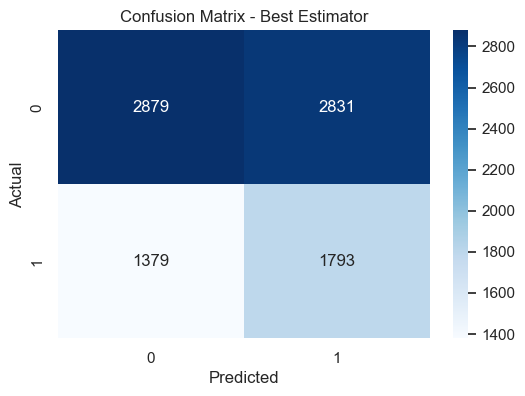

In [116]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='f1', cv=kf)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Model Evaluation on Test Set using the best estimator
y_pred_best = best_rf_classifier.predict(X_test)
print('\nClassification Report on Test Set using Best Estimator:\n', classification_report(y_test, y_pred_best))

# Confusion Matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Estimator')
plt.show()


<p><strong> Lastly, we built a Random Forest Model, we tried to find the best parameters for the model using a grid search function that would try every possible combination of parameters in addition to using a k-fold cross validation method. We chose 5 folds for this case as an arbitrary number. Overall, we see that the results of the model were not great, this could be due to several factors: </strong>

- <p> <strong> Firstly, the size of the dataset was very small due to the down sampling and this was not enough to train the model satisfactorily </strong>
- <p> <strong> Secondly, using a Standard Scaler function was not a good idea, using a MinMax Scaler function would've kept the scaling between data points the same and would've squished all points between 0 and 1. I think this woudl've helped training better </strong>
- <p> <strong> Lastly, assuming a linear relationship while interpolating we think would've been  a smarter decision, a quadratic relationship might've been too complex, and so interpolating didn't lead to accurate enough values while upsampling which didn't help the model.  </strong>